In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[], [0.12540000677108765, 0.15790000557899475, 0.15199999511241913, 0.1680999994277954, 0.15389999747276306, 0.10000000149011612, 0.12790000438690186, 0.10000000149011612, 0.1298999935388565, 0.16140000522136688, 0.19370000064373016, 0.10000000149011612, 0.10010000318288803, 0.09989999979734421, 0.10530000180006027, 0.1842000037431717, 0.13920000195503235, 0.12710000574588776, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11550000309944153, 0.10000000149011612, 0.10000000149011612, 0.14059999585151672, 0.09269999712705612, 0.21170000731945038, 0.13019999861717224, 0.17980000376701355], [0.17949999868869781, 0.22709999978542328, 0.19769999384880066, 0.1088000014424324, 0.13819999992847443, 0.181099995970726, 0.15760000050067902, 0.17479999363422394, 0.10000000149011612, 0.13539999723434448, 0.14169999957084656, 0.17790000140666962, 0.164000004529953, 0.12809999287128448, 0.1738000065088272, 0.14190000295639038, 0.10000000149011612, 0.13500000536441803, 0.2563000023365021, 0.12349999696016312, 0.1550000011920929, 0.14110000431537628, 0.20600000023841858, 0.22110000252723694, 0.10000000149011612, 0.10419999808073044, 0.20909999310970306, 0.20059999823570251, 0.1039000004529953, 0.12039999663829803], [0.1347000002861023, 0.17599999904632568, 0.2572999894618988, 0.17730000615119934, 0.15369999408721924, 0.20280000567436218, 0.13650000095367432, 0.17749999463558197, 0.18060000240802765, 0.2240999937057495, 0.1363999992609024, 0.15219999849796295, 0.1907999962568283, 0.19040000438690186, 0.10000000149011612, 0.21040000021457672, 0.10000000149011612, 0.1565999984741211, 0.17489999532699585, 0.12039999663829803, 0.11860000342130661, 0.13809999823570251, 0.10100000351667404, 0.225600004196167, 0.11150000244379044, 0.1995999962091446, 0.10840000212192535, 0.14790000021457672, 0.15880000591278076, 0.1031000018119812], [0.17800000309944153, 0.2272000014781952, 0.14110000431537628, 0.20010000467300415, 0.10239999741315842, 0.22789999842643738, 0.2442999929189682, 0.20600000023841858, 0.10000000149011612, 0.16850000619888306, 0.10000000149011612, 0.11299999803304672, 0.22930000722408295, 0.2151000052690506, 0.22310000658035278, 0.2167000025510788, 0.16179999709129333, 0.20110000669956207, 0.18170000612735748, 0.19259999692440033, 0.10000000149011612, 0.13819999992847443, 0.26809999346733093, 0.26409998536109924, 0.22259999811649323, 0.23690000176429749, 0.19979999959468842, 0.16050000488758087, 0.20749999582767487, 0.2134999930858612], [0.22419999539852142, 0.2930999994277954, 0.19699999690055847, 0.25690001249313354, 0.10000000149011612, 0.21439999341964722, 0.13130000233650208, 0.16660000383853912, 0.2619999945163727, 0.18389999866485596, 0.23899999260902405, 0.15950000286102295, 0.13339999318122864, 0.22599999606609344, 0.12530000507831573, 0.14509999752044678, 0.25949999690055847, 0.21220000088214874, 0.2190999984741211, 0.24650000035762787, 0.22259999811649323, 0.1988999992609024, 0.10000000149011612, 0.2467000037431717, 0.19269999861717224, 0.2750999927520752, 0.26159998774528503, 0.28110000491142273, 0.2515000104904175, 0.20550000667572021], [0.250900000333786, 0.10000000149011612, 0.15389999747276306, 0.10000000149011612, 0.22849999368190765, 0.29660001397132874, 0.24860000610351562, 0.2669999897480011, 0.23489999771118164, 0.19619999825954437, 0.2590000033378601, 0.13860000669956207, 0.2012999951839447, 0.22990000247955322, 0.24629999697208405, 0.10000000149011612, 0.2409999966621399, 0.26649999618530273, 0.24549999833106995, 0.10000000149011612, 0.26339998841285706, 0.22139999270439148, 0.2526000142097473, 0.2117999941110611, 0.23119999468326569, 0.28290000557899475, 0.27160000801086426, 0.10000000149011612, 0.19030000269412994, 0.2013999968767166], [0.15559999644756317, 0.23800000548362732, 0.2806999981403351, 0.10000000149011612, 0.17100000381469727, 0.10000000149011612, 0.10000000149011612, 0.2425999939441681, 0.2061000019311905, 0.24210000038146973, 0.18369999527931213, 0.2084999978542328, 0.23929999768733978, 0.2572999894618988, 0.22689999639987946, 0.28529998660087585, 0.2378000020980835, 0.24320000410079956, 0.25929999351501465, 0.20819999277591705, 0.21400000154972076, 0.19460000097751617, 0.2556000053882599, 0.2526000142097473, 0.22370000183582306, 0.2442999929189682, 0.26579999923706055, 0.21629999577999115, 0.2648000121116638, 0.2303999960422516], [0.17970000207424164, 0.24169999361038208, 0.21619999408721924, 0.2013999968767166, 0.25940001010894775, 0.31279999017715454, 0.27480000257492065, 0.12970000505447388, 0.2888000011444092, 0.21230000257492065, 0.27730000019073486, 0.10000000149011612, 0.24869999289512634, 0.24320000410079956, 0.2687000036239624, 0.2971000075340271, 0.27730000019073486, 0.28450000286102295, 0.26260000467300415, 0.10000000149011612, 0.26649999618530273, 0.19830000400543213, 0.27309998869895935, 0.2694999873638153, 0.18469999730587006, 0.2549999952316284, 0.26429998874664307, 0.24729999899864197, 0.2736999988555908, 0.2483000010251999], [0.25769999623298645, 0.301800012588501, 0.10000000149011612, 0.2443999946117401, 0.2768999934196472, 0.31279999017715454, 0.321399986743927, 0.2249000072479248, 0.26750001311302185, 0.24220000207424164, 0.25440001487731934, 0.29179999232292175, 0.24060000479221344, 0.22470000386238098, 0.10000000149011612, 0.3142000138759613, 0.31520000100135803, 0.24410000443458557, 0.30970001220703125, 0.21279999613761902, 0.26589998602867126, 0.10000000149011612, 0.24799999594688416, 0.24799999594688416, 0.19249999523162842, 0.2160000056028366, 0.25519999861717224, 0.25, 0.2637999951839447, 0.2612000107765198], [0.2921000123023987, 0.10000000149011612, 0.31150001287460327, 0.28790000081062317, 0.24570000171661377, 0.226500004529953, 0.10000000149011612, 0.23569999635219574, 0.29670000076293945, 0.2606000006198883, 0.2851000130176544, 0.30329999327659607, 0.26179999113082886, 0.27720001339912415, 0.22470000386238098, 0.2816999852657318, 0.10000000149011612, 0.31529998779296875, 0.27140000462532043, 0.24719999730587006, 0.24500000476837158, 0.30809998512268066, 0.29100000858306885, 0.24570000171661377, 0.22769999504089355, 0.2574000060558319, 0.2962999939918518, 0.2685999870300293, 0.26669999957084656, 0.2062000036239624], [0.2517000138759613, 0.3093000054359436, 0.26969999074935913, 0.2621000111103058, 0.3174000084400177, 0.2337999939918518, 0.25769999623298645, 0.2881999909877777, 0.2312999963760376, 0.27970001101493835, 0.21379999816417694, 0.2029999941587448, 0.2924000024795532, 0.27219998836517334, 0.25859999656677246, 0.24310000240802765, 0.33640000224113464, 0.29989999532699585, 0.23330000042915344, 0.10000000149011612, 0.3068000078201294, 0.26820001006126404, 0.28949999809265137, 0.23739999532699585, 0.2903999984264374, 0.2849000096321106, 0.25699999928474426, 0.26179999113082886, 0.2224999964237213, 0.28839999437332153], [0.26899999380111694, 0.2257000058889389, 0.2484000027179718, 0.15620000660419464, 0.29649999737739563, 0.28940001130104065, 0.305400013923645, 0.3059000074863434, 0.29269999265670776, 0.2946999967098236, 0.10000000149011612, 0.26429998874664307, 0.10000000149011612, 0.287200003862381, 0.30649998784065247, 0.10000000149011612, 0.29339998960494995, 0.3260999917984009, 0.27880001068115234, 0.27459999918937683, 0.2985000014305115, 0.27410000562667847, 0.30309998989105225, 0.23100000619888306, 0.3424000144004822, 0.2020999938249588, 0.21160000562667847, 0.26649999618530273, 0.2913999855518341, 0.2696000039577484], [0.10000000149011612, 0.10000000149011612, 0.275299996137619, 0.30059999227523804, 0.2669999897480011, 0.2992999851703644, 0.3066999912261963, 0.2955000102519989, 0.24469999969005585, 0.28760001063346863, 0.10000000149011612, 0.24330000579357147, 0.28690001368522644, 0.28360000252723694, 0.2732999920845032, 0.3149000108242035, 0.28220000863075256, 0.29580000042915344, 0.27219998836517334, 0.23229999840259552, 0.3174999952316284, 0.31310001015663147, 0.30320000648498535, 0.27950000762939453, 0.2696000039577484, 0.24459999799728394, 0.28450000286102295, 0.18940000236034393, 0.28110000491142273, 0.2824999988079071], [0.31139999628067017, 0.26339998841285706, 0.3167000114917755, 0.3125999867916107, 0.2939000129699707, 0.24560000002384186, 0.10000000149011612, 0.34610000252723694, 0.24660000205039978, 0.27070000767707825, 0.3310999870300293, 0.2533000111579895, 0.2678999900817871, 0.2953000068664551, 0.32260000705718994, 0.3199000060558319, 0.29249998927116394, 0.314300000667572, 0.30320000648498535, 0.31520000100135803, 0.27309998869895935, 0.28690001368522644, 0.2879999876022339, 0.25040000677108765, 0.24230000376701355, 0.2985000014305115, 0.24449999630451202, 0.3034000098705292, 0.24210000038146973, 0.3077999949455261], [0.3192000091075897, 0.32249999046325684, 0.3131999969482422, 0.3138999938964844, 0.266400009393692, 0.29649999737739563, 0.2865000069141388, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2969000041484833, 0.10000000149011612, 0.30660000443458557, 0.21629999577999115, 0.10000000149011612, 0.2883000075817108, 0.2906000018119812, 0.26759999990463257, 0.3458000123500824, 0.23499999940395355, 0.2872999906539917, 0.28850001096725464, 0.2628999948501587, 0.27880001068115234, 0.31520000100135803, 0.2614000141620636, 0.30489999055862427, 0.25619998574256897, 0.26930001378059387, 0.25589999556541443], [0.31610000133514404, 0.3319999873638153, 0.27320000529289246, 0.29260000586509705, 0.30059999227523804, 0.10000000149011612, 0.2476000040769577, 0.2206999957561493, 0.2863999903202057, 0.2856000065803528, 0.31189998984336853, 0.10000000149011612, 0.26350000500679016, 0.34929999709129333, 0.32350000739097595, 0.2978000044822693, 0.32510000467300415, 0.2872999906539917, 0.24050000309944153, 0.27000001072883606, 0.3061999976634979, 0.31630000472068787, 0.10000000149011612, 0.34450000524520874, 0.2897000014781952, 0.32109999656677246, 0.320499986410141, 0.28929999470710754, 0.3303999900817871, 0.29440000653266907], [0.27549999952316284, 0.3199000060558319, 0.3203999996185303, 0.26750001311302185, 0.10000000149011612, 0.10000000149011612, 0.30660000443458557, 0.3237000107765198, 0.3102000057697296, 0.10000000149011612, 0.3149000108242035, 0.29679998755455017, 0.10000000149011612, 0.1891999989748001, 0.27790001034736633, 0.29919999837875366, 0.3160000145435333, 0.2849000096321106, 0.359499990940094, 0.2667999863624573, 0.31369999051094055, 0.2596000134944916, 0.10000000149011612, 0.3018999993801117, 0.32179999351501465, 0.3553999960422516, 0.3012999892234802, 0.26030001044273376, 0.33160001039505005, 0.10000000149011612], [0.30090001225471497, 0.32910001277923584, 0.28529998660087585, 0.2029999941587448, 0.29580000042915344, 0.28690001368522644, 0.28299999237060547, 0.10000000149011612, 0.33869999647140503, 0.2793000042438507, 0.3375000059604645, 0.2775000035762787, 0.26260000467300415, 0.32910001277923584, 0.26190000772476196, 0.2678000032901764, 0.27810001373291016, 0.2962000072002411, 0.10000000149011612, 0.2224999964237213, 0.10000000149011612, 0.29789999127388, 0.3059000074863434, 0.25189998745918274, 0.24809999763965607, 0.2712000012397766, 0.24500000476837158, 0.2703000009059906, 0.24199999868869781, 0.2248000055551529], [0.3199999928474426, 0.3093000054359436, 0.2856000065803528, 0.2004999965429306, 0.31310001015663147, 0.34040001034736633, 0.3206999897956848, 0.3400999903678894, 0.21819999814033508, 0.10000000149011612, 0.29899999499320984, 0.29339998960494995, 0.3197000026702881, 0.28859999775886536, 0.2646999955177307, 0.22579999268054962, 0.3269999921321869, 0.31220000982284546, 0.3034000098705292, 0.33000001311302185, 0.3531999886035919, 0.323199987411499, 0.2987000048160553, 0.10000000149011612, 0.3192000091075897, 0.30959999561309814, 0.2671000063419342, 0.3228999972343445, 0.32679998874664307, 0.3140999972820282], [0.335099995136261, 0.2621000111103058, 0.32109999656677246, 0.10000000149011612, 0.3400999903678894, 0.2825999855995178, 0.32690000534057617, 0.3407000005245209, 0.3271999955177307, 0.24560000002384186, 0.3301999866962433, 0.2425999939441681, 0.3158000111579895, 0.3133000135421753, 0.3068999946117401, 0.30300000309944153, 0.32510000467300415, 0.3125, 0.3384000062942505, 0.3010999858379364, 0.35740000009536743, 0.3483000099658966, 0.31139999628067017, 0.3537999987602234, 0.3089999854564667, 0.296099990606308, 0.3490999937057495, 0.3693999946117401, 0.10000000149011612, 0.2190999984741211], [0.2500999867916107, 0.267300009727478, 0.2971000075340271, 0.26429998874664307, 0.3176000118255615, 0.2533999979496002, 0.2637999951839447, 0.3077000081539154, 0.31130000948905945, 0.3224000036716461, 0.33739998936653137, 0.2727999985218048, 0.33500000834465027, 0.3034999966621399, 0.36629998683929443, 0.27950000762939453, 0.2736000120639801, 0.10000000149011612, 0.3375000059604645, 0.3522999882698059, 0.2273000031709671, 0.3010999858379364, 0.29269999265670776, 0.3206999897956848, 0.30320000648498535, 0.27459999918937683, 0.30219998955726624, 0.10000000149011612, 0.3249000012874603, 0.3077999949455261], [0.24959999322891235, 0.29030001163482666, 0.2800999879837036, 0.319599986076355, 0.26579999923706055, 0.30809998512268066, 0.33799999952316284, 0.28929999470710754, 0.36059999465942383, 0.27730000019073486, 0.2865000069141388, 0.10000000149011612, 0.28949999809265137, 0.24199999868869781, 0.35420000553131104, 0.3222000002861023, 0.30329999327659607, 0.3391000032424927, 0.32440000772476196, 0.3407999873161316, 0.23190000653266907, 0.10000000149011612, 0.2962999939918518, 0.35089999437332153, 0.3463999927043915, 0.26739999651908875, 0.30799999833106995, 0.33709999918937683, 0.36640000343322754, 0.34139999747276306], [0.2615000009536743, 0.29280000925064087, 0.3215999901294708, 0.2912999987602234, 0.10000000149011612, 0.10000000149011612, 0.3303000032901764, 0.33180001378059387, 0.3352999985218048, 0.30660000443458557, 0.30880001187324524, 0.31360000371932983, 0.2879999876022339, 0.296999990940094, 0.28299999237060547, 0.3379000127315521, 0.31290000677108765, 0.29319998621940613, 0.3271999955177307, 0.31209999322891235, 0.2985000014305115, 0.2922999858856201, 0.27000001072883606, 0.10000000149011612, 0.2727999985218048, 0.3303000032901764, 0.2498999983072281, 0.32190001010894775, 0.10000000149011612, 0.3319000005722046], [0.24310000240802765, 0.26820001006126404, 0.2554999887943268, 0.314300000667572, 0.3416000008583069, 0.2603999972343445, 0.31619998812675476, 0.32589998841285706, 0.3343999981880188, 0.34700000286102295, 0.3084999918937683, 0.3424000144004822, 0.10000000149011612, 0.10000000149011612, 0.3239000141620636, 0.32850000262260437, 0.29840001463890076, 0.32170000672340393, 0.2736999988555908, 0.303600013256073, 0.3375999927520752, 0.3034000098705292, 0.2994999885559082, 0.10000000149011612, 0.33959999680519104, 0.35359999537467957, 0.29490000009536743, 0.3479999899864197, 0.34700000286102295, 0.23309999704360962], [0.2865999937057495, 0.2321999967098236, 0.31040000915527344, 0.2759999930858612, 0.10000000149011612, 0.27970001101493835, 0.10000000149011612, 0.34150001406669617, 0.3675000071525574, 0.34619998931884766, 0.10000000149011612, 0.10000000149011612, 0.3312999904155731, 0.3671000003814697, 0.3228999972343445, 0.35600000619888306, 0.32519999146461487, 0.3190999925136566, 0.10000000149011612, 0.319599986076355, 0.3637000024318695, 0.32120001316070557, 0.3346000015735626, 0.3393999934196472, 0.2791000008583069, 0.32359999418258667, 0.34060001373291016, 0.3165000081062317, 0.31790000200271606, 0.3587000072002411], [0.10000000149011612, 0.30709999799728394, 0.29179999232292175, 0.2840000092983246, 0.3021000027656555, 0.2782000005245209, 0.2888000011444092, 0.3314000070095062, 0.10000000149011612, 0.3125999867916107, 0.20640000700950623, 0.3310000002384186, 0.29339998960494995, 0.2809000015258789, 0.31529998779296875, 0.27869999408721924, 0.25839999318122864, 0.29350000619888306, 0.3271999955177307, 0.25040000677108765, 0.30809998512268066, 0.28290000557899475, 0.302700012922287, 0.10000000149011612, 0.3305000066757202, 0.33250001072883606, 0.3165999948978424, 0.3249000012874603, 0.32580000162124634, 0.2599000036716461], [0.28790000081062317, 0.10000000149011612, 0.2597000002861023, 0.2770000100135803, 0.3222000002861023, 0.2614000141620636, 0.374099999666214, 0.3328999876976013, 0.24199999868869781, 0.10000000149011612, 0.29159998893737793, 0.31189998984336853, 0.3400000035762787, 0.28940001130104065, 0.2906999886035919, 0.10000000149011612, 0.2694999873638153, 0.29109999537467957, 0.2198999971151352, 0.34150001406669617, 0.27459999918937683, 0.3206999897956848, 0.3246999979019165, 0.28040000796318054, 0.3479999899864197, 0.33640000224113464, 0.28529998660087585, 0.28870001435279846, 0.3009999990463257, 0.3626999855041504], [0.2881999909877777, 0.29589998722076416, 0.30970001220703125, 0.31279999017715454, 0.3149000108242035, 0.2842000126838684, 0.36250001192092896, 0.3522000014781952, 0.30219998955726624, 0.21220000088214874, 0.36169999837875366, 0.10000000149011612, 0.28769999742507935, 0.30469998717308044, 0.29989999532699585, 0.3140000104904175, 0.10000000149011612, 0.31279999017715454, 0.2816999852657318, 0.33660000562667847, 0.33739998936653137, 0.3560999929904938, 0.2635999917984009, 0.3644999861717224, 0.10000000149011612, 0.32580000162124634, 0.3353999853134155, 0.3352000117301941, 0.33480000495910645, 0.35409998893737793], [0.24140000343322754, 0.30160000920295715, 0.3221000134944916, 0.3411000072956085, 0.33970001339912415, 0.3192000091075897, 0.31540000438690186, 0.3253999948501587, 0.3172000050544739, 0.2639999985694885, 0.29350000619888306, 0.3107999861240387, 0.10000000149011612, 0.10000000149011612, 0.352400004863739, 0.30709999799728394, 0.3400999903678894, 0.3723999857902527, 0.27079999446868896, 0.31459999084472656, 0.3398999869823456, 0.10000000149011612, 0.3255999982357025, 0.2944999933242798, 0.31060001254081726, 0.31690001487731934, 0.32580000162124634, 0.10000000149011612, 0.2842999994754791, 0.3653999865055084], [0.10000000149011612, 0.3758000135421753, 0.3483000099658966, 0.2809000015258789, 0.3068999946117401, 0.34220001101493835, 0.2930000126361847, 0.10000000149011612, 0.32359999418258667, 0.33649998903274536, 0.3490999937057495, 0.32030001282691956, 0.30320000648498535, 0.31940001249313354, 0.39070001244544983, 0.10000000149011612, 0.30660000443458557, 0.30230000615119934, 0.362199991941452, 0.2870999872684479, 0.29409998655319214, 0.32280001044273376, 0.2874999940395355, 0.33480000495910645, 0.10000000149011612, 0.3025999963283539, 0.3244999945163727, 0.10000000149011612, 0.26179999113082886, 0.36320000886917114]]
loss0 = [[], [2.4408936500549316, 2.416212797164917, 2.3454694747924805, 2.3213589191436768, 2.228849172592163, 510.94775390625, 2.6081440448760986, 2.980544090270996, 2.393078088760376, 2.6146702766418457, 2.3846840858459473, 2.9346044063568115, 2.4733078479766846, 2.6454100608825684, 2.4364912509918213, 2.277068853378296, 2.553475856781006, 2.4032492637634277, 582.663818359375, 2.4045956134796143, 3.006676435470581, 263.45184326171875, 2.388570785522461, 264.1015319824219, 414.7879943847656, 2.4663307666778564, 2.3821933269500732, 2.3945913314819336, 2.363095760345459, 2.4187235832214355], [2.346339702606201, 2.2394728660583496, 2.463881731033325, 2.449796199798584, 2.448390245437622, 2.4379332065582275, 2.6305227279663086, 2.266456365585327, 148.304443359375, 3.1261518001556396, 2.4804346561431885, 2.2457714080810547, 2.203310489654541, 2.2779643535614014, 2.2862017154693604, 2.4238390922546387, 376.7351989746094, 2.3553659915924072, 2.1722164154052734, 2.4016165733337402, 2.374067544937134, 2.3852875232696533, 2.208329677581787, 2.1881790161132812, 8.979310989379883, 3.0178885459899902, 2.192992687225342, 2.302046298980713, 2.9404280185699463, 2.4090960025787354], [3.291036605834961, 2.3133809566497803, 2.16572904586792, 2.552626132965088, 2.516139268875122, 2.289889335632324, 2.5449893474578857, 2.2882351875305176, 2.5353548526763916, 2.474698781967163, 2.8084394931793213, 2.228947162628174, 2.5421767234802246, 2.4505608081817627, 29.047321319580078, 2.173738956451416, 117.4779281616211, 2.429503917694092, 2.788060426712036, 2.8175222873687744, 2.3978710174560547, 2.6292994022369385, 2.513786792755127, 2.579026937484741, 2.3562839031219482, 2.6181747913360596, 2.5722389221191406, 2.5799198150634766, 2.5277273654937744, 2.3677756786346436], [2.7741963863372803, 2.3263676166534424, 2.408648729324341, 2.928095817565918, 2.692835807800293, 2.528167724609375, 2.4810333251953125, 2.606546640396118, 24.60995101928711, 2.754371166229248, 187.73178100585938, 2.5058164596557617, 2.181400775909424, 2.4287867546081543, 2.5325424671173096, 2.197784423828125, 2.243483304977417, 2.432961940765381, 2.461740016937256, 2.3241841793060303, 123.53751373291016, 3.1281204223632812, 2.0989341735839844, 2.3939852714538574, 2.1229937076568604, 2.1943576335906982, 2.5475618839263916, 2.3330934047698975, 2.25419020652771, 2.6475744247436523], [2.644019365310669, 2.324352502822876, 2.4902846813201904, 2.3949356079101562, 32.18594741821289, 2.3967363834381104, 2.6262059211730957, 2.404710054397583, 2.253591299057007, 2.420703649520874, 2.187854290008545, 2.815319061279297, 3.098661422729492, 2.330777645111084, 4.225283622741699, 3.1191248893737793, 2.304226875305176, 2.3879876136779785, 2.862027168273926, 2.161496162414551, 2.391228675842285, 2.2614686489105225, 22.21352195739746, 2.1882331371307373, 2.3809969425201416, 2.066648244857788, 2.5856056213378906, 2.3030309677124023, 2.165313482284546, 2.5228984355926514], [2.4904074668884277, 597.1765747070312, 2.7969019412994385, 614.9644165039062, 3.271179437637329, 2.170525074005127, 2.633380889892578, 2.246835470199585, 2.615163564682007, 2.23730731010437, 2.157503604888916, 4.1707892417907715, 2.5059332847595215, 2.245811700820923, 2.716073513031006, 356.4929504394531, 2.280961275100708, 2.233377695083618, 2.409356117248535, 187.12933349609375, 2.1904983520507812, 2.345264196395874, 2.2925503253936768, 2.9324498176574707, 2.255336284637451, 1.9815964698791504, 2.343148946762085, 866.9642944335938, 2.934652328491211, 2.4055020809173584], [3.4808733463287354, 2.701397657394409, 2.7575998306274414, 60.49634552001953, 2.5338010787963867, 132.60069274902344, 355.2673034667969, 2.6923463344573975, 3.5470592975616455, 2.6566824913024902, 2.3712337017059326, 2.8534317016601562, 2.7104969024658203, 2.1937687397003174, 2.4205844402313232, 2.422370672225952, 2.7061514854431152, 2.518280267715454, 2.4188196659088135, 2.330609083175659, 2.9413695335388184, 2.753972291946411, 2.2518045902252197, 2.3871984481811523, 2.596818447113037, 2.46704363822937, 2.207948923110962, 2.6329855918884277, 2.647854804992676, 2.561568260192871], [2.5748672485351562, 2.541774034500122, 2.326054096221924, 2.7693285942077637, 2.3515191078186035, 2.50197434425354, 2.604069709777832, 7.0371928215026855, 2.4567718505859375, 2.2834696769714355, 2.251263380050659, 393.9857177734375, 2.462939739227295, 2.656381130218506, 3.220062017440796, 2.3549249172210693, 2.6491596698760986, 2.8952927589416504, 2.456974506378174, 81.68354034423828, 2.339979648590088, 2.8407833576202393, 2.0624208450317383, 2.509012222290039, 2.6619832515716553, 2.5134518146514893, 2.718552589416504, 2.841695547103882, 2.5449280738830566, 2.4105777740478516], [2.6093337535858154, 2.404080629348755, 441.0025939941406, 2.8513450622558594, 2.916971206665039, 2.1785120964050293, 2.8068037033081055, 3.6014928817749023, 2.4881069660186768, 3.1279430389404297, 2.4437694549560547, 2.7329301834106445, 2.9539594650268555, 2.934333086013794, 192.28671264648438, 2.509589433670044, 2.6509556770324707, 2.311577320098877, 2.461843252182007, 2.986945629119873, 2.437868595123291, 255.98187255859375, 3.203097343444824, 2.5173792839050293, 3.7597532272338867, 2.5462348461151123, 3.002668857574463, 3.5355687141418457, 2.204723834991455, 2.9213531017303467], [2.567415714263916, 106.47113800048828, 2.7400496006011963, 3.0740859508514404, 2.5616955757141113, 3.270951747894287, 87.40336608886719, 2.83030104637146, 3.013286828994751, 2.340414047241211, 2.3718035221099854, 2.477816343307495, 2.6884608268737793, 2.8015339374542236, 2.3868563175201416, 2.357738494873047, 166.37966918945312, 2.7658450603485107, 2.7035093307495117, 2.2590532302856445, 2.549466133117676, 2.2441792488098145, 3.6198198795318604, 2.656728982925415, 2.6266462802886963, 3.017625570297241, 2.502629280090332, 2.9254977703094482, 2.7479496002197266, 3.2369890213012695], [2.3817543983459473, 2.320895195007324, 2.5655338764190674, 2.69215989112854, 2.456388473510742, 2.9256069660186768, 3.696131944656372, 2.2739968299865723, 3.3743090629577637, 2.749130964279175, 3.4686031341552734, 3.580367088317871, 3.193164825439453, 3.4166297912597656, 3.3277173042297363, 3.065215587615967, 2.5335357189178467, 2.628066062927246, 3.152721881866455, 347.3135681152344, 2.6775665283203125, 2.8054921627044678, 2.962639570236206, 3.812929630279541, 2.693429470062256, 2.976494312286377, 2.7111849784851074, 2.820513963699341, 3.8800270557403564, 2.539210081100464], [3.229166269302368, 4.486761569976807, 4.3812432289123535, 4.853747844696045, 2.6843643188476562, 2.888603687286377, 2.9108667373657227, 2.9318978786468506, 2.3770337104797363, 3.281214952468872, 255.3330535888672, 2.6411831378936768, 107.877197265625, 3.2384254932403564, 2.458890914916992, 249.5001220703125, 2.6131181716918945, 2.7093141078948975, 2.8821616172790527, 3.1773743629455566, 2.619274377822876, 2.3958849906921387, 2.481415033340454, 2.8041133880615234, 2.5850493907928467, 3.4148828983306885, 4.344857692718506, 2.8066482543945312, 2.426326274871826, 3.059671401977539], [28.153696060180664, 250.8798065185547, 4.839219093322754, 3.106114149093628, 3.2776055335998535, 3.1788136959075928, 2.651883363723755, 2.592287302017212, 3.060652256011963, 2.7196712493896484, 208.88316345214844, 2.5603795051574707, 3.3811421394348145, 2.9644691944122314, 2.578021764755249, 2.7952027320861816, 2.8042569160461426, 2.7191061973571777, 2.585536241531372, 3.3731086254119873, 2.6957623958587646, 3.430469036102295, 3.4217827320098877, 3.288050889968872, 2.911019802093506, 3.612335205078125, 3.1605539321899414, 2.8103907108306885, 3.033848285675049, 2.897660255432129], [3.47829532623291, 3.6794722080230713, 2.4574801921844482, 3.235785961151123, 3.257579803466797, 2.878432512283325, 130.86239624023438, 2.888207197189331, 3.37750506401062, 3.1892895698547363, 2.715223789215088, 3.136751413345337, 3.3013484477996826, 2.5908188819885254, 2.6424882411956787, 3.1020519733428955, 3.3095524311065674, 2.3773133754730225, 3.2285594940185547, 2.2590527534484863, 2.531824827194214, 2.7134323120117188, 2.334723711013794, 3.8826355934143066, 2.4737300872802734, 3.2199928760528564, 2.947652578353882, 2.8602235317230225, 2.8297462463378906, 3.0788471698760986], [3.544295310974121, 2.8223817348480225, 2.8607685565948486, 3.026249408721924, 3.522951126098633, 2.7514560222625732, 3.2163660526275635, 292.2857971191406, 416.8669128417969, 100.2823257446289, 3.51369571685791, 141.2516326904297, 3.386880397796631, 4.516645908355713, 223.03591918945312, 3.3807411193847656, 4.038650035858154, 3.768710136413574, 2.867779016494751, 4.796208381652832, 2.7541604042053223, 3.0103988647460938, 2.5852575302124023, 3.150909662246704, 4.009414196014404, 2.995195150375366, 3.0749073028564453, 3.3693461418151855, 3.6515352725982666, 3.2232115268707275], [2.7249438762664795, 2.1782619953155518, 3.256500720977783, 2.7800967693328857, 2.969797372817993, 188.3029022216797, 5.436004161834717, 4.6775221824646, 3.136388063430786, 2.9047293663024902, 2.1590819358825684, 105.03018951416016, 2.8351633548736572, 3.0872433185577393, 2.8199901580810547, 3.9192097187042236, 2.615880012512207, 4.246445178985596, 3.0549967288970947, 3.742800712585449, 3.4708614349365234, 3.128873348236084, 45.68002700805664, 2.2618136405944824, 2.5744168758392334, 2.4615254402160645, 2.533254384994507, 4.145524024963379, 2.74995493888855, 3.2535183429718018], [2.9413669109344482, 3.383002281188965, 2.9293110370635986, 2.863086223602295, 97.65991973876953, 64.56290435791016, 2.69887113571167, 2.65140700340271, 2.4732136726379395, 94.73722839355469, 3.4108214378356934, 2.7221617698669434, 68.97708892822266, 5.978868007659912, 2.62611722946167, 3.1940457820892334, 2.996415615081787, 3.5125105381011963, 3.6699488162994385, 3.5634422302246094, 3.430091381072998, 3.4799249172210693, 179.0873565673828, 2.8403477668762207, 2.761047601699829, 2.233001232147217, 2.745030641555786, 3.885387897491455, 3.182817220687866, 315.4374694824219], [3.654348373413086, 3.0863418579101562, 3.408358573913574, 3.5364227294921875, 3.730231523513794, 3.4859793186187744, 3.5375797748565674, 126.81743621826172, 3.0319149494171143, 3.7700250148773193, 2.6303250789642334, 3.155867576599121, 3.5760960578918457, 3.1315886974334717, 4.579617500305176, 4.164367198944092, 3.404428243637085, 3.7801496982574463, 388.0778503417969, 5.058945655822754, 204.28497314453125, 3.0544283390045166, 3.1057639122009277, 4.150864124298096, 4.323880672454834, 3.5125184059143066, 4.422110080718994, 3.348968029022217, 3.908071517944336, 3.508631944656372], [3.3195652961730957, 2.8239023685455322, 2.4270453453063965, 4.41966438293457, 2.4689366817474365, 2.665753126144409, 3.003000497817993, 2.3642520904541016, 3.6632070541381836, 111.4305648803711, 2.8827688694000244, 3.2800514698028564, 2.722384452819824, 2.6277072429656982, 3.166698694229126, 3.219489574432373, 2.9761722087860107, 2.610135078430176, 3.063002109527588, 2.8247475624084473, 2.8350932598114014, 2.6710047721862793, 2.5639140605926514, 242.77389526367188, 3.101269483566284, 2.504387617111206, 2.7165796756744385, 3.426919460296631, 3.157503366470337, 2.4315550327301025], [3.443131685256958, 3.225100517272949, 2.7959985733032227, 64.81177520751953, 3.742898941040039, 3.490814447402954, 3.2305030822753906, 3.7740042209625244, 3.517313003540039, 4.212590217590332, 2.955385208129883, 6.541420936584473, 3.026581048965454, 2.86676025390625, 3.3013596534729004, 3.039140462875366, 3.390230417251587, 3.455200433731079, 3.5279579162597656, 3.2197020053863525, 2.9208450317382812, 3.0728180408477783, 2.922382116317749, 3.2644052505493164, 2.881812334060669, 3.1803784370422363, 2.383394241333008, 2.9093682765960693, 71.68811798095703, 4.610570907592773], [4.323950290679932, 4.901694297790527, 3.884506940841675, 3.451601266860962, 3.769543409347534, 3.267158031463623, 3.1447858810424805, 3.367487907409668, 3.4563581943511963, 2.767901659011841, 2.7824199199676514, 4.213031768798828, 2.768327236175537, 4.06931734085083, 3.0591259002685547, 2.605102062225342, 3.6749234199523926, 200.24688720703125, 2.9452643394470215, 3.430602788925171, 3.6119284629821777, 4.191459655761719, 2.5650839805603027, 2.824476480484009, 3.759801149368286, 3.725896120071411, 2.630225896835327, 142.028564453125, 3.9720957279205322, 3.037217140197754], [3.8050553798675537, 3.2620832920074463, 4.766077995300293, 2.7951018810272217, 3.2247374057769775, 3.5047059059143066, 4.7096147537231445, 3.957355499267578, 2.7830822467803955, 3.7738258838653564, 2.6275429725646973, 165.0458221435547, 3.633810043334961, 2.996257781982422, 2.7993199825286865, 2.9669203758239746, 2.6460399627685547, 3.289982795715332, 4.682557582855225, 2.9566826820373535, 3.5877816677093506, 138.0045928955078, 3.2635083198547363, 4.220486164093018, 2.5396389961242676, 4.298208713531494, 2.520781993865967, 2.4936366081237793, 2.495720624923706, 2.4191226959228516], [3.035658597946167, 3.380519151687622, 2.7513604164123535, 3.2341933250427246, 102.72260284423828, 75.58020782470703, 3.092458486557007, 3.3736679553985596, 2.806248188018799, 2.9796550273895264, 3.3671436309814453, 3.029425859451294, 3.6034319400787354, 2.7094149589538574, 3.553621530532837, 3.684460163116455, 3.2659473419189453, 4.0674333572387695, 3.659423351287842, 3.661513328552246, 3.337437152862549, 3.276840925216675, 4.72275972366333, 188.0146942138672, 4.145337104797363, 3.4466211795806885, 2.799457311630249, 3.8459672927856445, 92.97369384765625, 3.896507501602173], [4.441623210906982, 3.8670706748962402, 5.365306854248047, 3.0433688163757324, 2.9040627479553223, 3.623443841934204, 3.138305187225342, 3.6048483848571777, 3.339618444442749, 3.4562199115753174, 2.9546897411346436, 2.5848848819732666, 306.5081481933594, 148.80520629882812, 3.3245022296905518, 3.4840433597564697, 3.6872456073760986, 3.3422253131866455, 4.352025985717773, 3.1409876346588135, 2.8297832012176514, 3.6855714321136475, 3.342291831970215, 185.36769104003906, 3.4808828830718994, 3.2646596431732178, 3.250765562057495, 2.6496024131774902, 3.8812596797943115, 4.097769260406494], [3.024627447128296, 3.698371171951294, 2.8359732627868652, 3.3997199535369873, 213.46307373046875, 3.3067500591278076, 190.3726043701172, 3.157353401184082, 3.4320290088653564, 2.4845752716064453, 202.4171905517578, 130.72943115234375, 2.9917476177215576, 2.6262125968933105, 4.209043025970459, 3.205033302307129, 3.0605897903442383, 3.5206565856933594, 229.2562713623047, 4.25089168548584, 3.104713201522827, 3.0509800910949707, 3.7779605388641357, 2.4553451538085938, 3.6761276721954346, 3.3579957485198975, 3.124136209487915, 3.0722475051879883, 3.1212449073791504, 3.2085909843444824], [107.69210052490234, 3.0651376247406006, 4.016660213470459, 3.184741973876953, 2.047285318374634, 2.7624118328094482, 3.080331325531006, 3.096306085586548, 340.9927978515625, 3.8217296600341797, 5.883413791656494, 2.972628355026245, 2.935892343521118, 2.9843947887420654, 2.788358211517334, 3.423358917236328, 3.595439910888672, 3.518125057220459, 3.4217007160186768, 4.227852821350098, 2.9898927211761475, 3.0265703201293945, 2.5623672008514404, 72.74213409423828, 2.7748024463653564, 2.9055612087249756, 3.2453243732452393, 3.4213058948516846, 2.9236948490142822, 4.173636436462402], [3.526045799255371, 207.262451171875, 4.068406581878662, 3.927879571914673, 3.222597122192383, 4.139398097991943, 2.9391236305236816, 3.3665645122528076, 3.1160085201263428, 101.04680633544922, 4.0650763511657715, 3.171764850616455, 2.289888620376587, 3.174996852874756, 3.408966064453125, 46.94265365600586, 5.1913909912109375, 4.278295040130615, 4.443543910980225, 4.11891508102417, 3.5586934089660645, 2.896045684814453, 2.9069082736968994, 4.3299078941345215, 2.6765239238739014, 3.3980305194854736, 3.360201835632324, 3.3275206089019775, 3.248677968978882, 2.9073586463928223], [4.074998378753662, 4.578124046325684, 3.6033425331115723, 3.6132190227508545, 3.0108819007873535, 3.995710849761963, 4.141801357269287, 3.048741102218628, 4.642064571380615, 5.2776899337768555, 4.028265476226807, 312.6734619140625, 5.6459221839904785, 3.255587339401245, 4.0939483642578125, 3.188406467437744, 100.27953338623047, 4.49224853515625, 3.2772397994995117, 3.3086225986480713, 3.0985653400421143, 2.951162815093994, 4.935513019561768, 3.238297939300537, 329.00042724609375, 2.913086175918579, 2.8398022651672363, 3.717266798019409, 4.158648490905762, 3.0480151176452637], [3.8667168617248535, 2.6297662258148193, 3.542435884475708, 2.871260643005371, 3.007209539413452, 3.104743719100952, 4.328583717346191, 2.85932993888855, 3.653796911239624, 2.9497241973876953, 3.04748797416687, 3.703812837600708, 155.6012420654297, 107.96583557128906, 2.6179027557373047, 3.514396905899048, 3.8846776485443115, 2.8939716815948486, 4.012237071990967, 3.8060452938079834, 3.22048282623291, 288.81781005859375, 3.6123430728912354, 4.180024147033691, 3.9330339431762695, 3.314971446990967, 2.7696073055267334, 111.64718627929688, 4.017040729522705, 2.628443479537964], [91.60244750976562, 2.8018133640289307, 2.9714112281799316, 3.9250028133392334, 3.8280422687530518, 3.4446988105773926, 3.2099907398223877, 224.53355407714844, 2.9438493251800537, 3.461308479309082, 3.362016439437866, 3.5741846561431885, 2.966932535171509, 3.1561167240142822, 2.7477669715881348, 108.74908447265625, 5.016368389129639, 4.500444412231445, 3.102886915206909, 2.9359495639801025, 4.102099418640137, 3.2375216484069824, 4.392663478851318, 3.7602577209472656, 73.93302154541016, 3.3451762199401855, 4.491300582885742, 106.02137756347656, 4.069948673248291, 2.954761505126953]] 

acc1 = [[], [0.1453000009059906, 0.10000000149011612, 0.14589999616146088, 0.10830000042915344, 0.11249999701976776, 0.18119999766349792, 0.10000000149011612, 0.10000000149011612, 0.12290000170469284, 0.120899997651577, 0.10830000042915344, 0.14000000059604645, 0.10930000245571136, 0.10000000149011612, 0.17430000007152557, 0.13650000095367432, 0.17299999296665192, 0.1673000007867813, 0.13009999692440033, 0.10040000081062317, 0.10930000245571136, 0.13680000603199005, 0.10000000149011612, 0.1607999950647354, 0.14890000224113464, 0.10140000283718109, 0.17640000581741333, 0.13249999284744263, 0.16619999706745148, 0.10000000149011612], [0.12460000067949295, 0.19760000705718994, 0.14249999821186066, 0.11050000041723251, 0.1234000027179718, 0.1607999950647354, 0.1193000003695488, 0.10670000314712524, 0.10140000283718109, 0.10000000149011612, 0.1907999962568283, 0.18150000274181366, 0.1459999978542328, 0.14509999752044678, 0.18330000340938568, 0.1876000016927719, 0.10000000149011612, 0.18979999423027039, 0.1882999986410141, 0.18709999322891235, 0.17229999601840973, 0.1316000074148178, 0.1509999930858612, 0.11569999903440475, 0.13680000603199005, 0.1890999972820282, 0.12710000574588776, 0.0949999988079071, 0.13819999992847443, 0.19329999387264252], [0.13179999589920044, 0.18310000002384186, 0.20469999313354492, 0.21240000426769257, 0.1826999932527542, 0.1565999984741211, 0.1851000040769577, 0.2207999974489212, 0.12970000505447388, 0.12720000743865967, 0.18629999458789825, 0.13619999587535858, 0.1965000033378601, 0.19329999387264252, 0.17839999496936798, 0.13420000672340393, 0.20829999446868896, 0.12380000203847885, 0.22280000150203705, 0.2029999941587448, 0.13850000500679016, 0.20440000295639038, 0.2045000046491623, 0.15150000154972076, 0.15080000460147858, 0.12080000340938568, 0.14470000565052032, 0.14319999516010284, 0.1770000010728836, 0.13439999520778656], [0.14429999887943268, 0.21289999783039093, 0.16840000450611115, 0.22689999639987946, 0.22540000081062317, 0.17229999601840973, 0.10909999907016754, 0.21199999749660492, 0.10000000149011612, 0.20029999315738678, 0.10000000149011612, 0.16179999709129333, 0.20679999887943268, 0.24079999327659607, 0.16539999842643738, 0.10000000149011612, 0.12020000070333481, 0.16850000619888306, 0.11500000208616257, 0.2556000053882599, 0.2134000062942505, 0.20329999923706055, 0.15620000660419464, 0.2004999965429306, 0.23360000550746918, 0.10170000046491623, 0.17329999804496765, 0.23190000653266907, 0.1412000060081482, 0.181099995970726], [0.1623000055551529, 0.19859999418258667, 0.10000000149011612, 0.19110000133514404, 0.12250000238418579, 0.22020000219345093, 0.1137000024318695, 0.25839999318122864, 0.1817999929189682, 0.10000000149011612, 0.20190000534057617, 0.19850000739097595, 0.27639999985694885, 0.19470000267028809, 0.19269999861717224, 0.18060000240802765, 0.14730000495910645, 0.20270000398159027, 0.23229999840259552, 0.17800000309944153, 0.20090000331401825, 0.21690000593662262, 0.20200000703334808, 0.2599000036716461, 0.22089999914169312, 0.17329999804496765, 0.2759999930858612, 0.10000000149011612, 0.10000000149011612, 0.164900004863739], [0.2621000111103058, 0.20819999277591705, 0.20499999821186066, 0.28299999237060547, 0.14910000562667847, 0.21060000360012054, 0.20100000500679016, 0.24560000002384186, 0.18029999732971191, 0.22220000624656677, 0.1987999975681305, 0.226500004529953, 0.20919999480247498, 0.10000000149011612, 0.18930000066757202, 0.24969999492168427, 0.26739999651908875, 0.23970000445842743, 0.20180000364780426, 0.1882999986410141, 0.21060000360012054, 0.20659999549388885, 0.2443999946117401, 0.19760000705718994, 0.1964000016450882, 0.22290000319480896, 0.10000000149011612, 0.23229999840259552, 0.16740000247955322, 0.24580000340938568], [0.24570000171661377, 0.2754000127315521, 0.2639999985694885, 0.2727000117301941, 0.16369999945163727, 0.1843000054359436, 0.10000000149011612, 0.2386000007390976, 0.2485000044107437, 0.10000000149011612, 0.27730000019073486, 0.2768000066280365, 0.226500004529953, 0.2094999998807907, 0.26899999380111694, 0.20550000667572021, 0.23589999973773956, 0.1550000011920929, 0.2994000017642975, 0.2678000032901764, 0.23819999396800995, 0.2750000059604645, 0.25870001316070557, 0.2727999985218048, 0.24320000410079956, 0.21809999644756317, 0.28859999775886536, 0.2784999907016754, 0.2667999863624573, 0.2321999967098236], [0.20200000703334808, 0.10000000149011612, 0.24580000340938568, 0.20069999992847443, 0.23839999735355377, 0.2223999947309494, 0.20229999721050262, 0.25699999928474426, 0.24940000474452972, 0.2353000044822693, 0.10000000149011612, 0.2393999993801117, 0.18469999730587006, 0.26409998536109924, 0.10000000149011612, 0.28209999203681946, 0.10000000149011612, 0.251800000667572, 0.27309998869895935, 0.24609999358654022, 0.23479999601840973, 0.21860000491142273, 0.20399999618530273, 0.2371000051498413, 0.21809999644756317, 0.26510000228881836, 0.2378000020980835, 0.23229999840259552, 0.267300009727478, 0.219200000166893], [0.2630000114440918, 0.218299999833107, 0.28029999136924744, 0.10000000149011612, 0.1834000051021576, 0.16599999368190765, 0.21819999814033508, 0.10000000149011612, 0.2655999958515167, 0.15610000491142273, 0.2694000005722046, 0.10000000149011612, 0.10000000149011612, 0.22190000116825104, 0.10000000149011612, 0.13619999587535858, 0.24950000643730164, 0.23330000042915344, 0.2451999932527542, 0.22339999675750732, 0.29679998755455017, 0.25200000405311584, 0.2870999872684479, 0.2563999891281128, 0.2574000060558319, 0.26089999079704285, 0.2773999869823456, 0.2612999975681305, 0.2484000027179718, 0.2590999901294708], [0.2533999979496002, 0.2761000096797943, 0.19990000128746033, 0.3176000118255615, 0.2168000042438507, 0.21150000393390656, 0.23739999532699585, 0.2888000011444092, 0.26489999890327454, 0.2371000051498413, 0.26600000262260437, 0.31700000166893005, 0.10000000149011612, 0.24539999663829803, 0.2962000072002411, 0.24549999833106995, 0.10000000149011612, 0.30079999566078186, 0.2071000039577484, 0.289900004863739, 0.2298000007867813, 0.3034000098705292, 0.24619999527931213, 0.22849999368190765, 0.2345999926328659, 0.26969999074935913, 0.2833999991416931, 0.22920000553131104, 0.28790000081062317, 0.2628999948501587], [0.24549999833106995, 0.2556999921798706, 0.2867000102996826, 0.22020000219345093, 0.31940001249313354, 0.2549999952316284, 0.20640000700950623, 0.2671000063419342, 0.27649998664855957, 0.2806999981403351, 0.22509999573230743, 0.24330000579357147, 0.25859999656677246, 0.25369998812675476, 0.32409998774528503, 0.26570001244544983, 0.2754000127315521, 0.27950000762939453, 0.3061000108718872, 0.2547999918460846, 0.2985000014305115, 0.19910000264644623, 0.2418999969959259, 0.10000000149011612, 0.26330000162124634, 0.10000000149011612, 0.21699999272823334, 0.29089999198913574, 0.26579999923706055, 0.2492000013589859], [0.24770000576972961, 0.2378000020980835, 0.27619999647140503, 0.2858000099658966, 0.3172999918460846, 0.2863999903202057, 0.27559998631477356, 0.27399998903274536, 0.29319998621940613, 0.2214999943971634, 0.30720001459121704, 0.29910001158714294, 0.2840000092983246, 0.30480000376701355, 0.24719999730587006, 0.27790001034736633, 0.26930001378059387, 0.26080000400543213, 0.2198999971151352, 0.2500999867916107, 0.28130000829696655, 0.24330000579357147, 0.27480000257492065, 0.25920000672340393, 0.29490000009536743, 0.2443999946117401, 0.2386000007390976, 0.29580000042915344, 0.23999999463558197, 0.15330000221729279], [0.31459999084472656, 0.25769999623298645, 0.10000000149011612, 0.2596000134944916, 0.10000000149011612, 0.2944999933242798, 0.27160000801086426, 0.2623000144958496, 0.28459998965263367, 0.20880000293254852, 0.26269999146461487, 0.17110000550746918, 0.31520000100135803, 0.20309999585151672, 0.10000000149011612, 0.10000000149011612, 0.3165999948978424, 0.2718000113964081, 0.28940001130104065, 0.27810001373291016, 0.2793000042438507, 0.2554999887943268, 0.3131999969482422, 0.27480000257492065, 0.28949999809265137, 0.2822999954223633, 0.25189998745918274, 0.10000000149011612, 0.30079999566078186, 0.25589999556541443], [0.27230000495910645, 0.249099999666214, 0.2858999967575073, 0.28220000863075256, 0.29350000619888306, 0.2614000141620636, 0.3190999925136566, 0.2883000075817108, 0.10000000149011612, 0.26080000400543213, 0.27639999985694885, 0.2752000093460083, 0.10000000149011612, 0.28940001130104065, 0.29089999198913574, 0.25200000405311584, 0.2770000100135803, 0.23690000176429749, 0.28060001134872437, 0.2345999926328659, 0.24789999425411224, 0.26759999990463257, 0.10000000149011612, 0.10000000149011612, 0.28040000796318054, 0.3156000077724457, 0.32030001282691956, 0.27950000762939453, 0.32179999351501465, 0.2921000123023987], [0.2921999990940094, 0.24050000309944153, 0.29109999537467957, 0.3248000144958496, 0.30230000615119934, 0.3578999936580658, 0.304500013589859, 0.28040000796318054, 0.29109999537467957, 0.26089999079704285, 0.2809999883174896, 0.25060001015663147, 0.3140000104904175, 0.266400009393692, 0.3206999897956848, 0.2782999873161316, 0.31279999017715454, 0.30660000443458557, 0.2946000099182129, 0.2630000114440918, 0.24230000376701355, 0.24050000309944153, 0.2745000123977661, 0.2393999993801117, 0.28209999203681946, 0.3021000027656555, 0.2451999932527542, 0.29260000586509705, 0.3050999939441681, 0.27410000562667847], [0.25099998712539673, 0.10000000149011612, 0.30809998512268066, 0.25110000371932983, 0.328900009393692, 0.2678000032901764, 0.2379000037908554, 0.2791999876499176, 0.2786000072956085, 0.25529998540878296, 0.2793999910354614, 0.2766000032424927, 0.225600004196167, 0.27810001373291016, 0.10000000149011612, 0.10000000149011612, 0.2809000015258789, 0.2094999998807907, 0.2678000032901764, 0.10000000149011612, 0.28630000352859497, 0.2345999926328659, 0.10000000149011612, 0.31769999861717224, 0.31040000915527344, 0.31209999322891235, 0.2754000127315521, 0.2856000065803528, 0.10000000149011612, 0.2542000114917755], [0.23770000040531158, 0.2635999917984009, 0.2856999933719635, 0.32659998536109924, 0.3091999888420105, 0.23559999465942383, 0.27649998664855957, 0.3312999904155731, 0.2653000056743622, 0.3084999918937683, 0.3240000009536743, 0.2703999876976013, 0.10000000149011612, 0.28600001335144043, 0.2741999924182892, 0.2904999852180481, 0.299699991941452, 0.26350000500679016, 0.32109999656677246, 0.32010000944137573, 0.30390000343322754, 0.10019999742507935, 0.31049999594688416, 0.22750000655651093, 0.3151000142097473, 0.2962999939918518, 0.3188999891281128, 0.3334999978542328, 0.2791000008583069, 0.27309998869895935], [0.3027999997138977, 0.26179999113082886, 0.26170000433921814, 0.2890999913215637, 0.2906000018119812, 0.23729999363422394, 0.32749998569488525, 0.2865000069141388, 0.28600001335144043, 0.10000000149011612, 0.31200000643730164, 0.3138999938964844, 0.25279998779296875, 0.27459999918937683, 0.10000000149011612, 0.2793999910354614, 0.3352999985218048, 0.28859999775886536, 0.30140000581741333, 0.10000000149011612, 0.24959999322891235, 0.32829999923706055, 0.3287000060081482, 0.27390000224113464, 0.29339998960494995, 0.3075999915599823, 0.3190999925136566, 0.31700000166893005, 0.31529998779296875, 0.28279998898506165], [0.27959999442100525, 0.10000000149011612, 0.32030001282691956, 0.32170000672340393, 0.29350000619888306, 0.28360000252723694, 0.2937999963760376, 0.2955000102519989, 0.26190000772476196, 0.10000000149011612, 0.2587999999523163, 0.31369999051094055, 0.2694999873638153, 0.2759999930858612, 0.26989999413490295, 0.2930000126361847, 0.2806999981403351, 0.29440000653266907, 0.27059999108314514, 0.3456999957561493, 0.10000000149011612, 0.28619998693466187, 0.3109999895095825, 0.29580000042915344, 0.31150001287460327, 0.2648000121116638, 0.2831000089645386, 0.2768000066280365, 0.28049999475479126, 0.2676999866962433], [0.30809998512268066, 0.31130000948905945, 0.2937000095844269, 0.34380000829696655, 0.10000000149011612, 0.18150000274181366, 0.2937999963760376, 0.25459998846054077, 0.32010000944137573, 0.10000000149011612, 0.3310000002384186, 0.2793000042438507, 0.2833000123500824, 0.3578999936580658, 0.323199987411499, 0.3034999966621399, 0.3553999960422516, 0.2797999978065491, 0.26969999074935913, 0.33160001039505005, 0.29280000925064087, 0.2709999978542328, 0.2890999913215637, 0.2168000042438507, 0.2761000096797943, 0.10000000149011612, 0.3434000015258789, 0.30799999833106995, 0.30799999833106995, 0.10029999911785126], [0.28859999775886536, 0.33899998664855957, 0.29330000281333923, 0.10000000149011612, 0.3224000036716461, 0.2793999910354614, 0.27459999918937683, 0.2906000018119812, 0.27250000834465027, 0.3249000012874603, 0.3089999854564667, 0.28209999203681946, 0.3066999912261963, 0.290800005197525, 0.25029999017715454, 0.3116999864578247, 0.10000000149011612, 0.2766999900341034, 0.3215999901294708, 0.3375999927520752, 0.28630000352859497, 0.28139999508857727, 0.31360000371932983, 0.2630000114440918, 0.3012000024318695, 0.3068999946117401, 0.32409998774528503, 0.10000000149011612, 0.28790000081062317, 0.28519999980926514], [0.34610000252723694, 0.28859999775886536, 0.23579999804496765, 0.31470000743865967, 0.30730000138282776, 0.3165999948978424, 0.3122999966144562, 0.30219998955726624, 0.2937000095844269, 0.2653000056743622, 0.29679998755455017, 0.3034999966621399, 0.23350000381469727, 0.3603000044822693, 0.3199000060558319, 0.2824000120162964, 0.2766000032424927, 0.3181999921798706, 0.3025999963283539, 0.328900009393692, 0.2994999885559082, 0.3034000098705292, 0.31459999084472656, 0.32120001316070557, 0.31220000982284546, 0.2531999945640564, 0.3037000000476837, 0.10000000149011612, 0.2906000018119812, 0.2912999987602234], [0.10000000149011612, 0.2743000090122223, 0.26499998569488525, 0.30559998750686646, 0.3084000051021576, 0.33230000734329224, 0.29249998927116394, 0.3257000148296356, 0.2985999882221222, 0.3149999976158142, 0.2824999988079071, 0.31310001015663147, 0.32170000672340393, 0.290800005197525, 0.3158999979496002, 0.36329999566078186, 0.3179999887943268, 0.3149999976158142, 0.28200000524520874, 0.2639999985694885, 0.10000000149011612, 0.2337999939918518, 0.26260000467300415, 0.30640000104904175, 0.29269999265670776, 0.32330000400543213, 0.24660000205039978, 0.3167000114917755, 0.27619999647140503, 0.31850001215934753], [0.2865999937057495, 0.27790001034736633, 0.33160001039505005, 0.29789999127388, 0.33730000257492065, 0.30160000920295715, 0.35679998993873596, 0.29280000925064087, 0.3264000117778778, 0.29159998893737793, 0.3165999948978424, 0.2924000024795532, 0.27459999918937683, 0.3303999900817871, 0.23080000281333923, 0.31130000948905945, 0.33070001006126404, 0.10000000149011612, 0.3149000108242035, 0.30300000309944153, 0.30390000343322754, 0.29330000281333923, 0.21199999749660492, 0.32120001316070557, 0.36730000376701355, 0.29019999504089355, 0.3167000114917755, 0.2867000102996826, 0.33640000224113464, 0.32199999690055847], [0.326200008392334, 0.31619998812675476, 0.33570000529289246, 0.31779998540878296, 0.2953999936580658, 0.3068000078201294, 0.10000000149011612, 0.10000000149011612, 0.3000999987125397, 0.30219998955726624, 0.10000000149011612, 0.3010999858379364, 0.24490000307559967, 0.3294999897480011, 0.2962000072002411, 0.30790001153945923, 0.29739999771118164, 0.31839999556541443, 0.28119999170303345, 0.3183000087738037, 0.3125, 0.29420000314712524, 0.2973000109195709, 0.38839998841285706, 0.34139999747276306, 0.3278000056743622, 0.2937999963760376, 0.28189998865127563, 0.2856000065803528, 0.31209999322891235], [0.10000000149011612, 0.3327000141143799, 0.34209999442100525, 0.10000000149011612, 0.2533999979496002, 0.10000000149011612, 0.24549999833106995, 0.30309998989105225, 0.3140999972820282, 0.29510000348091125, 0.35600000619888306, 0.17399999499320984, 0.3025999963283539, 0.33880001306533813, 0.3084999918937683, 0.3310000002384186, 0.3474000096321106, 0.37720000743865967, 0.31690001487731934, 0.3208000063896179, 0.2736000120639801, 0.3116999864578247, 0.2971999943256378, 0.3212999999523163, 0.29649999737739563, 0.35370001196861267, 0.27079999446868896, 0.32600000500679016, 0.31949999928474426, 0.10000000149011612], [0.34389999508857727, 0.23909999430179596, 0.2808000147342682, 0.37209999561309814, 0.3111000061035156, 0.2944999933242798, 0.37709999084472656, 0.34049999713897705, 0.3222000002861023, 0.3343999981880188, 0.3353999853134155, 0.31369999051094055, 0.10000000149011612, 0.31450000405311584, 0.3264999985694885, 0.337799996137619, 0.27549999952316284, 0.30489999055862427, 0.35109999775886536, 0.10000000149011612, 0.3352000117301941, 0.32580000162124634, 0.32339999079704285, 0.3720000088214874, 0.28760001063346863, 0.32120001316070557, 0.31779998540878296, 0.31189998984336853, 0.32839998602867126, 0.2985999882221222], [0.10000000149011612, 0.36169999837875366, 0.30959999561309814, 0.3018999993801117, 0.10000000149011612, 0.3804999887943268, 0.29429998993873596, 0.3368000090122223, 0.2825999855995178, 0.3425999879837036, 0.33160001039505005, 0.3384999930858612, 0.3407000005245209, 0.3458000123500824, 0.23010000586509705, 0.36739999055862427, 0.10000000149011612, 0.3222000002861023, 0.3343999981880188, 0.2782999873161316, 0.3619000017642975, 0.249099999666214, 0.31929999589920044, 0.26809999346733093, 0.3659000098705292, 0.10000000149011612, 0.337799996137619, 0.3393999934196472, 0.3659999966621399, 0.3467000126838684], [0.3452000021934509, 0.34060001373291016, 0.3124000132083893, 0.3513999879360199, 0.3296999931335449, 0.3165000081062317, 0.29089999198913574, 0.33340001106262207, 0.31869998574256897, 0.3398999869823456, 0.3312999904155731, 0.3499999940395355, 0.25279998779296875, 0.23819999396800995, 0.26739999651908875, 0.29249998927116394, 0.2897000014781952, 0.2646999955177307, 0.25760000944137573, 0.32510000467300415, 0.3319999873638153, 0.31839999556541443, 0.28369998931884766, 0.34360000491142273, 0.33889999985694885, 0.10000000149011612, 0.27730000019073486, 0.32190001010894775, 0.310699999332428, 0.31439998745918274], [0.37119999527931213, 0.3779999911785126, 0.10000000149011612, 0.36980000138282776, 0.3853999972343445, 0.33309999108314514, 0.3325999975204468, 0.352400004863739, 0.3303999900817871, 0.32429999113082886, 0.2581999897956848, 0.27559998631477356, 0.3160000145435333, 0.374099999666214, 0.35749998688697815, 0.3172999918460846, 0.30469998717308044, 0.30570000410079956, 0.30730000138282776, 0.10000000149011612, 0.37229999899864197, 0.2996000051498413, 0.29820001125335693, 0.10000000149011612, 0.3653999865055084, 0.28839999437332153, 0.3472000062465668, 0.2529999911785126, 0.3546999990940094, 0.35920000076293945]]
loss1 = [[], [2.2833704948425293, 2.4655802249908447, 3.189018964767456, 2.834489107131958, 2.4544920921325684, 2.2547287940979004, 651.8555908203125, 870.36376953125, 2.3778669834136963, 2.7581543922424316, 3.1829915046691895, 2.3008673191070557, 2.3677608966827393, 577.3726806640625, 2.5873401165008545, 2.4346845149993896, 2.4840030670166016, 2.3313992023468018, 2.3578379154205322, 2.878544807434082, 2.415884256362915, 2.428945779800415, 908.4185180664062, 2.3220698833465576, 2.7698209285736084, 3.050110340118408, 2.480668544769287, 2.7873470783233643, 2.4042398929595947, 166.7881317138672], [2.5447113513946533, 2.310378074645996, 2.557086229324341, 2.303544759750366, 2.375396728515625, 2.3206114768981934, 2.5205488204956055, 2.56370210647583, 2.379070281982422, 425.7528076171875, 2.381913661956787, 2.239565134048462, 2.2693278789520264, 2.4665732383728027, 2.3546645641326904, 2.20739483833313, 269.2987365722656, 2.3099570274353027, 2.289289712905884, 2.2614383697509766, 2.3980486392974854, 2.5531558990478516, 2.6075472831726074, 2.5727109909057617, 2.330169916152954, 2.461106300354004, 2.4099366664886475, 2.357316017150879, 2.5084056854248047, 2.2620205879211426], [2.283895969390869, 2.5062308311462402, 2.314225196838379, 2.244093656539917, 2.5898847579956055, 2.3859803676605225, 2.4819018840789795, 2.510951280593872, 3.3129210472106934, 2.8226430416107178, 2.333535671234131, 2.988818883895874, 2.3163094520568848, 2.2900795936584473, 2.4105570316314697, 2.4576849937438965, 2.1354737281799316, 3.442661762237549, 2.4509053230285645, 2.194397449493408, 2.5534725189208984, 2.3516526222229004, 2.746795177459717, 2.6831493377685547, 2.3055014610290527, 2.356750011444092, 3.1211156845092773, 2.7235658168792725, 2.325432300567627, 2.956127643585205], [2.2935280799865723, 2.1911282539367676, 2.4852206707000732, 2.227055788040161, 2.2819511890411377, 2.3603107929229736, 2.2709102630615234, 2.7792670726776123, 35.899559020996094, 2.323155164718628, 168.5956268310547, 2.362199306488037, 2.3689188957214355, 2.3336901664733887, 2.5010080337524414, 71.22357177734375, 2.754751682281494, 2.6118123531341553, 2.3645334243774414, 2.1960277557373047, 2.2411446571350098, 2.580965757369995, 2.384455442428589, 2.4365074634552, 2.7368698120117188, 2.457826614379883, 2.1969103813171387, 2.293593168258667, 4.364284992218018, 2.296976089477539], [3.747405529022217, 3.220064163208008, 413.6713562011719, 2.410644054412842, 3.46374249458313, 2.9513988494873047, 2.7861733436584473, 2.3974602222442627, 3.3871817588806152, 266.5596618652344, 2.6223318576812744, 2.882719039916992, 2.2450363636016846, 2.324169635772705, 2.51583194732666, 2.6018118858337402, 2.5058159828186035, 2.322132110595703, 2.6951000690460205, 2.473196029663086, 2.4656193256378174, 2.3630027770996094, 2.574860095977783, 2.30706787109375, 2.3999249935150146, 2.2479422092437744, 2.247997999191284, 451.3618469238281, 223.6009063720703, 2.490278720855713], [2.1316137313842773, 3.4847617149353027, 2.6056506633758545, 2.455599308013916, 2.477653980255127, 2.6206867694854736, 2.548362970352173, 2.3988635540008545, 2.4549667835235596, 2.4420855045318604, 2.200653553009033, 2.3683531284332275, 3.1850814819335938, 424.2094421386719, 2.551865339279175, 2.384823799133301, 2.532508373260498, 2.3981807231903076, 2.5937728881835938, 3.0910391807556152, 2.6638762950897217, 2.5258944034576416, 2.386281967163086, 2.393646001815796, 2.3413894176483154, 2.321726083755493, 158.44677734375, 2.8542520999908447, 2.657703399658203, 2.735053300857544], [2.7145028114318848, 2.7623844146728516, 2.1695735454559326, 2.3134231567382812, 2.9960010051727295, 3.5592195987701416, 92.5557632446289, 2.387049913406372, 2.2320728302001953, 212.05299377441406, 2.7213492393493652, 2.5642123222351074, 2.605865001678467, 3.273505926132202, 2.4224612712860107, 2.923736333847046, 2.620370388031006, 2.552704334259033, 2.6727185249328613, 3.6457886695861816, 2.131300210952759, 2.5339980125427246, 2.7363502979278564, 2.4380664825439453, 2.184542417526245, 2.54819917678833, 3.3113906383514404, 2.2543418407440186, 3.296293020248413, 2.7744641304016113], [2.333364248275757, 473.2185363769531, 2.4805266857147217, 3.050783395767212, 2.963487386703491, 2.9251930713653564, 3.2476112842559814, 2.3336753845214844, 2.7670459747314453, 3.5421016216278076, 125.76419067382812, 2.814940929412842, 2.936678171157837, 2.499357223510742, 579.5739135742188, 2.289215326309204, 591.948486328125, 2.227091073989868, 2.691432476043701, 3.1664271354675293, 2.28652286529541, 3.7957539558410645, 2.6236965656280518, 2.5650925636291504, 3.156557083129883, 2.234243392944336, 3.0272905826568604, 2.5653679370880127, 2.3815457820892334, 3.1926589012145996], [2.688331127166748, 3.3157436847686768, 2.724876642227173, 180.17947387695312, 4.13202428817749, 2.5464885234832764, 4.534912586212158, 60.85730743408203, 3.2901930809020996, 4.682808876037598, 2.59350323677063, 588.66552734375, 233.0699462890625, 4.105468273162842, 283.4420471191406, 3.7558226585388184, 2.7373974323272705, 2.6341545581817627, 3.182102918624878, 3.5363125801086426, 2.5083670616149902, 3.0902698040008545, 3.4162070751190186, 3.332916736602783, 2.8461697101593018, 3.562537431716919, 2.4120450019836426, 2.790037155151367, 2.804924488067627, 2.741061210632324], [2.312253475189209, 2.742659568786621, 3.903088331222534, 2.424736738204956, 2.863520622253418, 3.219240665435791, 3.6992528438568115, 2.825355052947998, 3.418179988861084, 2.962700366973877, 2.59834361076355, 3.3592991828918457, 269.0289611816406, 2.9551093578338623, 2.4957845211029053, 3.073021173477173, 36.933406829833984, 2.840421199798584, 3.4165050983428955, 2.4435911178588867, 2.6051244735717773, 2.3512675762176514, 2.7993645668029785, 3.0416085720062256, 3.1424314975738525, 2.9184751510620117, 2.7814745903015137, 2.7161762714385986, 2.3950281143188477, 2.963665008544922], [2.957780122756958, 3.0552947521209717, 2.7079265117645264, 3.2861039638519287, 2.1885876655578613, 3.0519700050354004, 4.867745876312256, 2.493976354598999, 3.8314120769500732, 2.6721601486206055, 3.084716796875, 2.343942880630493, 3.036587953567505, 3.7675933837890625, 2.2464041709899902, 2.7866110801696777, 3.5339832305908203, 2.6031291484832764, 2.42238187789917, 2.3006997108459473, 2.272581100463867, 2.9577105045318604, 4.133512496948242, 47.835487365722656, 2.8986315727233887, 285.187744140625, 2.4739770889282227, 2.7836122512817383, 2.284672975540161, 3.262347459793091], [3.5528340339660645, 4.1564412117004395, 3.237792491912842, 2.628221273422241, 3.5986506938934326, 2.611384630203247, 2.93536639213562, 3.726381540298462, 3.050539255142212, 3.4997828006744385, 2.3900997638702393, 2.693053722381592, 2.3569083213806152, 2.920318126678467, 3.4726452827453613, 2.7462854385375977, 2.9694645404815674, 3.0904693603515625, 4.795434951782227, 3.2931442260742188, 4.012895584106445, 5.518964767456055, 2.9837536811828613, 3.1776010990142822, 2.4023993015289307, 3.668492078781128, 3.41353440284729, 2.757472515106201, 3.2834320068359375, 4.51310920715332], [2.8934614658355713, 2.7207112312316895, 119.18421173095703, 3.0160303115844727, 249.23841857910156, 2.894975423812866, 3.046983480453491, 2.477073907852173, 3.0872416496276855, 2.96327805519104, 3.714351177215576, 4.264037132263184, 2.6661887168884277, 5.251311779022217, 97.26016235351562, 291.22601318359375, 3.4093425273895264, 3.4934074878692627, 3.377052068710327, 2.6802494525909424, 4.28249454498291, 4.336370468139648, 3.3349921703338623, 3.2107667922973633, 2.457782745361328, 2.6006815433502197, 2.5166897773742676, 77.63848876953125, 2.4400758743286133, 3.0380077362060547], [2.8350839614868164, 3.3921358585357666, 2.714472770690918, 3.297420024871826, 2.708338499069214, 3.2343010902404785, 2.8635313510894775, 3.1961545944213867, 229.4241485595703, 2.8979685306549072, 2.959704637527466, 2.8130598068237305, 243.9790802001953, 2.8840315341949463, 3.473457098007202, 3.1854660511016846, 2.4867844581604004, 3.9955227375030518, 3.3010454177856445, 3.7786808013916016, 3.6206977367401123, 2.7474677562713623, 180.49298095703125, 94.14973449707031, 2.93938946723938, 3.3052706718444824, 3.3817391395568848, 3.2505688667297363, 2.746476650238037, 2.6830625534057617], [2.4945929050445557, 3.722937822341919, 4.145487308502197, 2.657167434692383, 2.8730108737945557, 2.6712255477905273, 2.61527419090271, 2.80125093460083, 3.6987292766571045, 3.3705239295959473, 3.2537617683410645, 3.0477914810180664, 2.9212088584899902, 4.085854530334473, 3.0059187412261963, 3.2530317306518555, 2.7505555152893066, 2.974325656890869, 3.2664856910705566, 3.2193522453308105, 3.3127171993255615, 4.233021259307861, 2.617701292037964, 4.5160393714904785, 3.420698881149292, 2.980217456817627, 3.242281913757324, 3.3397557735443115, 3.229926824569702, 4.298421859741211], [3.392261028289795, 176.34481811523438, 2.9983553886413574, 3.149524688720703, 2.6341187953948975, 4.115777015686035, 3.5768184661865234, 3.3537652492523193, 2.989204168319702, 4.207046985626221, 3.296666383743286, 3.1157333850860596, 3.648200035095215, 3.3179569244384766, 214.49581909179688, 168.89845275878906, 3.3214340209960938, 4.039320468902588, 3.912276268005371, 377.3485107421875, 3.1749300956726074, 3.4920239448547363, 26.05725860595703, 2.7206499576568604, 2.7909018993377686, 2.897390127182007, 2.7833423614501953, 2.9410901069641113, 132.58135986328125, 3.308061361312866], [3.2719645500183105, 3.7347164154052734, 2.704569101333618, 2.678178071975708, 3.3493101596832275, 3.3184216022491455, 2.5440142154693604, 2.6866917610168457, 5.437183380126953, 3.1651113033294678, 2.79425311088562, 3.7864253520965576, 142.8384552001953, 3.083329916000366, 3.2128546237945557, 3.7924652099609375, 3.1404900550842285, 3.758136034011841, 3.0057501792907715, 3.0847842693328857, 4.048635959625244, 19.15862274169922, 3.460660457611084, 5.162570953369141, 3.454450845718384, 2.8465235233306885, 3.228067398071289, 3.931154251098633, 3.96549916267395, 3.1881816387176514], [2.679558753967285, 2.6191158294677734, 3.4438605308532715, 3.441556692123413, 4.1162896156311035, 3.1780083179473877, 3.04768967628479, 2.8408968448638916, 2.448701858520508, 315.7919006347656, 2.857022285461426, 2.8572404384613037, 3.5350534915924072, 2.944760799407959, 270.2488098144531, 2.851135492324829, 2.7507307529449463, 2.7067346572875977, 3.0093276500701904, 288.0257873535156, 3.862413167953491, 2.814274311065674, 2.45019268989563, 3.3406965732574463, 2.8268492221832275, 2.654176950454712, 2.9181594848632812, 2.9454402923583984, 2.5830111503601074, 2.659801483154297], [2.970838785171509, 84.00883483886719, 2.667179584503174, 3.2754969596862793, 3.1186397075653076, 2.9770991802215576, 2.7650437355041504, 3.269542694091797, 4.226114273071289, 212.80474853515625, 2.649946451187134, 3.1854543685913086, 3.802945375442505, 2.8542823791503906, 2.324881076812744, 2.9096667766571045, 3.209197998046875, 3.958667278289795, 2.6328203678131104, 3.155810594558716, 135.3419189453125, 3.0501697063446045, 2.9950053691864014, 4.267463684082031, 2.817784547805786, 3.099531412124634, 3.701460838317871, 4.034711837768555, 2.654836416244507, 3.3246710300445557], [2.900542974472046, 2.822370767593384, 3.456608533859253, 3.4832704067230225, 191.59323120117188, 4.457013130187988, 3.010565996170044, 3.771757125854492, 2.5474560260772705, 274.53228759765625, 3.741037607192993, 3.381999969482422, 4.555565357208252, 3.3387460708618164, 3.5393030643463135, 3.3047823905944824, 3.4583332538604736, 3.78474760055542, 3.5853776931762695, 2.4520821571350098, 3.0268466472625732, 2.9343223571777344, 3.077871799468994, 4.293241500854492, 3.337061643600464, 56.03485107421875, 4.009885787963867, 2.4321770668029785, 2.7110211849212646, 18.356426239013672], [2.9333057403564453, 2.409034013748169, 3.7238330841064453, 124.53395080566406, 2.5378942489624023, 3.5504069328308105, 3.143857717514038, 4.185906410217285, 5.216236114501953, 2.9652774333953857, 2.8071963787078857, 3.18160080909729, 2.846052408218384, 3.23945689201355, 4.8794941902160645, 3.3228278160095215, 171.46090698242188, 3.375629186630249, 2.849976062774658, 3.037294864654541, 2.642137289047241, 2.416447639465332, 3.1057169437408447, 3.329174280166626, 3.443786382675171, 3.0182511806488037, 3.948809862136841, 128.11199951171875, 2.9588000774383545, 3.1387510299682617], [2.8805031776428223, 3.411400318145752, 5.222501754760742, 2.9578962326049805, 4.0821099281311035, 3.063530445098877, 3.158289909362793, 3.2848618030548096, 3.724578619003296, 3.927175760269165, 4.574425220489502, 3.669774293899536, 4.4272141456604, 2.8535306453704834, 2.750788688659668, 4.366522789001465, 3.3844430446624756, 3.7025694847106934, 3.582040309906006, 2.7093982696533203, 3.1574621200561523, 3.5629589557647705, 3.595263719558716, 3.2956225872039795, 3.191359281539917, 4.421435356140137, 4.267124652862549, 71.57270050048828, 2.722224235534668, 4.900852680206299], [173.9269561767578, 4.833157062530518, 4.027390956878662, 3.3560523986816406, 3.004086494445801, 3.258249521255493, 3.4457359313964844, 2.930022954940796, 3.286942481994629, 3.054582357406616, 2.9096858501434326, 3.2490737438201904, 2.53475284576416, 4.715330600738525, 2.5500407218933105, 3.068355083465576, 3.0970001220703125, 2.795656442642212, 3.136248826980591, 6.7493133544921875, 187.12777709960938, 4.388635158538818, 3.6247925758361816, 3.368907928466797, 2.799161195755005, 3.516359329223633, 3.5502243041992188, 3.2407033443450928, 4.420238494873047, 3.0608725547790527], [3.8195457458496094, 3.433880090713501, 2.461778402328491, 3.3904383182525635, 3.383786678314209, 2.7155957221984863, 3.103990077972412, 3.728348731994629, 3.8876168727874756, 3.4079644680023193, 3.2992379665374756, 3.6868250370025635, 3.2224068641662598, 3.1254940032958984, 4.297611713409424, 3.1962890625, 4.180027961730957, 318.475341796875, 3.241610050201416, 3.6646792888641357, 4.547199726104736, 3.751735210418701, 5.284530162811279, 3.318845272064209, 2.9525692462921143, 3.688181161880493, 3.9457714557647705, 3.963027000427246, 2.731612205505371, 3.535083532333374], [4.143517017364502, 3.0220422744750977, 3.1500909328460693, 3.2646658420562744, 3.7432456016540527, 3.8778324127197266, 229.05282592773438, 118.536376953125, 3.4420957565307617, 4.844499588012695, 82.40059661865234, 4.130707263946533, 5.594677448272705, 2.9477016925811768, 3.4931700229644775, 3.5269410610198975, 3.1021947860717773, 4.9176926612854, 2.630323886871338, 2.6435797214508057, 2.819889783859253, 3.5335116386413574, 4.963754177093506, 2.1947176456451416, 3.04059100151062, 3.0417397022247314, 3.890277624130249, 6.290338039398193, 3.2809481620788574, 2.8879001140594482], [29.884765625, 3.1715805530548096, 2.678664445877075, 145.47328186035156, 5.882027626037598, 232.8410186767578, 3.808290958404541, 3.5734808444976807, 3.8179397583007812, 3.3489208221435547, 2.894846200942993, 4.823038578033447, 2.897925615310669, 2.8512637615203857, 2.761151075363159, 2.12363338470459, 2.839829683303833, 2.789459466934204, 3.715578079223633, 3.368253231048584, 4.5772576332092285, 4.624765872955322, 3.4181480407714844, 3.0807693004608154, 3.394669532775879, 3.188964366912842, 4.140092849731445, 3.793748140335083, 2.9921629428863525, 160.62669372558594], [2.742424726486206, 3.291649103164673, 4.5549211502075195, 2.8141260147094727, 3.5952680110931396, 3.5747787952423096, 2.6193063259124756, 2.721754550933838, 3.53568172454834, 3.298189163208008, 3.9347598552703857, 3.6698832511901855, 450.8662414550781, 3.2936785221099854, 3.32552433013916, 3.2466351985931396, 3.981053113937378, 3.9173734188079834, 3.009705066680908, 231.54534912109375, 3.083158016204834, 3.791759729385376, 3.403995990753174, 2.9723269939422607, 3.2517735958099365, 2.5725483894348145, 2.8821353912353516, 3.2329070568084717, 2.9494218826293945, 4.196769714355469], [68.46819305419922, 2.6680381298065186, 3.4535183906555176, 3.417711019515991, 18.274526596069336, 2.4160685539245605, 3.225649833679199, 3.4714391231536865, 3.155182361602783, 3.0720787048339844, 3.088510274887085, 2.7449698448181152, 3.2762062549591064, 3.8227949142456055, 5.681392669677734, 2.9556446075439453, 98.80455017089844, 2.8950998783111572, 2.755690097808838, 3.1536076068878174, 2.4227404594421387, 5.516139030456543, 3.829598903656006, 3.440683603286743, 2.488597869873047, 254.86935424804688, 2.51965069770813, 2.703500270843506, 3.232797384262085, 2.467402219772339], [2.7976551055908203, 2.9227001667022705, 4.840322971343994, 2.8575499057769775, 3.3156015872955322, 4.068629264831543, 4.000066757202148, 2.702821731567383, 3.1523280143737793, 3.0249319076538086, 2.936068058013916, 2.4697282314300537, 4.228557109832764, 6.9802656173706055, 5.130804061889648, 3.0454812049865723, 3.752330780029297, 3.048520803451538, 3.62174654006958, 3.3938393592834473, 3.040599822998047, 3.3512346744537354, 3.241499662399292, 2.8472671508789062, 3.1243271827697754, 304.864013671875, 2.913766384124756, 3.4420390129089355, 3.362654209136963, 3.3096351623535156], [2.466672897338867, 2.937877655029297, 114.5698471069336, 3.12079119682312, 3.211258888244629, 4.330078125, 3.240105152130127, 2.957430601119995, 2.756561756134033, 4.000481128692627, 3.258471965789795, 3.701986312866211, 3.7201898097991943, 2.8707773685455322, 2.9112937450408936, 4.503368854522705, 3.571589946746826, 3.401991128921509, 3.136591672897339, 176.48143005371094, 3.1898980140686035, 4.150447845458984, 2.8172526359558105, 53.578468322753906, 3.136382818222046, 4.073606014251709, 2.9115242958068848, 4.889297962188721, 3.0028061866760254, 3.5532796382904053]] 

acc2 = [[], [0.10830000042915344, 0.11749999970197678, 0.1256999969482422, 0.14880000054836273, 0.1062999963760376, 0.11640000343322754, 0.1273999959230423, 0.10029999911785126, 0.14229999482631683, 0.10260000079870224, 0.10000000149011612, 0.1973000019788742, 0.11180000007152557, 0.09960000216960907, 0.1274999976158142, 0.13619999587535858, 0.09939999878406525, 0.1965000033378601, 0.10080000013113022, 0.12049999833106995, 0.1534000039100647, 0.10000000149011612, 0.10000000149011612, 0.1071000024676323, 0.1315000057220459, 0.09920000284910202, 0.12300000339746475, 0.10909999907016754, 0.11909999698400497, 0.10000000149011612], [0.11349999904632568, 0.227400004863739, 0.13689999282360077, 0.1006999984383583, 0.1395999938249588, 0.10639999806880951, 0.10000000149011612, 0.10000000149011612, 0.13910000026226044, 0.14100000262260437, 0.10000000149011612, 0.1559000015258789, 0.10000000149011612, 0.17579999566078186, 0.1534000039100647, 0.22450000047683716, 0.1046999990940094, 0.17020000517368317, 0.22429999709129333, 0.1251000016927719, 0.10000000149011612, 0.10220000147819519, 0.1671999990940094, 0.12839999794960022, 0.10000000149011612, 0.19059999287128448, 0.10000000149011612, 0.10040000081062317, 0.10019999742507935, 0.19539999961853027], [0.13040000200271606, 0.20499999821186066, 0.10000000149011612, 0.18369999527931213, 0.23080000281333923, 0.15109999477863312, 0.14339999854564667, 0.1421000063419342, 0.11819999665021896, 0.12809999287128448, 0.18809999525547028, 0.1673000007867813, 0.1784999966621399, 0.19460000097751617, 0.16279999911785126, 0.179299995303154, 0.15449999272823334, 0.12200000137090683, 0.13600000739097595, 0.15459999442100525, 0.20329999923706055, 0.10000000149011612, 0.21389999985694885, 0.10189999639987946, 0.15729999542236328, 0.19280000030994415, 0.16590000689029694, 0.16529999673366547, 0.13529999554157257, 0.16840000450611115], [0.1956000030040741, 0.12929999828338623, 0.19370000064373016, 0.20499999821186066, 0.11400000005960464, 0.1818999946117401, 0.2117999941110611, 0.15710000693798065, 0.17739999294281006, 0.16459999978542328, 0.22419999539852142, 0.1589999943971634, 0.2540000081062317, 0.18469999730587006, 0.15240000188350677, 0.21220000088214874, 0.20890000462532043, 0.10260000079870224, 0.22609999775886536, 0.12409999966621399, 0.16339999437332153, 0.14239999651908875, 0.19200000166893005, 0.2379000037908554, 0.23250000178813934, 0.22859999537467957, 0.10000000149011612, 0.17350000143051147, 0.18809999525547028, 0.1574999988079071], [0.22540000081062317, 0.22450000047683716, 0.10000000149011612, 0.10000000149011612, 0.18070000410079956, 0.1712999939918518, 0.1703999936580658, 0.12790000438690186, 0.23360000550746918, 0.11590000241994858, 0.21610000729560852, 0.1656000018119812, 0.1915999948978424, 0.2190999984741211, 0.11999999731779099, 0.14219999313354492, 0.1639000028371811, 0.17640000581741333, 0.19580000638961792, 0.23240000009536743, 0.19470000267028809, 0.10000000149011612, 0.23100000619888306, 0.2718999981880188, 0.14669999480247498, 0.10000000149011612, 0.2013999968767166, 0.24819999933242798, 0.2167000025510788, 0.24279999732971191], [0.25429999828338623, 0.1964000016450882, 0.2653999924659729, 0.23729999363422394, 0.23929999768733978, 0.10000000149011612, 0.2619999945163727, 0.25200000405311584, 0.24079999327659607, 0.218299999833107, 0.15940000116825104, 0.2542000114917755, 0.21140000224113464, 0.19110000133514404, 0.21539999544620514, 0.2590000033378601, 0.19370000064373016, 0.10000000149011612, 0.22390000522136688, 0.21570000052452087, 0.10000000149011612, 0.23489999771118164, 0.20520000159740448, 0.22259999811649323, 0.1995999962091446, 0.1923000067472458, 0.2085999995470047, 0.2198999971151352, 0.2590999901294708, 0.20509999990463257], [0.24819999933242798, 0.22419999539852142, 0.23669999837875366, 0.26159998774528503, 0.19869999587535858, 0.23669999837875366, 0.23119999468326569, 0.2498999983072281, 0.24869999289512634, 0.1834000051021576, 0.2151000052690506, 0.10000000149011612, 0.24089999496936798, 0.22769999504089355, 0.226500004529953, 0.22310000658035278, 0.19539999961853027, 0.24160000681877136, 0.10000000149011612, 0.16099999845027924, 0.24770000576972961, 0.19930000603199005, 0.10000000149011612, 0.18930000066757202, 0.10000000149011612, 0.24390000104904175, 0.24240000545978546, 0.10000000149011612, 0.17440000176429749, 0.17980000376701355], [0.20280000567436218, 0.10000000149011612, 0.23639999330043793, 0.28870001435279846, 0.2257000058889389, 0.10000000149011612, 0.10000000149011612, 0.24629999697208405, 0.27140000462532043, 0.2240000069141388, 0.10000000149011612, 0.22470000386238098, 0.2451000064611435, 0.28619998693466187, 0.20190000534057617, 0.23119999468326569, 0.20350000262260437, 0.20900000631809235, 0.26330000162124634, 0.26820001006126404, 0.2522999942302704, 0.27129998803138733, 0.26829999685287476, 0.25110000371932983, 0.24240000545978546, 0.10000000149011612, 0.2621000111103058, 0.20239999890327454, 0.2628999948501587, 0.21330000460147858], [0.2150000035762787, 0.17509999871253967, 0.20229999721050262, 0.10000000149011612, 0.26570001244544983, 0.1979999989271164, 0.19949999451637268, 0.22010000050067902, 0.10000000149011612, 0.22660000622272491, 0.2475000023841858, 0.18639999628067017, 0.21469999849796295, 0.18950000405311584, 0.21389999985694885, 0.2526000142097473, 0.23029999434947968, 0.1688999980688095, 0.1656000018119812, 0.24279999732971191, 0.1988999992609024, 0.23549999296665192, 0.23899999260902405, 0.19740000367164612, 0.19750000536441803, 0.2078000009059906, 0.22540000081062317, 0.2152000069618225, 0.24230000376701355, 0.2572999894618988], [0.22910000383853912, 0.2004999965429306, 0.22169999778270721, 0.24770000576972961, 0.2354000061750412, 0.25589999556541443, 0.10000000149011612, 0.20350000262260437, 0.1988999992609024, 0.1860000044107437, 0.2572000026702881, 0.2847999930381775, 0.27459999918937683, 0.10000000149011612, 0.2644999921321869, 0.2904999852180481, 0.25130000710487366, 0.18080000579357147, 0.27959999442100525, 0.23639999330043793, 0.20260000228881836, 0.265500009059906, 0.28790000081062317, 0.23970000445842743, 0.2531000077724457, 0.21449999511241913, 0.3068000078201294, 0.2485000044107437, 0.10000000149011612, 0.26350000500679016], [0.10000000149011612, 0.26600000262260437, 0.26669999957084656, 0.2433999925851822, 0.24770000576972961, 0.2298000007867813, 0.22679999470710754, 0.20010000467300415, 0.2587999999523163, 0.22669999301433563, 0.27129998803138733, 0.2498999983072281, 0.2345000058412552, 0.20819999277591705, 0.23420000076293945, 0.2054000049829483, 0.27459999918937683, 0.25589999556541443, 0.25119999051094055, 0.23680000007152557, 0.2840999960899353, 0.21170000731945038, 0.2434999942779541, 0.21150000393390656, 0.24210000038146973, 0.2583000063896179, 0.2734000086784363, 0.21739999949932098, 0.22630000114440918, 0.21639999747276306], [0.17980000376701355, 0.26260000467300415, 0.16329999268054962, 0.3174000084400177, 0.22120000422000885, 0.24490000307559967, 0.275299996137619, 0.25270000100135803, 0.2387000024318695, 0.21580000221729279, 0.263700008392334, 0.2513999938964844, 0.2761000096797943, 0.29809999465942383, 0.2623000144958496, 0.2037000060081482, 0.2635999917984009, 0.10000000149011612, 0.2567000091075897, 0.21320000290870667, 0.27090001106262207, 0.24609999358654022, 0.28279998898506165, 0.24240000545978546, 0.23229999840259552, 0.22630000114440918, 0.31439998745918274, 0.22519999742507935, 0.19900000095367432, 0.10000000149011612], [0.2328999936580658, 0.23549999296665192, 0.2662000060081482, 0.25279998779296875, 0.3181000053882599, 0.18970000743865967, 0.2574000060558319, 0.2881999909877777, 0.23260000348091125, 0.29440000653266907, 0.2513999938964844, 0.24959999322891235, 0.27390000224113464, 0.21619999408721924, 0.25099998712539673, 0.260699987411499, 0.2897000014781952, 0.2825999855995178, 0.2831000089645386, 0.22689999639987946, 0.25690001249313354, 0.3125999867916107, 0.27889999747276306, 0.2596000134944916, 0.28360000252723694, 0.10000000149011612, 0.23440000414848328, 0.2621000111103058, 0.28870001435279846, 0.29179999232292175], [0.2728999853134155, 0.26190000772476196, 0.31540000438690186, 0.26030001044273376, 0.28839999437332153, 0.2775999903678894, 0.27570000290870667, 0.2596000134944916, 0.25769999623298645, 0.243599995970726, 0.30790001153945923, 0.2786000072956085, 0.27000001072883606, 0.23849999904632568, 0.10000000149011612, 0.25279998779296875, 0.2971999943256378, 0.26510000228881836, 0.29350000619888306, 0.2671999931335449, 0.10000000149011612, 0.2628999948501587, 0.2513999938964844, 0.2678000032901764, 0.2574999928474426, 0.2667999863624573, 0.10000000149011612, 0.21879999339580536, 0.10000000149011612, 0.23839999735355377], [0.30709999799728394, 0.10000000149011612, 0.22179999947547913, 0.2630000114440918, 0.31220000982284546, 0.241799995303154, 0.2768000066280365, 0.23690000176429749, 0.2232999950647354, 0.2565000057220459, 0.289900004863739, 0.2614000141620636, 0.31040000915527344, 0.25380000472068787, 0.2800999879837036, 0.22339999675750732, 0.25189998745918274, 0.2630999982357025, 0.2689000070095062, 0.273499995470047, 0.2418999969959259, 0.2906999886035919, 0.22290000319480896, 0.24320000410079956, 0.2800000011920929, 0.22110000252723694, 0.23829999566078186, 0.29679998755455017, 0.2295999974012375, 0.25859999656677246], [0.26989999413490295, 0.2143000066280365, 0.27730000019073486, 0.2890999913215637, 0.27869999408721924, 0.10000000149011612, 0.26980000734329224, 0.30630001425743103, 0.2572999894618988, 0.2962999939918518, 0.2671000063419342, 0.2386000007390976, 0.10000000149011612, 0.28929999470710754, 0.23489999771118164, 0.20029999315738678, 0.2662000060081482, 0.26019999384880066, 0.30070000886917114, 0.259799987077713, 0.27799999713897705, 0.272599995136261, 0.2558000087738037, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25929999351501465, 0.29510000348091125, 0.28679999709129333, 0.3140999972820282], [0.27810001373291016, 0.25619998574256897, 0.28040000796318054, 0.24160000681877136, 0.29490000009536743, 0.30149999260902405, 0.26930001378059387, 0.10000000149011612, 0.29249998927116394, 0.10000000149011612, 0.2838999927043915, 0.2549000084400177, 0.27079999446868896, 0.19290000200271606, 0.26919999718666077, 0.23510000109672546, 0.10000000149011612, 0.299699991941452, 0.26350000500679016, 0.2847999930381775, 0.2766999900341034, 0.25290000438690186, 0.23199999332427979, 0.3109000027179718, 0.31690001487731934, 0.27480000257492065, 0.23409999907016754, 0.2842000126838684, 0.25360000133514404, 0.29339998960494995], [0.28839999437332153, 0.10000000149011612, 0.2540999948978424, 0.29840001463890076, 0.2754000127315521, 0.28839999437332153, 0.3156999945640564, 0.26260000467300415, 0.29429998993873596, 0.2955000102519989, 0.3061000108718872, 0.28130000829696655, 0.28189998865127563, 0.260699987411499, 0.2508000135421753, 0.2799000144004822, 0.22100000083446503, 0.24950000643730164, 0.31119999289512634, 0.29429998993873596, 0.28940001130104065, 0.24639999866485596, 0.27730000019073486, 0.2522999942302704, 0.20880000293254852, 0.32249999046325684, 0.2833999991416931, 0.10000000149011612, 0.2856999933719635, 0.30000001192092896], [0.31279999017715454, 0.24140000343322754, 0.22669999301433563, 0.30649998784065247, 0.27459999918937683, 0.23600000143051147, 0.24570000171661377, 0.28459998965263367, 0.30140000581741333, 0.2838999927043915, 0.27469998598098755, 0.2700999975204468, 0.2694000005722046, 0.2847000062465668, 0.10000000149011612, 0.27129998803138733, 0.29750001430511475, 0.2919999957084656, 0.21410000324249268, 0.24289999902248383, 0.2547000050544739, 0.10000000149011612, 0.26600000262260437, 0.29030001163482666, 0.2667999863624573, 0.250900000333786, 0.26010000705718994, 0.2603999972343445, 0.10000000149011612, 0.26460000872612], [0.27379998564720154, 0.28049999475479126, 0.24040000140666962, 0.32420000433921814, 0.27559998631477356, 0.28610000014305115, 0.2971000075340271, 0.26420000195503235, 0.10000000149011612, 0.2508000135421753, 0.2838999927043915, 0.21899999678134918, 0.305400013923645, 0.28870001435279846, 0.29750001430511475, 0.34279999136924744, 0.3034999966621399, 0.2784000039100647, 0.2937999963760376, 0.27559998631477356, 0.2935999929904938, 0.26809999346733093, 0.10000000149011612, 0.23690000176429749, 0.2858000099658966, 0.2827000021934509, 0.33250001072883606, 0.23929999768733978, 0.10000000149011612, 0.25540000200271606], [0.3084999918937683, 0.10000000149011612, 0.27300000190734863, 0.3098999857902527, 0.2928999960422516, 0.2883000075817108, 0.26100000739097595, 0.23240000009536743, 0.10000000149011612, 0.28189998865127563, 0.2515999972820282, 0.3068000078201294, 0.30889999866485596, 0.2797999978065491, 0.26499998569488525, 0.3221000134944916, 0.2948000133037567, 0.31690001487731934, 0.27639999985694885, 0.2556999921798706, 0.28299999237060547, 0.2345999926328659, 0.25450000166893005, 0.33250001072883606, 0.24199999868869781, 0.2806999981403351, 0.3118000030517578, 0.272599995136261, 0.10000000149011612, 0.2896000146865845], [0.2273000031709671, 0.3019999861717224, 0.296099990606308, 0.10000000149011612, 0.2818000018596649, 0.22339999675750732, 0.31189998984336853, 0.32280001044273376, 0.29989999532699585, 0.2924000024795532, 0.30660000443458557, 0.3091999888420105, 0.33070001006126404, 0.2134000062942505, 0.2533000111579895, 0.289000004529953, 0.30230000615119934, 0.2637999951839447, 0.3084999918937683, 0.10000000149011612, 0.29510000348091125, 0.3068999946117401, 0.3109000027179718, 0.29750001430511475, 0.2678000032901764, 0.10000000149011612, 0.3073999881744385, 0.3199999928474426, 0.2976999878883362, 0.3041999936103821], [0.10000000149011612, 0.26820001006126404, 0.2874000072479248, 0.10000000149011612, 0.10000000149011612, 0.24779999256134033, 0.31369999051094055, 0.26989999413490295, 0.28380000591278076, 0.30320000648498535, 0.31949999928474426, 0.3050999939441681, 0.10000000149011612, 0.3328999876976013, 0.29330000281333923, 0.3276999890804291, 0.310699999332428, 0.36059999465942383, 0.2587999999523163, 0.32249999046325684, 0.31540000438690186, 0.29429998993873596, 0.26499998569488525, 0.3003000020980835, 0.3327000141143799, 0.10000000149011612, 0.3249000012874603, 0.3280999958515167, 0.3118000030517578, 0.28870001435279846], [0.28380000591278076, 0.3028999865055084, 0.25769999623298645, 0.2551000118255615, 0.28380000591278076, 0.3174999952316284, 0.30160000920295715, 0.29280000925064087, 0.10000000149011612, 0.29330000281333923, 0.3034000098705292, 0.29269999265670776, 0.2872999906539917, 0.3276999890804291, 0.3188999891281128, 0.29420000314712524, 0.31540000438690186, 0.31360000371932983, 0.2937999963760376, 0.27480000257492065, 0.27619999647140503, 0.290800005197525, 0.3093999922275543, 0.19339999556541443, 0.27309998869895935, 0.10000000149011612, 0.31439998745918274, 0.10000000149011612, 0.3050999939441681, 0.33469998836517334], [0.10000000149011612, 0.24580000340938568, 0.2506999969482422, 0.3086000084877014, 0.3070000112056732, 0.335999995470047, 0.29580000042915344, 0.301800012588501, 0.2621000111103058, 0.296999990940094, 0.3571000099182129, 0.28859999775886536, 0.26109999418258667, 0.32710000872612, 0.25760000944137573, 0.30410000681877136, 0.28619998693466187, 0.32989999651908875, 0.32260000705718994, 0.3285999894142151, 0.2590000033378601, 0.24459999799728394, 0.3091999888420105, 0.3176000118255615, 0.24549999833106995, 0.2800000011920929, 0.3352999985218048, 0.29989999532699585, 0.32839998602867126, 0.2581000030040741], [0.2944999933242798, 0.3001999855041504, 0.29010000824928284, 0.10000000149011612, 0.3463999927043915, 0.32330000400543213, 0.271699994802475, 0.3603000044822693, 0.302700012922287, 0.22269999980926514, 0.29440000653266907, 0.27970001101493835, 0.3050999939441681, 0.23739999532699585, 0.33719998598098755, 0.2745000123977661, 0.2978000044822693, 0.3231000006198883, 0.3149000108242035, 0.3239000141620636, 0.28040000796318054, 0.29089999198913574, 0.3142000138759613, 0.3398999869823456, 0.2928999960422516, 0.3077999949455261, 0.3314000070095062, 0.3257000148296356, 0.10000000149011612, 0.29100000858306885], [0.2921999990940094, 0.33379998803138733, 0.35010001063346863, 0.33180001378059387, 0.2757999897003174, 0.3434000015258789, 0.10000000149011612, 0.30300000309944153, 0.30059999227523804, 0.3160000145435333, 0.3391999900341034, 0.3050999939441681, 0.30090001225471497, 0.32580000162124634, 0.27300000190734863, 0.27880001068115234, 0.2736000120639801, 0.3312000036239624, 0.3160000145435333, 0.23970000445842743, 0.3034999966621399, 0.31540000438690186, 0.34459999203681946, 0.3418999910354614, 0.2870999872684479, 0.34389999508857727, 0.29649999737739563, 0.3188999891281128, 0.3093999922275543, 0.10000000149011612], [0.34929999709129333, 0.2953000068664551, 0.30649998784065247, 0.304500013589859, 0.3237999975681305, 0.2955000102519989, 0.33000001311302185, 0.2646999955177307, 0.3296999931335449, 0.2736999988555908, 0.3100000023841858, 0.32510000467300415, 0.25189998745918274, 0.2881999909877777, 0.10000000149011612, 0.32690000534057617, 0.10000000149011612, 0.29589998722076416, 0.304500013589859, 0.3075999915599823, 0.258899986743927, 0.3057999908924103, 0.298799991607666, 0.303600013256073, 0.301800012588501, 0.10000000149011612, 0.27390000224113464, 0.3066999912261963, 0.33719998598098755, 0.28600001335144043], [0.27889999747276306, 0.3019999861717224, 0.32839998602867126, 0.25780001282691956, 0.3255999982357025, 0.3240000009536743, 0.35499998927116394, 0.2824999988079071, 0.31540000438690186, 0.2599000036716461, 0.32120001316070557, 0.24969999492168427, 0.3240000009536743, 0.37400001287460327, 0.31929999589920044, 0.34150001406669617, 0.10000000149011612, 0.3206000030040741, 0.2711000144481659, 0.2822999954223633, 0.3010999858379364, 0.36559998989105225, 0.30880001187324524, 0.1809999942779541, 0.29910001158714294, 0.3260999917984009, 0.33629998564720154, 0.24959999322891235, 0.10000000149011612, 0.2651999890804291], [0.3504999876022339, 0.3325999975204468, 0.3450999855995178, 0.3522999882698059, 0.3003999888896942, 0.23970000445842743, 0.3264999985694885, 0.2919999957084656, 0.3165999948978424, 0.3174999952316284, 0.28870001435279846, 0.10000000149011612, 0.10000000149011612, 0.27720001339912415, 0.2985999882221222, 0.3131999969482422, 0.3506999909877777, 0.30090001225471497, 0.3465000092983246, 0.3325999975204468, 0.298799991607666, 0.2992999851703644, 0.32739999890327454, 0.10000000149011612, 0.36559998989105225, 0.3190999925136566, 0.36039999127388, 0.27489998936653137, 0.35109999775886536, 0.289000004529953]]
loss2 = [[], [2.3590571880340576, 2.5226495265960693, 2.4590320587158203, 2.280484676361084, 2.5135812759399414, 2.3444602489471436, 2.291686534881592, 2.4955852031707764, 2.591681718826294, 2.3495733737945557, 2.3705787658691406, 2.5375607013702393, 2.367253303527832, 2.453812837600708, 2.3415565490722656, 2.3219313621520996, 2.3181607723236084, 2.4224445819854736, 2.3060336112976074, 3.246408700942993, 2.49869441986084, 169.254638671875, 3.043870449066162, 2.41678524017334, 2.826434850692749, 2.4328014850616455, 3.013392686843872, 2.425104856491089, 2.710357904434204, 2.4110300540924072], [2.3207924365997314, 2.319369077682495, 2.493643045425415, 2.382187604904175, 2.9843506813049316, 3.2640275955200195, 3.3896749019622803, 3.062350273132324, 2.394885301589966, 2.285054922103882, 175.59857177734375, 2.216621160507202, 211.61349487304688, 2.240131378173828, 2.2863047122955322, 2.3274099826812744, 2.3646721839904785, 2.233438014984131, 2.303145408630371, 2.3378522396087646, 309.79669189453125, 2.335310697555542, 2.4515438079833984, 2.3572278022766113, 2.636108160018921, 2.3478546142578125, 267.1792907714844, 2.715700149536133, 3.181750535964966, 2.2437422275543213], [2.299351215362549, 2.2032737731933594, 99.23736572265625, 2.4549479484558105, 2.5425193309783936, 2.5093817710876465, 3.1113173961639404, 2.4652719497680664, 2.516603469848633, 2.43876576423645, 2.465862512588501, 2.2378151416778564, 2.2347865104675293, 2.269399881362915, 2.27885103225708, 2.299161434173584, 2.273136615753174, 2.267455577850342, 2.3677141666412354, 2.357457399368286, 2.630887031555176, 138.11492919921875, 2.2716221809387207, 2.409594774246216, 2.2375590801239014, 2.382869243621826, 2.437605619430542, 2.269958734512329, 2.7104454040527344, 3.3554699420928955], [2.327402353286743, 2.8295199871063232, 2.3182504177093506, 2.3910045623779297, 2.3578782081604004, 2.373784303665161, 2.633213996887207, 2.231161117553711, 2.3244283199310303, 2.427231550216675, 2.3376145362854004, 2.8175320625305176, 2.2494969367980957, 2.4095757007598877, 3.093223810195923, 2.30078387260437, 2.3639917373657227, 4.023425579071045, 2.289976119995117, 2.576577663421631, 2.223456382751465, 2.5720739364624023, 2.287501811981201, 2.2286550998687744, 2.3184821605682373, 2.195622205734253, 320.998779296875, 2.2389283180236816, 2.2024006843566895, 2.747255563735962], [2.3290364742279053, 2.2378528118133545, 170.04840087890625, 277.5517883300781, 2.1724607944488525, 2.6550610065460205, 2.319554567337036, 3.336052656173706, 2.115438461303711, 2.225233316421509, 2.380232095718384, 2.2850639820098877, 2.6568286418914795, 2.345325469970703, 2.4330854415893555, 2.411649703979492, 2.8818001747131348, 2.2260303497314453, 2.522463321685791, 2.694474935531616, 2.342334270477295, 94.2763442993164, 2.7825992107391357, 2.35347056388855, 3.4737050533294678, 168.4097442626953, 3.637587070465088, 2.197157144546509, 2.166120767593384, 2.3660237789154053], [2.4779727458953857, 2.478935480117798, 2.211116313934326, 2.7806406021118164, 2.4700746536254883, 80.90528106689453, 2.3548502922058105, 2.5122013092041016, 2.129483699798584, 2.3020904064178467, 2.586305618286133, 2.557347059249878, 2.942955255508423, 3.158095598220825, 2.8666505813598633, 2.3567841053009033, 2.435554027557373, 176.05557250976562, 2.8460540771484375, 2.8609039783477783, 289.7139587402344, 2.948357105255127, 2.558100700378418, 2.5662200450897217, 2.8262362480163574, 2.5233027935028076, 2.60319447517395, 2.80960750579834, 2.5708837509155273, 3.1074068546295166], [2.4129629135131836, 2.1442975997924805, 2.28481125831604, 3.0075907707214355, 2.3002707958221436, 2.4289653301239014, 2.5796477794647217, 2.3143558502197266, 2.1792192459106445, 2.4422504901885986, 2.407254934310913, 351.4820251464844, 2.0465967655181885, 2.1964282989501953, 2.3461735248565674, 2.412440299987793, 2.3059966564178467, 2.309082508087158, 57.04844284057617, 2.3164596557617188, 2.9862070083618164, 2.144036293029785, 252.62559509277344, 2.5063514709472656, 194.2553253173828, 2.5102639198303223, 2.7137186527252197, 197.1732177734375, 2.496051073074341, 2.8520636558532715], [3.584357500076294, 182.30213928222656, 2.5956685543060303, 2.7649967670440674, 2.425252676010132, 171.8336181640625, 143.39889526367188, 2.6594934463500977, 2.9294633865356445, 2.600788116455078, 281.83319091796875, 2.5291454792022705, 2.341184377670288, 2.171630382537842, 2.9917659759521484, 2.682596206665039, 3.430802822113037, 3.046649217605591, 2.883265733718872, 2.3135581016540527, 2.7111854553222656, 3.1767778396606445, 2.600590229034424, 3.001760244369507, 3.1255557537078857, 492.2987976074219, 2.7341747283935547, 3.450316905975342, 2.753225326538086, 2.6165289878845215], [2.980196714401245, 2.8913252353668213, 2.3876280784606934, 70.18492889404297, 2.612492322921753, 2.983024835586548, 2.879441261291504, 3.390444040298462, 215.30577087402344, 3.2974753379821777, 2.505098819732666, 3.0409202575683594, 2.277925729751587, 2.4463257789611816, 2.6969032287597656, 2.657217025756836, 2.664808988571167, 2.2441654205322266, 2.7088804244995117, 2.9365592002868652, 3.0837504863739014, 2.51786470413208, 2.383563756942749, 2.7318930625915527, 2.844555616378784, 2.869961738586426, 2.6193714141845703, 2.817871570587158, 2.7014827728271484, 2.3091626167297363], [2.426783800125122, 3.541215658187866, 2.654766321182251, 2.824023485183716, 3.5341336727142334, 2.894071340560913, 138.30361938476562, 5.732484340667725, 3.4267184734344482, 3.7458620071411133, 2.7944812774658203, 2.7468032836914062, 3.142713785171509, 151.36502075195312, 2.7238807678222656, 2.962653875350952, 3.3368144035339355, 4.087890625, 2.432169198989868, 2.9647016525268555, 2.9321770668029785, 2.59555983543396, 2.9764113426208496, 3.0141024589538574, 3.3839972019195557, 3.657797336578369, 2.9164774417877197, 3.358548164367676, 462.78271484375, 2.4591972827911377], [197.53781127929688, 2.809969186782837, 2.2850072383880615, 3.523514747619629, 2.5810582637786865, 2.963946580886841, 4.2182416915893555, 3.2228546142578125, 2.8692941665649414, 3.376558542251587, 2.8255889415740967, 2.771336793899536, 3.737915277481079, 3.247803211212158, 2.6081326007843018, 2.683664321899414, 3.0061752796173096, 3.302577257156372, 2.9989256858825684, 3.6867144107818604, 2.698251724243164, 3.0500166416168213, 2.8803088665008545, 2.8637733459472656, 3.1833879947662354, 3.404207468032837, 2.8066091537475586, 3.6735386848449707, 2.924617290496826, 3.2891952991485596], [4.125882148742676, 2.4878122806549072, 3.9959678649902344, 3.4077956676483154, 3.2341718673706055, 3.244638442993164, 2.5605015754699707, 3.6869258880615234, 3.230257272720337, 6.061371326446533, 2.734600305557251, 2.8262240886688232, 2.7262825965881348, 3.3964879512786865, 2.680577516555786, 5.299322605133057, 2.919869899749756, 117.37889099121094, 3.43868350982666, 3.056065797805786, 2.4727325439453125, 2.656991958618164, 2.8461833000183105, 3.7731616497039795, 3.441911220550537, 3.3087987899780273, 2.713146448135376, 3.4366114139556885, 4.109346866607666, 271.3205261230469], [2.6732616424560547, 2.8832099437713623, 3.4565911293029785, 2.917362689971924, 2.5951740741729736, 4.404083728790283, 3.913433313369751, 2.8675737380981445, 3.5068836212158203, 3.1772994995117188, 2.748641014099121, 3.4440226554870605, 3.1484529972076416, 3.733361005783081, 2.9128012657165527, 4.150750160217285, 3.166577100753784, 3.2531626224517822, 3.257221221923828, 3.208279609680176, 3.232501983642578, 2.7664246559143066, 3.4207143783569336, 3.262349843978882, 2.751582145690918, 202.8110809326172, 5.031509876251221, 3.7997539043426514, 2.978804111480713, 2.976428985595703], [2.812469482421875, 4.133519172668457, 2.450464963912964, 2.827920913696289, 3.0852832794189453, 2.8495774269104004, 3.3520679473876953, 3.936046838760376, 3.6515579223632812, 2.9350740909576416, 2.919595718383789, 2.5579822063446045, 2.489231586456299, 2.764148235321045, 99.86505126953125, 3.2831289768218994, 3.5096144676208496, 3.0875260829925537, 2.6390364170074463, 2.4236881732940674, 249.33853149414062, 2.5527360439300537, 2.6214730739593506, 3.1028971672058105, 3.0553834438323975, 3.4156687259674072, 52.737125396728516, 2.807187795639038, 125.23312377929688, 2.994779348373413], [2.8126487731933594, 387.4682312011719, 4.032332897186279, 3.2515475749969482, 3.2434072494506836, 5.276791095733643, 3.2959113121032715, 3.367926597595215, 3.3763999938964844, 3.679095983505249, 2.807349920272827, 3.668499708175659, 3.067944049835205, 3.3051843643188477, 2.8469231128692627, 4.489127159118652, 3.3239998817443848, 3.568784713745117, 3.105398654937744, 3.5058391094207764, 3.3271405696868896, 2.6527585983276367, 2.9849629402160645, 3.6568715572357178, 2.8502020835876465, 2.9152660369873047, 3.3445136547088623, 2.502056837081909, 3.949049711227417, 3.0654711723327637], [2.775686025619507, 3.9075801372528076, 3.3611812591552734, 3.0618038177490234, 2.6258161067962646, 169.15257263183594, 2.964600086212158, 2.700505495071411, 3.21537184715271, 2.4985618591308594, 3.6206116676330566, 2.977729320526123, 90.24252319335938, 2.9891324043273926, 3.0970020294189453, 4.787704944610596, 3.2779488563537598, 3.5530049800872803, 3.20307993888855, 4.046009540557861, 3.2899692058563232, 3.0969839096069336, 2.9249861240386963, 78.21026611328125, 49.14263916015625, 309.627685546875, 3.4935386180877686, 2.4146857261657715, 3.199068069458008, 3.1285440921783447], [3.394260883331299, 4.712111949920654, 3.3245859146118164, 3.3126089572906494, 3.4930601119995117, 2.8233442306518555, 3.4816112518310547, 132.26065063476562, 2.9458556175231934, 77.78156280517578, 2.9399704933166504, 3.4443929195404053, 3.7200753688812256, 4.957120895385742, 2.482647180557251, 3.6119399070739746, 97.33181762695312, 2.7479751110076904, 3.8680672645568848, 4.18798303604126, 2.953233480453491, 2.8381428718566895, 3.289914846420288, 2.772573947906494, 2.5718319416046143, 2.6559040546417236, 3.459524631500244, 3.0907106399536133, 3.324202299118042, 3.0299224853515625], [3.3388495445251465, 262.48126220703125, 3.3907370567321777, 2.6641879081726074, 3.275197744369507, 3.5984132289886475, 3.1065499782562256, 3.5204544067382812, 3.005927801132202, 3.3383824825286865, 3.925779342651367, 3.164227247238159, 3.663142681121826, 3.1320362091064453, 4.477727890014648, 3.248931884765625, 6.1990251541137695, 3.3342323303222656, 2.9021949768066406, 2.7609128952026367, 3.3331246376037598, 3.2339465618133545, 4.003211498260498, 3.763376474380493, 5.4768385887146, 3.247647762298584, 3.665128469467163, 320.9906311035156, 3.648043632507324, 2.7381181716918945], [3.28309965133667, 3.644678831100464, 4.7053704261779785, 4.167960166931152, 3.0015387535095215, 5.793449878692627, 3.0793297290802, 3.23199462890625, 2.5673177242279053, 2.7998650074005127, 3.571425437927246, 3.6248903274536133, 3.1917288303375244, 3.333714008331299, 127.56285095214844, 2.9526426792144775, 2.81112003326416, 3.048694133758545, 3.482365608215332, 4.443381309509277, 3.8641629219055176, 291.2388916015625, 2.802910804748535, 3.3900790214538574, 3.262908697128296, 2.970693826675415, 3.6915805339813232, 3.7395522594451904, 207.31826782226562, 2.6806604862213135], [4.021221160888672, 3.971364736557007, 3.2292535305023193, 3.3189172744750977, 3.4100043773651123, 3.422384738922119, 2.838494062423706, 3.107297897338867, 101.92628479003906, 2.9975786209106445, 3.372690200805664, 4.2352705001831055, 2.7509119510650635, 3.4273362159729004, 3.3162760734558105, 2.7701563835144043, 3.3035647869110107, 2.61548113822937, 3.1013989448547363, 3.151519298553467, 3.934382915496826, 3.5823915004730225, 64.68150329589844, 4.400300025939941, 3.5215022563934326, 3.120447874069214, 3.3279409408569336, 4.555171012878418, 309.31939697265625, 3.6800546646118164], [3.33095121383667, 87.30532836914062, 4.566053867340088, 3.5088911056518555, 3.0178403854370117, 2.739959478378296, 4.782028675079346, 5.421645164489746, 54.10218811035156, 3.224844455718994, 3.306626558303833, 3.2825472354888916, 3.3010194301605225, 3.536919593811035, 3.2927746772766113, 3.191112995147705, 3.337890625, 2.74568510055542, 2.910918951034546, 3.839238166809082, 4.03286600112915, 4.496198654174805, 4.406731128692627, 3.2198071479797363, 3.725292921066284, 2.7914483547210693, 2.9374337196350098, 3.2254741191864014, 51.603389739990234, 3.785813331604004], [3.9868054389953613, 2.878063201904297, 2.9517924785614014, 35.31312942504883, 4.211150169372559, 3.4362406730651855, 3.656924247741699, 2.6292226314544678, 2.891859292984009, 2.7922558784484863, 3.0413341522216797, 3.0977377891540527, 3.620532751083374, 3.595576524734497, 4.473491668701172, 3.2411086559295654, 2.9628708362579346, 3.111088991165161, 3.182945489883423, 151.60765075683594, 2.9926843643188477, 4.0154128074646, 3.107966184616089, 3.5338053703308105, 4.077027797698975, 313.57391357421875, 4.531614303588867, 2.794811248779297, 3.1169509887695312, 4.074665069580078], [122.68714904785156, 4.7418084144592285, 3.038238763809204, 29.257537841796875, 317.3251647949219, 3.9128382205963135, 3.9740140438079834, 3.03544020652771, 3.724649667739868, 3.0996313095092773, 2.582515001296997, 3.0378549098968506, 126.9451904296875, 2.6743412017822266, 3.121755838394165, 3.719792604446411, 3.6065855026245117, 3.2020647525787354, 3.206179141998291, 2.865617036819458, 3.286792516708374, 3.310229778289795, 2.7219114303588867, 2.5739827156066895, 2.561993360519409, 72.2308349609375, 2.5667848587036133, 2.696824312210083, 3.367830514907837, 3.2908735275268555], [2.8737192153930664, 2.5566563606262207, 5.281411647796631, 2.959481954574585, 3.077225923538208, 2.6528477668762207, 3.1354477405548096, 3.0032958984375, 161.19261169433594, 3.75285267829895, 3.3915460109710693, 2.685655117034912, 3.3132452964782715, 2.8617360591888428, 3.3564937114715576, 3.533205032348633, 2.9893410205841064, 4.605354309082031, 3.2692747116088867, 3.881929636001587, 3.9162850379943848, 2.618586778640747, 3.5101542472839355, 3.620598077774048, 4.0076904296875, 91.3089599609375, 2.8610999584198, 92.79410552978516, 3.039712429046631, 3.105893135070801], [74.02474975585938, 3.374728202819824, 3.335686445236206, 2.985429048538208, 2.455665349960327, 3.6124019622802734, 3.5417261123657227, 3.1258420944213867, 4.410109996795654, 2.4988338947296143, 2.611689329147339, 3.1479411125183105, 3.2075390815734863, 2.950772762298584, 4.607079029083252, 3.7139499187469482, 3.392660617828369, 2.8716635704040527, 2.939202308654785, 2.975529670715332, 4.156822204589844, 3.672494888305664, 2.8215880393981934, 3.6975536346435547, 3.8081843852996826, 3.090284824371338, 2.6656510829925537, 3.0004847049713135, 2.7610480785369873, 5.208345890045166], [2.9766123294830322, 2.6614623069763184, 3.483180046081543, 153.26573181152344, 3.3733162879943848, 2.5595803260803223, 3.3821070194244385, 3.995222568511963, 3.12111496925354, 3.66100811958313, 4.224587440490723, 3.677561044692993, 4.347961902618408, 3.9088289737701416, 3.289748430252075, 2.3976263999938965, 3.066558599472046, 2.979877233505249, 3.220777750015259, 2.9025018215179443, 2.862067461013794, 3.821195363998413, 2.7652926445007324, 3.08457612991333, 4.95932674407959, 2.5864830017089844, 3.314303159713745, 3.6817238330841064, 241.54507446289062, 3.3409652709960938], [3.0772082805633545, 3.0876059532165527, 2.2883687019348145, 3.4103922843933105, 4.878143310546875, 3.149014472961426, 59.82220458984375, 3.599123477935791, 3.9315366744995117, 3.174628973007202, 2.939932346343994, 3.1364798545837402, 3.0923891067504883, 2.620371103286743, 3.3282930850982666, 4.0271220207214355, 4.178915977478027, 3.471214532852173, 2.9786887168884277, 3.185495138168335, 2.7992663383483887, 3.8044371604919434, 2.6915483474731445, 3.1398093700408936, 3.2606823444366455, 2.9111218452453613, 3.1797878742218018, 3.0756471157073975, 3.398655414581299, 83.41124725341797], [3.608924627304077, 3.0851426124572754, 3.074544906616211, 3.18001127243042, 2.860246181488037, 3.6655402183532715, 3.4895784854888916, 3.6932926177978516, 3.2295238971710205, 3.25905704498291, 4.227386951446533, 3.0510287284851074, 4.901923656463623, 3.4561140537261963, 179.75680541992188, 2.6927902698516846, 43.49095153808594, 4.256975173950195, 3.9293339252471924, 2.974522352218628, 3.556298017501831, 3.535609006881714, 3.1387031078338623, 4.001120567321777, 3.8266398906707764, 185.7695770263672, 4.125389575958252, 3.664274215698242, 3.028559923171997, 3.734034776687622], [4.445042133331299, 3.6595370769500732, 3.16090726852417, 4.6990180015563965, 3.689060926437378, 3.185720443725586, 2.932413101196289, 3.17895770072937, 3.848069429397583, 4.4789042472839355, 3.055588722229004, 4.106529235839844, 3.6112382411956787, 2.466609477996826, 3.3527495861053467, 2.252695322036743, 82.24846649169922, 2.782003402709961, 3.2841269969940186, 3.5904507637023926, 3.4465484619140625, 3.8589718341827393, 3.8223493099212646, 5.65314245223999, 3.425900459289551, 2.9991512298583984, 2.7029318809509277, 4.104045391082764, 134.26377868652344, 3.7311980724334717], [3.700493812561035, 3.4593770503997803, 3.1494126319885254, 2.337399959564209, 3.4916980266571045, 5.674686431884766, 2.9734063148498535, 3.67559814453125, 3.8459668159484863, 3.104822874069214, 4.795547962188721, 77.31495666503906, 100.09110260009766, 4.7666778564453125, 4.184676647186279, 2.8852622509002686, 2.86129093170166, 3.80930233001709, 2.421962022781372, 3.0776193141937256, 3.480226993560791, 3.774367570877075, 2.6417019367218018, 86.10803985595703, 2.4688620567321777, 3.303622245788574, 3.5146703720092773, 3.877103567123413, 3.1096432209014893, 3.4247679710388184]] 


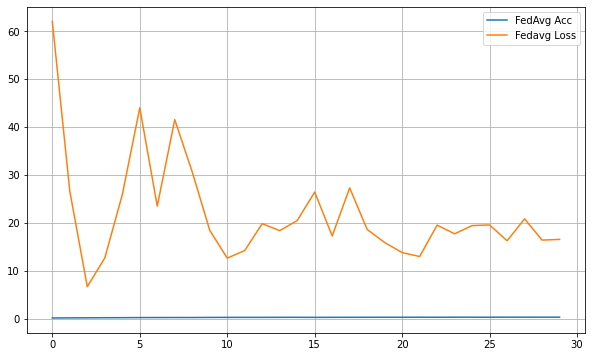

In [3]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

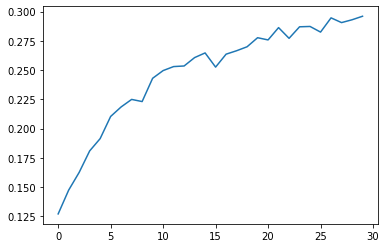

In [4]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [5]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.12702888945738475, 0.147367777592606, 0.1625166662865215, 0.18086111115084758, 0.19139333383904564, 0.21033333341280622, 0.21847555587689083, 0.2248922223018275, 0.22305666655302048, 0.24294000069300334, 0.2495377777351273, 0.25296000068386393, 0.2534733336004946, 0.2606400012142129, 0.2646244454714987, 0.25251111106740104, 0.2635666663448016, 0.2664955558048354, 0.269891110724873, 0.277628888686498, 0.27573333233594893, 0.28625999937454855, 0.27710333342353505, 0.28695888941486675, 0.2872466667658753, 0.28243000118268863, 0.29459444342388047, 0.2905533320373959, 0.2929633325172795, 0.2959799985918734] 

[61.990697590510045, 26.56803632047441, 6.6569608635372575, 12.639022329118518, 25.826542136404253, 43.972986438539294, 23.470123982429502, 41.50996473630269, 30.58355898062388, 18.428226227230496, 12.615058512157864, 14.193583080503677, 19.817068391376072, 18.34455646144019, 20.448017859458925, 26.395864197942945, 17.236369784673055, 27.270172458224824, 18.59392290910085, 15.863813

# FedSGD

In [6]:
acc0 = [[], [0.10000000149011612, 0.1468999981880188, 0.10859999805688858, 0.08380000293254852, 0.10000000149011612, 0.12330000102519989, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.14560000598430634, 0.10000000149011612, 0.10249999910593033, 0.10000000149011612, 0.10000000149011612, 0.09989999979734421, 0.11900000274181366, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11980000138282776, 0.10000000149011612, 0.09969999641180038, 0.10000000149011612, 0.10899999737739563, 0.16259999573230743, 0.10000000149011612, 0.10199999809265137, 0.10849999636411667, 0.10000000149011612, 0.10459999740123749], [0.09950000047683716, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10300000011920929, 0.10790000110864639, 0.10000000149011612, 0.10000000149011612, 0.11190000176429749, 0.10000000149011612, 0.10000000149011612, 0.16619999706745148, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.09000000357627869, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.1257999986410141, 0.1023000031709671, 0.10360000282526016, 0.13979999721050262, 0.10000000149011612, 0.10000000149011612, 0.11829999834299088, 0.10019999742507935, 0.10109999775886536], [0.10199999809265137, 0.10000000149011612, 0.11640000343322754, 0.11110000312328339, 0.14180000126361847, 0.10570000112056732, 0.1103999987244606, 0.10559999942779541, 0.10000000149011612, 0.10000000149011612, 0.1378999948501587, 0.10000000149011612, 0.10000000149011612, 0.14790000021457672, 0.1005999967455864, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.1128000020980835, 0.09529999643564224, 0.10440000146627426, 0.10010000318288803, 0.16990000009536743, 0.10260000079870224, 0.13590000569820404, 0.10000000149011612, 0.10000000149011612, 0.1315000057220459, 0.15070000290870667, 0.1006999984383583], [0.14480000734329224, 0.10000000149011612, 0.10000000149011612, 0.12080000340938568, 0.10000000149011612, 0.14720000326633453, 0.10360000282526016, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10620000213384628, 0.13169999420642853, 0.10869999974966049, 0.1404999941587448, 0.12700000405311584, 0.09960000216960907, 0.10000000149011612, 0.12690000236034393, 0.1136000007390976, 0.1362999975681305, 0.10300000011920929, 0.09950000047683716, 0.10010000318288803, 0.10000000149011612, 0.10320000350475311, 0.12770000100135803, 0.1665000021457672, 0.09969999641180038, 0.13040000200271606, 0.12129999697208405], [0.10000000149011612, 0.10869999974966049, 0.13490000367164612, 0.09679999947547913, 0.10000000149011612, 0.13519999384880066, 0.18019999563694, 0.10000000149011612, 0.17389999330043793, 0.14010000228881836, 0.12600000202655792, 0.11289999634027481, 0.12120000272989273, 0.10000000149011612, 0.10000000149011612, 0.12070000171661377, 0.11270000040531158, 0.10040000081062317, 0.10000000149011612, 0.149399995803833, 0.10000000149011612, 0.16930000483989716, 0.10000000149011612, 0.10000000149011612, 0.16200000047683716, 0.10930000245571136, 0.10429999977350235, 0.1324000060558319, 0.10000000149011612, 0.10000000149011612], [0.10909999907016754, 0.1096000000834465, 0.1103999987244606, 0.14219999313354492, 0.1062999963760376, 0.10010000318288803, 0.09989999979734421, 0.14920000731945038, 0.1859000027179718, 0.12929999828338623, 0.1006999984383583, 0.16359999775886536, 0.1120000034570694, 0.11620000004768372, 0.14820000529289246, 0.10000000149011612, 0.14470000565052032, 0.1386999934911728, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.1120000034570694, 0.10010000318288803, 0.1046999990940094, 0.12099999934434891, 0.10080000013113022, 0.13300000131130219, 0.1348000019788742, 0.09939999878406525], [0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13660000264644623, 0.10000000149011612, 0.15489999949932098, 0.10249999910593033, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.13910000026226044, 0.10000000149011612, 0.10189999639987946, 0.10580000281333923, 0.13650000095367432, 0.11869999766349792, 0.15719999372959137, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10300000011920929, 0.15489999949932098, 0.10000000149011612, 0.10000000149011612, 0.0989999994635582, 0.11980000138282776, 0.15960000455379486, 0.10100000351667404], [0.12800000607967377, 0.10000000149011612, 0.16840000450611115, 0.15770000219345093, 0.14319999516010284, 0.10000000149011612, 0.13680000603199005, 0.20479999482631683, 0.17790000140666962, 0.10000000149011612, 0.11860000342130661, 0.10000000149011612, 0.2092999964952469, 0.16740000247955322, 0.1881999969482422, 0.13619999587535858, 0.12549999356269836, 0.10000000149011612, 0.121799997985363, 0.1454000025987625, 0.11469999700784683, 0.10050000250339508, 0.15379999577999115, 0.15330000221729279, 0.19210000336170197, 0.10400000214576721, 0.22059999406337738, 0.18549999594688416, 0.13850000500679016, 0.10000000149011612], [0.1289999932050705, 0.13369999825954437, 0.14800000190734863, 0.13570000231266022, 0.1665000021457672, 0.10750000178813934, 0.10000000149011612, 0.10029999911785126, 0.14880000054836273, 0.12950000166893005, 0.1770000010728836, 0.19750000536441803, 0.1446000039577484, 0.20110000669956207, 0.10000000149011612, 0.13189999759197235, 0.10859999805688858, 0.15309999883174896, 0.15929999947547913, 0.16949999332427979, 0.16089999675750732, 0.1054999977350235, 0.10000000149011612, 0.10639999806880951, 0.14489999413490295, 0.10000000149011612, 0.16040000319480896, 0.16380000114440918, 0.14030000567436218, 0.13089999556541443], [0.15070000290870667, 0.1736000031232834, 0.20440000295639038, 0.19589999318122864, 0.17249999940395355, 0.10719999670982361, 0.15129999816417694, 0.13899999856948853, 0.2502000033855438, 0.12970000505447388, 0.12690000236034393, 0.1137000024318695, 0.10339999943971634, 0.18479999899864197, 0.12479999661445618, 0.19120000302791595, 0.1264999955892563, 0.10000000149011612, 0.13580000400543213, 0.1632000058889389, 0.15960000455379486, 0.155799999833107, 0.120899997651577, 0.1039000004529953, 0.1655000001192093, 0.09989999979734421, 0.10050000250339508, 0.1582999974489212, 0.10000000149011612, 0.14710000157356262], [0.1354999989271164, 0.1071000024676323, 0.10000000149011612, 0.1006999984383583, 0.1306000053882599, 0.19269999861717224, 0.10000000149011612, 0.10689999908208847, 0.1096000000834465, 0.18310000002384186, 0.17299999296665192, 0.10000000149011612, 0.1436000019311905, 0.10000000149011612, 0.18389999866485596, 0.13420000672340393, 0.1347000002861023, 0.2685000002384186, 0.1647000014781952, 0.18050000071525574, 0.1340000033378601, 0.1362999975681305, 0.1200999990105629, 0.10740000009536743, 0.1656000018119812, 0.11599999666213989, 0.10339999943971634, 0.13510000705718994, 0.10000000149011612, 0.18610000610351562], [0.10480000078678131, 0.1842000037431717, 0.10249999910593033, 0.14399999380111694, 0.18379999697208405, 0.16249999403953552, 0.15109999477863312, 0.1264999955892563, 0.1785999983549118, 0.19290000200271606, 0.163100004196167, 0.1054999977350235, 0.10000000149011612, 0.1459999978542328, 0.16779999434947968, 0.11760000139474869, 0.10700000077486038, 0.131400004029274, 0.1889999955892563, 0.10350000113248825, 0.10000000149011612, 0.10000000149011612, 0.19140000641345978, 0.10010000318288803, 0.19189999997615814, 0.1306000053882599, 0.1039000004529953, 0.19709999859333038, 0.10670000314712524, 0.18440000712871552], [0.14309999346733093, 0.12280000001192093, 0.13670000433921814, 0.12870000302791595, 0.22689999639987946, 0.11720000207424164, 0.11680000275373459, 0.11620000004768372, 0.12110000103712082, 0.22360000014305115, 0.10000000149011612, 0.12549999356269836, 0.12049999833106995, 0.1704999953508377, 0.1128000020980835, 0.1251000016927719, 0.1940000057220459, 0.1266999989748001, 0.11140000075101852, 0.15219999849796295, 0.14810000360012054, 0.10000000149011612, 0.2003999948501587, 0.11289999634027481, 0.20800000429153442, 0.14839999377727509, 0.12540000677108765, 0.16590000689029694, 0.219200000166893, 0.10930000245571136], [0.14800000190734863, 0.1867000013589859, 0.21320000290870667, 0.19599999487400055, 0.17550000548362732, 0.14710000157356262, 0.14079999923706055, 0.14270000159740448, 0.17679999768733978, 0.23569999635219574, 0.15639999508857727, 0.13449999690055847, 0.22939999401569366, 0.2329999953508377, 0.1615000069141388, 0.1867000013589859, 0.10000000149011612, 0.18449999392032623, 0.17900000512599945, 0.10379999876022339, 0.1298999935388565, 0.1476999968290329, 0.19789999723434448, 0.10000000149011612, 0.17759999632835388, 0.12639999389648438, 0.13089999556541443, 0.15839999914169312, 0.10679999738931656, 0.14710000157356262], [0.10000000149011612, 0.10000000149011612, 0.23180000483989716, 0.17790000140666962, 0.10130000114440918, 0.11620000004768372, 0.10459999740123749, 0.17249999940395355, 0.12729999423027039, 0.19449999928474426, 0.12319999933242798, 0.14409999549388885, 0.18850000202655792, 0.10000000149011612, 0.19519999623298645, 0.21459999680519104, 0.22660000622272491, 0.13760000467300415, 0.15790000557899475, 0.2386000007390976, 0.14139999449253082, 0.10000000149011612, 0.13300000131130219, 0.17870000004768372, 0.18070000410079956, 0.15209999680519104, 0.2184000015258789, 0.23649999499320984, 0.11900000274181366, 0.23019999265670776], [0.2653000056743622, 0.1597999930381775, 0.11900000274181366, 0.16529999673366547, 0.1703999936580658, 0.1915999948978424, 0.12759999930858612, 0.20389999449253082, 0.20980000495910645, 0.12630000710487366, 0.16110000014305115, 0.22100000083446503, 0.10350000113248825, 0.1964000016450882, 0.18539999425411224, 0.1873999983072281, 0.22200000286102295, 0.14159999787807465, 0.21580000221729279, 0.14380000531673431, 0.19419999420642853, 0.16509999334812164, 0.1460999995470047, 0.1597999930381775, 0.16220000386238098, 0.10849999636411667, 0.22370000183582306, 0.10360000282526016, 0.10520000010728836, 0.17649999260902405], [0.18389999866485596, 0.1679999977350235, 0.19820000231266022, 0.18369999527931213, 0.16419999301433563, 0.1006999984383583, 0.21690000593662262, 0.10000000149011612, 0.1729000061750412, 0.10819999873638153, 0.11590000241994858, 0.15790000557899475, 0.16910000145435333, 0.2085999995470047, 0.10109999775886536, 0.2583000063896179, 0.20229999721050262, 0.155799999833107, 0.1655000001192093, 0.13809999823570251, 0.12309999763965607, 0.12189999967813492, 0.1509000062942505, 0.125900000333786, 0.21660000085830688, 0.10159999877214432, 0.11900000274181366, 0.20970000326633453, 0.1996999979019165, 0.10000000149011612], [0.13809999823570251, 0.10459999740123749, 0.1688999980688095, 0.12110000103712082, 0.15209999680519104, 0.16349999606609344, 0.19349999725818634, 0.20819999277591705, 0.10000000149011612, 0.16279999911785126, 0.23729999363422394, 0.10000000149011612, 0.14880000054836273, 0.24629999697208405, 0.1858000010251999, 0.11379999667406082, 0.17900000512599945, 0.18960000574588776, 0.16660000383853912, 0.14720000326633453, 0.14910000562667847, 0.15449999272823334, 0.13130000233650208, 0.1509000062942505, 0.16949999332427979, 0.155799999833107, 0.1607999950647354, 0.2102999985218048, 0.16449999809265137, 0.15880000591278076], [0.18940000236034393, 0.19280000030994415, 0.10000000149011612, 0.14630000293254852, 0.10000000149011612, 0.21130000054836273, 0.21809999644756317, 0.23389999568462372, 0.15970000624656677, 0.21070000529289246, 0.18559999763965607, 0.10040000081062317, 0.1776999980211258, 0.16189999878406525, 0.20960000157356262, 0.2354000061750412, 0.2289000004529953, 0.21539999544620514, 0.22010000050067902, 0.10199999809265137, 0.19920000433921814, 0.10000000149011612, 0.13590000569820404, 0.19869999587535858, 0.11299999803304672, 0.1404000073671341, 0.23070000112056732, 0.30979999899864197, 0.20829999446868896, 0.10040000081062317], [0.17560000717639923, 0.12479999661445618, 0.26190000772476196, 0.11550000309944153, 0.10000000149011612, 0.10689999908208847, 0.14429999887943268, 0.20589999854564667, 0.2757999897003174, 0.11159999668598175, 0.15800000727176666, 0.10000000149011612, 0.1468999981880188, 0.10000000149011612, 0.2752000093460083, 0.20919999480247498, 0.16050000488758087, 0.17249999940395355, 0.11460000276565552, 0.2004999965429306, 0.30820000171661377, 0.1151999980211258, 0.1679999977350235, 0.16670000553131104, 0.14339999854564667, 0.10199999809265137, 0.2214999943971634, 0.19249999523162842, 0.1574999988079071, 0.12030000239610672], [0.28630000352859497, 0.15139999985694885, 0.10000000149011612, 0.16089999675750732, 0.2660999894142151, 0.10329999774694443, 0.20229999721050262, 0.15369999408721924, 0.18889999389648438, 0.23090000450611115, 0.14329999685287476, 0.289000004529953, 0.18140000104904175, 0.1006999984383583, 0.164000004529953, 0.2378000020980835, 0.10000000149011612, 0.10000000149011612, 0.17810000479221344, 0.22020000219345093, 0.2581000030040741, 0.18410000205039978, 0.13580000400543213, 0.15530000627040863, 0.16089999675750732, 0.2370000034570694, 0.21469999849796295, 0.25189998745918274, 0.19869999587535858, 0.15790000557899475], [0.21930000185966492, 0.21250000596046448, 0.21699999272823334, 0.10000000149011612, 0.10000000149011612, 0.15189999341964722, 0.2563999891281128, 0.17440000176429749, 0.2685000002384186, 0.2282000035047531, 0.13009999692440033, 0.15379999577999115, 0.11010000109672546, 0.10010000318288803, 0.21610000729560852, 0.20990000665187836, 0.1687999963760376, 0.22669999301433563, 0.23270000517368317, 0.24070000648498535, 0.1704999953508377, 0.22139999270439148, 0.27900001406669617, 0.25839999318122864, 0.15410000085830688, 0.1404000073671341, 0.10000000149011612, 0.23890000581741333, 0.22529999911785126, 0.25119999051094055], [0.15279999375343323, 0.20890000462532043, 0.10000000149011612, 0.19249999523162842, 0.2054000049829483, 0.22859999537467957, 0.1607999950647354, 0.2506999969482422, 0.1949000060558319, 0.2522999942302704, 0.23720000684261322, 0.2540999948978424, 0.2583000063896179, 0.19130000472068787, 0.20829999446868896, 0.1915999948978424, 0.21850000321865082, 0.19449999928474426, 0.18289999663829803, 0.14300000667572021, 0.2800000011920929, 0.18930000066757202, 0.1770000010728836, 0.15049999952316284, 0.13459999859333038, 0.18610000610351562, 0.1875, 0.14100000262260437, 0.22519999742507935, 0.2303999960422516], [0.2802000045776367, 0.18230000138282776, 0.10000000149011612, 0.14319999516010284, 0.28999999165534973, 0.2558000087738037, 0.14139999449253082, 0.19689999520778656, 0.19660000503063202, 0.21299999952316284, 0.21469999849796295, 0.2087000012397766, 0.2467000037431717, 0.2393999993801117, 0.2387000024318695, 0.22550000250339508, 0.210099995136261, 0.2678000032901764, 0.21080000698566437, 0.1395999938249588, 0.16359999775886536, 0.22550000250339508, 0.18729999661445618, 0.27070000767707825, 0.1868000030517578, 0.23180000483989716, 0.1834000051021576, 0.16130000352859497, 0.1720999926328659, 0.10000000149011612], [0.12330000102519989, 0.225600004196167, 0.25110000371932983, 0.18160000443458557, 0.2606000006198883, 0.26030001044273376, 0.1454000025987625, 0.1054999977350235, 0.17759999632835388, 0.1746000051498413, 0.21950000524520874, 0.24050000309944153, 0.2459000051021576, 0.1477999985218048, 0.24819999933242798, 0.10239999741315842, 0.10159999877214432, 0.21690000593662262, 0.17399999499320984, 0.26989999413490295, 0.24289999902248383, 0.17550000548362732, 0.21449999511241913, 0.18279999494552612, 0.2538999915122986, 0.2287999987602234, 0.121799997985363, 0.1720000058412552, 0.24660000205039978, 0.2897000014781952], [0.1234000027179718, 0.2630000114440918, 0.21660000085830688, 0.30090001225471497, 0.2522999942302704, 0.18250000476837158, 0.20110000669956207, 0.28049999475479126, 0.1370999962091446, 0.249099999666214, 0.2223999947309494, 0.23659999668598175, 0.16040000319480896, 0.1307000070810318, 0.20559999346733093, 0.10000000149011612, 0.19529999792575836, 0.1873999983072281, 0.10000000149011612, 0.27459999918937683, 0.2142000049352646, 0.26019999384880066, 0.1460999995470047, 0.156700000166893, 0.14509999752044678, 0.23399999737739563, 0.13950000703334808, 0.21119999885559082, 0.2802000045776367, 0.11760000139474869], [0.10000000149011612, 0.15369999408721924, 0.20309999585151672, 0.1972000002861023, 0.10000000149011612, 0.20559999346733093, 0.19009999930858612, 0.2597000002861023, 0.10019999742507935, 0.12639999389648438, 0.1745000034570694, 0.1868000030517578, 0.2290000021457672, 0.26750001311302185, 0.16210000216960907, 0.29670000076293945, 0.16609999537467957, 0.15549999475479126, 0.23759999871253967, 0.20260000228881836, 0.1851000040769577, 0.25999999046325684, 0.120899997651577, 0.23849999904632568, 0.24330000579357147, 0.15610000491142273, 0.2696000039577484, 0.19850000739097595, 0.15940000116825104, 0.22429999709129333], [0.2696000039577484, 0.2639999985694885, 0.16940000653266907, 0.10000000149011612, 0.24869999289512634, 0.1404999941587448, 0.29910001158714294, 0.2581999897956848, 0.26980000734329224, 0.272599995136261, 0.11069999635219574, 0.251800000667572, 0.17479999363422394, 0.19359999895095825, 0.2329999953508377, 0.14869999885559082, 0.10000000149011612, 0.20839999616146088, 0.24580000340938568, 0.22689999639987946, 0.22630000114440918, 0.14630000293254852, 0.21359999477863312, 0.2574000060558319, 0.10000000149011612, 0.10000000149011612, 0.2554999887943268, 0.2973000109195709, 0.10000000149011612, 0.23029999434947968], [0.16089999675750732, 0.1738000065088272, 0.10000000149011612, 0.1784999966621399, 0.21660000085830688, 0.24869999289512634, 0.288100004196167, 0.22339999675750732, 0.2653999924659729, 0.22200000286102295, 0.26820001006126404, 0.26010000705718994, 0.27549999952316284, 0.21979999542236328, 0.20170000195503235, 0.20160000026226044, 0.10000000149011612, 0.1906999945640564, 0.20069999992847443, 0.2957000136375427, 0.10000000149011612, 0.19099999964237213, 0.1671999990940094, 0.26739999651908875, 0.23999999463558197, 0.23270000517368317, 0.10000000149011612, 0.18490000069141388, 0.18770000338554382, 0.1006999984383583], [0.2703999876976013, 0.15000000596046448, 0.1988999992609024, 0.1647000014781952, 0.24089999496936798, 0.20479999482631683, 0.24969999492168427, 0.24410000443458557, 0.2946000099182129, 0.299699991941452, 0.18690000474452972, 0.24400000274181366, 0.21400000154972076, 0.14920000731945038, 0.12720000743865967, 0.3140999972820282, 0.10000000149011612, 0.13179999589920044, 0.24140000343322754, 0.23399999737739563, 0.23330000042915344, 0.26249998807907104, 0.3068000078201294, 0.2379000037908554, 0.24789999425411224, 0.22679999470710754, 0.15150000154972076, 0.2500999867916107, 0.15549999475479126, 0.19859999418258667]]
loss0 = [[], [2.4214062690734863, 2.5622315406799316, 2.3026247024536133, 2.3024606704711914, 2.572784900665283, 2.5450005531311035, 2.3647401332855225, 2.411018133163452, 2.6670985221862793, 2.3019182682037354, 2.305434226989746, 2.3061683177948, 2.3987059593200684, 2.592137336730957, 2.3121726512908936, 2.409534215927124, 2.928919553756714, 2.8807384967803955, 2.3811068534851074, 2.328017473220825, 2.4396233558654785, 2.3031933307647705, 2.9956419467926025, 2.340144157409668, 2.300663948059082, 2.3066153526306152, 2.4167683124542236, 2.486583709716797, 2.3426592350006104, 2.302528142929077], [2.301642894744873, 2.3871119022369385, 2.3342227935791016, 2.3253958225250244, 2.3025717735290527, 2.3575196266174316, 2.3042709827423096, 2.3125240802764893, 2.3072030544281006, 2.3030459880828857, 3.374297618865967, 2.2999610900878906, 2.3421883583068848, 2.3058762550354004, 2.301286458969116, 2.3672664165496826, 2.3260152339935303, 2.340756893157959, 2.3002121448516846, 2.316248893737793, 2.316204309463501, 2.3061928749084473, 2.298408269882202, 2.4148192405700684, 2.301602840423584, 2.3048501014709473, 2.3081119060516357, 2.3687446117401123, 2.309373140335083, 2.3022074699401855], [2.2934083938598633, 2.29421329498291, 2.365865707397461, 2.3101401329040527, 2.363745927810669, 2.3603034019470215, 2.311093807220459, 2.295818567276001, 2.3119301795959473, 2.3179879188537598, 2.312095880508423, 2.3379645347595215, 2.311784267425537, 2.297161817550659, 2.3162763118743896, 2.2989659309387207, 2.338545083999634, 2.3365461826324463, 2.564270496368408, 2.2978174686431885, 2.29544734954834, 2.310157060623169, 2.323668956756592, 2.2906181812286377, 2.50671648979187, 2.3013999462127686, 2.4743170738220215, 2.4910476207733154, 2.2980165481567383, 2.363102912902832], [2.2548911571502686, 2.3372626304626465, 9.637770652770996, 2.3007802963256836, 2.3020920753479004, 2.48191237449646, 2.365497350692749, 14.498406410217285, 2.3403353691101074, 2.5234405994415283, 2.2879416942596436, 2.2905473709106445, 2.297980785369873, 2.2974159717559814, 2.2795300483703613, 2.286998987197876, 2.3235812187194824, 2.296949863433838, 2.2965621948242188, 2.300917148590088, 2.3273401260375977, 2.328249216079712, 2.3004868030548096, 2.570767402648926, 2.3369178771972656, 2.2849538326263428, 2.280332326889038, 2.507392644882202, 2.390315294265747, 2.2824223041534424], [2.300365686416626, 2.487375497817993, 2.350497245788574, 2.336743116378784, 2.3658182621002197, 2.277271270751953, 2.284210443496704, 5.113050937652588, 2.267982244491577, 2.3689334392547607, 2.323601722717285, 2.3023769855499268, 2.2778544425964355, 2.5517053604125977, 6.035682678222656, 2.2946910858154297, 2.613253355026245, 2.369750499725342, 5.371607780456543, 2.252408504486084, 3.142876386642456, 2.262051820755005, 2.6895551681518555, 2.4447309970855713, 2.305629253387451, 2.2993507385253906, 2.292051076889038, 3.0834543704986572, 6.3753342628479, 2.515653371810913], [2.267880916595459, 2.4989137649536133, 2.4634780883789062, 2.3204891681671143, 2.2665770053863525, 4.3313398361206055, 2.5587425231933594, 2.3169867992401123, 2.2739338874816895, 2.298450469970703, 2.3569164276123047, 2.2506000995635986, 2.285876512527466, 2.382606267929077, 2.2858667373657227, 2.4712436199188232, 2.4448604583740234, 2.3732688426971436, 2.8820247650146484, 2.4062159061431885, 2.9170570373535156, 7.318444728851318, 2.2632317543029785, 2.3087403774261475, 2.332676887512207, 2.3010201454162598, 2.557436227798462, 2.327651262283325, 2.484895944595337, 2.3207108974456787], [2.9728524684906006, 2.352677822113037, 2.383061408996582, 2.274165391921997, 2.3032407760620117, 3.5731444358825684, 2.3017640113830566, 2.3106331825256348, 2.4062154293060303, 2.338512420654297, 2.2832932472229004, 2.281857967376709, 2.306877851486206, 2.290907859802246, 2.2849793434143066, 2.2486319541931152, 2.282113552093506, 2.2587907314300537, 2.413583517074585, 6.256479263305664, 56.32111358642578, 3.380911350250244, 2.2844302654266357, 2.2653839588165283, 7.485107898712158, 37.773887634277344, 2.296633243560791, 2.245810031890869, 2.269890308380127, 2.2943577766418457], [2.2433741092681885, 2.505077362060547, 2.2522106170654297, 2.2822704315185547, 2.265209436416626, 17.84366798400879, 2.298877239227295, 2.2289717197418213, 2.2726359367370605, 43.97548294067383, 2.2632863521575928, 32.77617645263672, 2.252086639404297, 2.2410988807678223, 2.2966816425323486, 2.282736301422119, 2.2786097526550293, 2.4573018550872803, 2.314534902572632, 2.3715264797210693, 2.249351739883423, 2.3452446460723877, 2.270158529281616, 2.233917474746704, 2.243089199066162, 2.4369611740112305, 2.2384417057037354, 2.227545976638794, 2.3855807781219482, 3.0200374126434326], [2.2673699855804443, 2.2638819217681885, 2.518998146057129, 2.2452797889709473, 2.2585432529449463, 2.431749105453491, 4.372550964355469, 2.289787530899048, 2.4780662059783936, 2.2541568279266357, 2.2089591026306152, 2.2359702587127686, 2.453913688659668, 2.212782144546509, 2.311272144317627, 3.2739810943603516, 2.2537426948547363, 2.2804365158081055, 2.2585225105285645, 2.2215397357940674, 2.2497098445892334, 2.423870801925659, 2.4500749111175537, 2.268552541732788, 2.280419111251831, 17.05092430114746, 2.2803421020507812, 2.2694473266601562, 2.283146858215332, 2.3752739429473877], [2.239006996154785, 2.2557013034820557, 2.1588971614837646, 2.189054012298584, 2.1994287967681885, 2.3349878787994385, 2.2357571125030518, 2.3293936252593994, 2.19820499420166, 2.2767555713653564, 2.2746832370758057, 2.309112071990967, 2.2816200256347656, 2.201404571533203, 2.2799456119537354, 2.2378852367401123, 2.1931910514831543, 4.395590305328369, 2.58058762550354, 2.305485963821411, 2.6270108222961426, 2.229536533355713, 2.2978250980377197, 2.299684762954712, 2.4750516414642334, 3.0718154907226562, 2.3764309883117676, 2.6628336906433105, 2.512345790863037, 2.354984998703003], [2.2348668575286865, 2.430574893951416, 11.623546600341797, 3.2151429653167725, 2.6291966438293457, 2.198817729949951, 6.281303882598877, 2.300048589706421, 2.2498416900634766, 2.2038967609405518, 2.3302133083343506, 5.13537073135376, 2.2360684871673584, 51.76947021484375, 2.24562931060791, 2.2325661182403564, 2.28434419631958, 2.0900659561157227, 2.282299518585205, 2.269169569015503, 2.2578036785125732, 2.1946115493774414, 2.256270170211792, 2.68310284614563, 2.1665220260620117, 2.7591707706451416, 2.496622085571289, 2.4628026485443115, 16.681808471679688, 2.253422498703003], [2.6023881435394287, 2.1586930751800537, 2.9384310245513916, 2.3144118785858154, 2.355968475341797, 2.200033664703369, 2.2755064964294434, 2.309871196746826, 2.1823694705963135, 2.3549723625183105, 2.234299898147583, 2.7080469131469727, 2.648815155029297, 2.4780704975128174, 2.4999475479125977, 2.3694908618927, 3.4727625846862793, 2.266192674636841, 2.215632438659668, 2.702833652496338, 8.2102632522583, 3.255913496017456, 2.1780428886413574, 7.646588325500488, 2.1883668899536133, 2.436408519744873, 2.468219518661499, 2.199619770050049, 2.3038227558135986, 2.2113819122314453], [2.312113046646118, 2.2449429035186768, 2.368318796157837, 2.772974967956543, 2.244344472885132, 2.9774887561798096, 2.377697706222534, 3.2256155014038086, 2.4483249187469482, 2.201395273208618, 12.247605323791504, 2.2484896183013916, 2.2355422973632812, 2.2098388671875, 2.382824659347534, 2.237154960632324, 2.2328641414642334, 2.2566096782684326, 3.8828039169311523, 2.5246429443359375, 2.9210174083709717, 16.011680603027344, 2.162524700164795, 2.767169952392578, 2.1474366188049316, 2.1877472400665283, 2.2295567989349365, 2.214303970336914, 2.150813579559326, 2.7494635581970215], [2.533209800720215, 2.212430715560913, 2.1386218070983887, 2.2549948692321777, 2.1846556663513184, 2.2226061820983887, 2.2336556911468506, 2.231823205947876, 2.2110753059387207, 2.1668946743011475, 2.200138568878174, 2.3126165866851807, 2.157161235809326, 2.2176032066345215, 2.2426528930664062, 2.110286235809326, 30.054433822631836, 2.184370279312134, 2.1841816902160645, 3.174691915512085, 2.27588152885437, 2.242412567138672, 2.1765708923339844, 11.788293838500977, 2.212852716445923, 2.2494778633117676, 2.3357110023498535, 2.2214717864990234, 2.389749526977539, 2.2182044982910156], [12.124427795410156, 12.833831787109375, 2.168994426727295, 2.1835455894470215, 2.3203892707824707, 2.211918830871582, 3.062878370285034, 2.145515203475952, 2.2667925357818604, 2.194451332092285, 2.235900402069092, 2.242196798324585, 2.2140719890594482, 28.118118286132812, 2.7787511348724365, 2.12192702293396, 2.085117816925049, 2.359431743621826, 2.256179094314575, 2.1413676738739014, 2.290292501449585, 6.365527629852295, 3.099538803100586, 2.197749614715576, 2.540764570236206, 2.4220054149627686, 2.1965479850769043, 2.089308261871338, 2.226516008377075, 2.1765029430389404], [2.0536749362945557, 3.3681890964508057, 2.275812864303589, 2.5110361576080322, 2.2639660835266113, 2.1636533737182617, 2.4767532348632812, 2.4931163787841797, 2.4764931201934814, 2.582327127456665, 2.386366367340088, 2.3710711002349854, 3.4668562412261963, 2.1033246517181396, 2.192505359649658, 2.156146764755249, 2.415006160736084, 2.5112035274505615, 2.167196750640869, 2.2468948364257812, 2.25889253616333, 2.761702299118042, 2.244821786880493, 2.4919345378875732, 2.171593427658081, 2.5390026569366455, 2.1003007888793945, 3.087815999984741, 4.223396301269531, 2.1963987350463867], [2.4025802612304688, 2.279994487762451, 2.196786880493164, 2.1731271743774414, 2.333285331726074, 4.4036335945129395, 2.1914451122283936, 3.844503879547119, 2.199507474899292, 2.911098003387451, 2.8523542881011963, 2.605379581451416, 2.477888822555542, 2.1748299598693848, 3.680642604827881, 2.0751640796661377, 2.228933095932007, 2.217575788497925, 2.239243268966675, 2.252492666244507, 3.3195362091064453, 2.680539131164551, 2.1871533393859863, 2.592621088027954, 2.2945454120635986, 2.6463963985443115, 2.603591203689575, 2.1825215816497803, 2.148763418197632, 3.435088634490967], [3.121633291244507, 2.499521255493164, 2.2006895542144775, 2.484611749649048, 2.299575090408325, 2.271928071975708, 2.3667991161346436, 2.4184834957122803, 16.471073150634766, 2.3532421588897705, 2.0283443927764893, 21.61250877380371, 2.4057068824768066, 2.176884889602661, 2.5830376148223877, 3.4033734798431396, 2.335909843444824, 2.1419637203216553, 2.134047508239746, 2.2738828659057617, 2.220337152481079, 2.2811126708984375, 2.301046133041382, 2.368922233581543, 2.464358329772949, 2.4428956508636475, 2.8976030349731445, 2.114793300628662, 2.2194111347198486, 2.369858741760254], [2.1570327281951904, 2.1656975746154785, 66.8111801147461, 2.2616522312164307, 34.304443359375, 2.184751272201538, 2.1365432739257812, 2.120861291885376, 2.32267427444458, 2.113741397857666, 2.1966071128845215, 2.3043301105499268, 2.2663495540618896, 2.1896722316741943, 2.123634099960327, 2.183973550796509, 2.1369147300720215, 2.136185884475708, 2.108365535736084, 2.479935646057129, 2.1264233589172363, 55.516719818115234, 2.3679234981536865, 2.1673290729522705, 2.458329677581787, 2.196697235107422, 2.121107816696167, 2.120222568511963, 2.1412034034729004, 4.257582187652588], [2.4464423656463623, 3.290194511413574, 2.066481828689575, 2.697650671005249, 19.25225830078125, 2.8270485401153564, 2.172760248184204, 2.235900402069092, 2.0121066570281982, 2.61995792388916, 2.246938943862915, 103.17219543457031, 2.687541961669922, 19.916378021240234, 1.9817873239517212, 2.184633255004883, 2.430786609649658, 2.3482131958007812, 2.5422894954681396, 2.3675715923309326, 1.9624598026275635, 2.8277597427368164, 2.3421168327331543, 2.216416358947754, 2.326801061630249, 2.475480556488037, 2.0496666431427, 2.1551034450531006, 2.288555383682251, 3.3564085960388184], [2.054572343826294, 2.1226139068603516, 21.39228057861328, 2.5490686893463135, 2.027632713317871, 3.484710216522217, 2.4350039958953857, 2.2496731281280518, 2.2213635444641113, 2.180665969848633, 2.6671504974365234, 2.0052366256713867, 2.389172315597534, 5.44074010848999, 2.4015376567840576, 2.093139171600342, 38.54435729980469, 16.763214111328125, 2.2002968788146973, 2.135460376739502, 2.048358678817749, 2.1531105041503906, 2.232372760772705, 2.200773000717163, 3.976574182510376, 2.1156511306762695, 2.0806684494018555, 2.074808359146118, 2.1979448795318604, 2.945807933807373], [2.21480393409729, 2.2065024375915527, 2.4339599609375, 45.597877502441406, 29.526918411254883, 2.4547536373138428, 2.0309641361236572, 2.105499505996704, 2.1939504146575928, 2.113912582397461, 2.212764024734497, 2.4548490047454834, 3.8211729526519775, 2.8775899410247803, 2.088348627090454, 2.449876546859741, 2.574256181716919, 2.0487520694732666, 2.160306692123413, 2.059450387954712, 2.474229574203491, 2.127777099609375, 2.0188608169555664, 1.9892240762710571, 4.71995210647583, 3.262129068374634, 9.211471557617188, 2.0834219455718994, 2.108332633972168, 2.1563258171081543], [3.027594804763794, 2.0853888988494873, 9.007046699523926, 2.1268985271453857, 2.1464309692382812, 2.122723340988159, 2.791045665740967, 2.096236228942871, 2.3539202213287354, 2.0965280532836914, 2.5194754600524902, 1.9888858795166016, 2.0479416847229004, 2.1259727478027344, 2.3923962116241455, 2.3698604106903076, 2.0722477436065674, 2.1647744178771973, 2.4881677627563477, 3.221773147583008, 2.023333787918091, 2.3061318397521973, 2.1460442543029785, 2.7824041843414307, 2.2755298614501953, 3.189486265182495, 2.2967617511749268, 3.860588788986206, 2.1644983291625977, 2.0663034915924072], [2.058594226837158, 2.33292293548584, 9.191875457763672, 2.5473928451538086, 2.0906991958618164, 1.9858098030090332, 2.9138712882995605, 2.10772442817688, 2.112001419067383, 2.075330972671509, 2.1216368675231934, 2.1180663108825684, 2.0681426525115967, 2.036837577819824, 2.1441144943237305, 2.0720295906066895, 2.156795024871826, 2.018890380859375, 2.153230905532837, 2.2494187355041504, 2.1998767852783203, 2.09647536277771, 2.206101655960083, 2.053539276123047, 2.4833881855010986, 2.1078433990478516, 2.4358980655670166, 2.5980944633483887, 2.4659082889556885, 26.654993057250977], [3.268392562866211, 2.9821836948394775, 2.080288887023926, 2.134474277496338, 2.16235089302063, 1.9976528882980347, 2.7447195053100586, 2.861349582672119, 2.2402360439300537, 2.334585189819336, 2.217275857925415, 2.0952494144439697, 2.0931241512298584, 2.4712235927581787, 2.2487947940826416, 5.8743486404418945, 3.155219078063965, 2.1758484840393066, 2.4600930213928223, 2.0405967235565186, 2.002967357635498, 2.87734055519104, 2.6687042713165283, 2.4512531757354736, 2.0324723720550537, 2.1304421424865723, 2.516909122467041, 2.348451852798462, 2.043870210647583, 1.9670599699020386], [2.3179359436035156, 2.15251088142395, 2.1689534187316895, 1.914996862411499, 2.1545190811157227, 2.396538257598877, 2.2486178874969482, 1.9482814073562622, 2.8367791175842285, 2.0777361392974854, 2.0928311347961426, 2.1357104778289795, 2.2964582443237305, 3.2909936904907227, 2.0369601249694824, 22.196224212646484, 2.254718780517578, 2.2658464908599854, 15.781623840332031, 2.066741943359375, 2.1427907943725586, 2.0424888134002686, 2.956033229827881, 3.198124885559082, 2.3693759441375732, 2.1278905868530273, 4.663605690002441, 2.316821813583374, 1.91048002243042, 3.326266050338745], [15.896109580993652, 2.5239791870117188, 2.079024314880371, 2.21390438079834, 26.007280349731445, 2.5179097652435303, 2.5081870555877686, 2.021578788757324, 4.189908027648926, 3.8166961669921875, 2.480457305908203, 2.6516292095184326, 2.2419321537017822, 2.0856006145477295, 2.3502957820892334, 2.0344789028167725, 2.1570897102355957, 2.265522003173828, 2.063633918762207, 2.1546881198883057, 3.2421023845672607, 2.1739237308502197, 4.302735328674316, 2.361379384994507, 2.1794376373291016, 2.233351230621338, 2.0485033988952637, 2.1716747283935547, 2.929652690887451, 2.197923183441162], [2.0274388790130615, 2.022334575653076, 2.321765184402466, 31.54962158203125, 2.0608930587768555, 3.4649555683135986, 1.9620471000671387, 2.0172107219696045, 2.038907289505005, 2.0082082748413086, 3.0569231510162354, 1.989926815032959, 2.4025473594665527, 2.3640830516815186, 2.035846710205078, 2.6016738414764404, 79.61721801757812, 2.3653929233551025, 2.0450594425201416, 2.353940725326538, 2.110994815826416, 3.255218267440796, 2.0702619552612305, 2.065241575241089, 7.233868598937988, 12.234498023986816, 2.0342133045196533, 1.9533482789993286, 11.283476829528809, 2.0270092487335205], [2.2245888710021973, 2.963867425918579, 32.651641845703125, 2.4615416526794434, 2.1136398315429688, 2.179661750793457, 2.010575771331787, 2.3555688858032227, 2.0197792053222656, 2.3425657749176025, 1.9714670181274414, 2.091029167175293, 2.0915939807891846, 2.1644978523254395, 2.1433603763580322, 2.231078624725342, 33.51001739501953, 2.15753173828125, 2.359708309173584, 1.984747052192688, 42.18921661376953, 2.2468044757843018, 2.223405361175537, 2.037990093231201, 2.3050692081451416, 2.122018575668335, 37.7166748046875, 2.1330597400665283, 2.5266432762145996, 4.716608047485352], [2.2341039180755615, 3.1295385360717773, 2.2579686641693115, 2.724358320236206, 2.11574125289917, 2.5190205574035645, 2.088855743408203, 2.072150468826294, 1.9528255462646484, 1.9086263179779053, 2.4101264476776123, 2.1929428577423096, 2.523084878921509, 2.6634438037872314, 3.111677646636963, 1.9380724430084229, 53.71866226196289, 2.4884183406829834, 2.0080502033233643, 2.09365177154541, 2.0818402767181396, 1.9415675401687622, 1.9689222574234009, 2.2168428897857666, 2.0866801738739014, 2.0463080406188965, 2.668530225753784, 2.038691282272339, 2.5569217205047607, 2.1741912364959717]] 

acc1 = [[], [0.14749999344348907, 0.09989999979734421, 0.10809999704360962, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10740000009536743, 0.11670000106096268, 0.10419999808073044, 0.09939999878406525, 0.11289999634027481, 0.10000000149011612, 0.10000000149011612, 0.10599999874830246, 0.10159999877214432, 0.1014999970793724, 0.10119999945163727, 0.10289999842643738, 0.10000000149011612, 0.120899997651577, 0.0917000025510788, 0.10790000110864639, 0.10010000318288803, 0.11789999902248383, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.13619999587535858, 0.10429999977350235, 0.11180000007152557], [0.10000000149011612, 0.11299999803304672, 0.15549999475479126, 0.10000000149011612, 0.10000000149011612, 0.13989999890327454, 0.13750000298023224, 0.164900004863739, 0.10000000149011612, 0.11819999665021896, 0.10000000149011612, 0.12160000205039978, 0.10329999774694443, 0.11079999804496765, 0.10010000318288803, 0.11429999768733978, 0.10000000149011612, 0.10000000149011612, 0.15389999747276306, 0.11840000003576279, 0.10350000113248825, 0.10000000149011612, 0.10279999673366547, 0.10000000149011612, 0.10610000044107437, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.12370000034570694], [0.10000000149011612, 0.12030000239610672, 0.10000000149011612, 0.1014999970793724, 0.1006999984383583, 0.13600000739097595, 0.10000000149011612, 0.12700000405311584, 0.10180000215768814, 0.10320000350475311, 0.10369999706745148, 0.10000000149011612, 0.1096000000834465, 0.1143999993801117, 0.10000000149011612, 0.10000000149011612, 0.14589999616146088, 0.16089999675750732, 0.11990000307559967, 0.13989999890327454, 0.11190000176429749, 0.10970000177621841, 0.09989999979734421, 0.10000000149011612, 0.10000000149011612, 0.11209999769926071, 0.16120000183582306, 0.10429999977350235, 0.10000000149011612, 0.14159999787807465], [0.10840000212192535, 0.13539999723434448, 0.14800000190734863, 0.10000000149011612, 0.15399999916553497, 0.10000000149011612, 0.1111999973654747, 0.10750000178813934, 0.1071000024676323, 0.10930000245571136, 0.12290000170469284, 0.11320000141859055, 0.1023000031709671, 0.18529999256134033, 0.16500000655651093, 0.11659999936819077, 0.10000000149011612, 0.10000000149011612, 0.16210000216960907, 0.21699999272823334, 0.19990000128746033, 0.1851000040769577, 0.10000000149011612, 0.10189999639987946, 0.10589999705553055, 0.17649999260902405, 0.10000000149011612, 0.11270000040531158, 0.10000000149011612, 0.12720000743865967], [0.10010000318288803, 0.10849999636411667, 0.14030000567436218, 0.1216999962925911, 0.17839999496936798, 0.15139999985694885, 0.11710000038146973, 0.1582999974489212, 0.11840000003576279, 0.10830000042915344, 0.15809999406337738, 0.164000004529953, 0.10000000149011612, 0.10999999940395355, 0.11389999836683273, 0.10000000149011612, 0.12269999831914902, 0.16359999775886536, 0.16920000314712524, 0.16599999368190765, 0.11010000109672546, 0.10000000149011612, 0.17880000174045563, 0.10000000149011612, 0.11760000139474869, 0.10000000149011612, 0.09910000115633011, 0.1005999967455864, 0.17020000517368317, 0.1476999968290329], [0.10000000149011612, 0.10660000145435333, 0.13529999554157257, 0.1005999967455864, 0.11940000206232071, 0.10000000149011612, 0.13019999861717224, 0.20200000703334808, 0.14509999752044678, 0.17299999296665192, 0.10189999639987946, 0.10010000318288803, 0.1014999970793724, 0.1670999974012375, 0.13130000233650208, 0.10209999978542328, 0.10379999876022339, 0.19249999523162842, 0.10360000282526016, 0.10859999805688858, 0.10019999742507935, 0.11129999905824661, 0.10000000149011612, 0.15060000121593475, 0.125, 0.10930000245571136, 0.1005999967455864, 0.10000000149011612, 0.10760000348091125, 0.14810000360012054], [0.11490000039339066, 0.1526000052690506, 0.21819999814033508, 0.1054999977350235, 0.1404999941587448, 0.10000000149011612, 0.12790000438690186, 0.13169999420642853, 0.18529999256134033, 0.23999999463558197, 0.1679999977350235, 0.12939999997615814, 0.1906999945640564, 0.21480000019073486, 0.10000000149011612, 0.13379999995231628, 0.11949999630451202, 0.2126999944448471, 0.14249999821186066, 0.10000000149011612, 0.15330000221729279, 0.10379999876022339, 0.15199999511241913, 0.14830000698566437, 0.12489999830722809, 0.11720000207424164, 0.1598999947309494, 0.10509999841451645, 0.12330000102519989, 0.14030000567436218], [0.10000000149011612, 0.1761000007390976, 0.20589999854564667, 0.18700000643730164, 0.1777999997138977, 0.20970000326633453, 0.1598999947309494, 0.14730000495910645, 0.12919999659061432, 0.17470000684261322, 0.13429999351501465, 0.17309999465942383, 0.19859999418258667, 0.18219999969005585, 0.13770000636577606, 0.1006999984383583, 0.16680000722408295, 0.12330000102519989, 0.13650000095367432, 0.11150000244379044, 0.18549999594688416, 0.12359999865293503, 0.14339999854564667, 0.17149999737739563, 0.12129999697208405, 0.10419999808073044, 0.10440000146627426, 0.10000000149011612, 0.10000000149011612, 0.10660000145435333], [0.14300000667572021, 0.1039000004529953, 0.1404999941587448, 0.18979999423027039, 0.13989999890327454, 0.20999999344348907, 0.17739999294281006, 0.22709999978542328, 0.11959999799728394, 0.10130000114440918, 0.17479999363422394, 0.2379000037908554, 0.2029000073671341, 0.10209999978542328, 0.1590999960899353, 0.1979999989271164, 0.13529999554157257, 0.20080000162124634, 0.18479999899864197, 0.16680000722408295, 0.17309999465942383, 0.0997999981045723, 0.15600000321865082, 0.16699999570846558, 0.17229999601840973, 0.164900004863739, 0.12309999763965607, 0.15440000593662262, 0.10679999738931656, 0.16040000319480896], [0.13220000267028809, 0.1266999989748001, 0.19869999587535858, 0.19660000503063202, 0.1965000033378601, 0.1753000020980835, 0.12129999697208405, 0.24160000681877136, 0.10249999910593033, 0.19280000030994415, 0.16670000553131104, 0.22550000250339508, 0.1451999992132187, 0.15309999883174896, 0.2117999941110611, 0.1535000056028366, 0.20160000026226044, 0.10419999808073044, 0.11159999668598175, 0.10530000180006027, 0.10909999907016754, 0.1143999993801117, 0.15309999883174896, 0.10000000149011612, 0.14470000565052032, 0.10000000149011612, 0.12380000203847885, 0.18629999458789825, 0.10520000010728836, 0.17020000517368317], [0.23839999735355377, 0.1657000035047531, 0.17319999635219574, 0.1046999990940094, 0.10000000149011612, 0.10000000149011612, 0.1136000007390976, 0.13779999315738678, 0.1729000061750412, 0.13740000128746033, 0.17810000479221344, 0.1136000007390976, 0.23070000112056732, 0.15399999916553497, 0.10700000077486038, 0.17339999973773956, 0.12319999933242798, 0.19740000367164612, 0.14980000257492065, 0.19509999454021454, 0.1088000014424324, 0.11320000141859055, 0.18559999763965607, 0.17309999465942383, 0.15459999442100525, 0.17479999363422394, 0.17919999361038208, 0.1914999932050705, 0.1396999955177307, 0.13529999554157257], [0.211899995803833, 0.22599999606609344, 0.10490000247955322, 0.19699999690055847, 0.15049999952316284, 0.2054000049829483, 0.18850000202655792, 0.15219999849796295, 0.19539999961853027, 0.251800000667572, 0.10000000149011612, 0.20659999549388885, 0.1981000006198883, 0.16349999606609344, 0.12160000205039978, 0.2070000022649765, 0.1356000006198883, 0.10000000149011612, 0.11869999766349792, 0.21799999475479126, 0.21359999477863312, 0.10000000149011612, 0.24070000648498535, 0.15780000388622284, 0.16619999706745148, 0.1923000067472458, 0.12409999966621399, 0.14020000398159027, 0.10000000149011612, 0.16509999334812164], [0.18469999730587006, 0.10000000149011612, 0.2160000056028366, 0.16680000722408295, 0.14329999685287476, 0.21610000729560852, 0.273499995470047, 0.21660000085830688, 0.26440000534057617, 0.10000000149011612, 0.1670999974012375, 0.19670000672340393, 0.13680000603199005, 0.1160999983549118, 0.10000000149011612, 0.17010000348091125, 0.10840000212192535, 0.13410000503063202, 0.21960000693798065, 0.16300000250339508, 0.10639999806880951, 0.20730000734329224, 0.16200000047683716, 0.19179999828338623, 0.20229999721050262, 0.10930000245571136, 0.1615000069141388, 0.16940000653266907, 0.10419999808073044, 0.2320999950170517], [0.2037999927997589, 0.17159999907016754, 0.1225999966263771, 0.17679999768733978, 0.22550000250339508, 0.12770000100135803, 0.15719999372959137, 0.1776999980211258, 0.10260000079870224, 0.20250000059604645, 0.16290000081062317, 0.21539999544620514, 0.23929999768733978, 0.20890000462532043, 0.2328999936580658, 0.14470000565052032, 0.15029999613761902, 0.23510000109672546, 0.12950000166893005, 0.20579999685287476, 0.10000000149011612, 0.26840001344680786, 0.2766000032424927, 0.18410000205039978, 0.18150000274181366, 0.2669000029563904, 0.10000000149011612, 0.2612999975681305, 0.14419999718666077, 0.20839999616146088], [0.11789999902248383, 0.18780000507831573, 0.24050000309944153, 0.10000000149011612, 0.24140000343322754, 0.16279999911785126, 0.17730000615119934, 0.15549999475479126, 0.13899999856948853, 0.20110000669956207, 0.10000000149011612, 0.19290000200271606, 0.13850000500679016, 0.23199999332427979, 0.23549999296665192, 0.16779999434947968, 0.13369999825954437, 0.19030000269412994, 0.13259999454021454, 0.26460000872612, 0.19089999794960022, 0.251800000667572, 0.2102999985218048, 0.17319999635219574, 0.21860000491142273, 0.2387000024318695, 0.1647000014781952, 0.10000000149011612, 0.16329999268054962, 0.2012999951839447], [0.1500999927520752, 0.1736000031232834, 0.13420000672340393, 0.17299999296665192, 0.1670999974012375, 0.1826000064611435, 0.10000000149011612, 0.18639999628067017, 0.2289000004529953, 0.18449999392032623, 0.21130000054836273, 0.1589999943971634, 0.19529999792575836, 0.1703999936580658, 0.1444000005722046, 0.1761000007390976, 0.19280000030994415, 0.164900004863739, 0.17489999532699585, 0.1264999955892563, 0.10899999737739563, 0.22120000422000885, 0.23829999566078186, 0.21770000457763672, 0.20229999721050262, 0.15230000019073486, 0.10000000149011612, 0.20550000667572021, 0.12520000338554382, 0.11990000307559967], [0.15230000019073486, 0.14149999618530273, 0.2867000102996826, 0.18780000507831573, 0.19349999725818634, 0.20239999890327454, 0.17720000445842743, 0.10000000149011612, 0.1371999979019165, 0.1876000016927719, 0.1762000024318695, 0.21060000360012054, 0.17960000038146973, 0.15449999272823334, 0.19979999959468842, 0.2280000001192093, 0.24009999632835388, 0.22759999334812164, 0.10000000149011612, 0.1437000036239624, 0.19300000369548798, 0.24940000474452972, 0.25189998745918274, 0.2395000010728836, 0.12300000339746475, 0.15440000593662262, 0.23499999940395355, 0.1444000005722046, 0.1151999980211258, 0.21130000054836273], [0.13050000369548798, 0.22689999639987946, 0.22059999406337738, 0.18150000274181366, 0.16590000689029694, 0.10000000149011612, 0.27000001072883606, 0.2655999958515167, 0.26159998774528503, 0.12150000035762787, 0.23070000112056732, 0.250900000333786, 0.14020000398159027, 0.1876000016927719, 0.17980000376701355, 0.24120000004768372, 0.10000000149011612, 0.17170000076293945, 0.1860000044107437, 0.25279998779296875, 0.17010000348091125, 0.21040000021457672, 0.2838999927043915, 0.1543000042438507, 0.21709999442100525, 0.14790000021457672, 0.1923999935388565, 0.2549999952316284, 0.10000000149011612, 0.15150000154972076], [0.2460000067949295, 0.16529999673366547, 0.23899999260902405, 0.2295999974012375, 0.1770000010728836, 0.24889999628067017, 0.2847999930381775, 0.1923000067472458, 0.15919999778270721, 0.29170000553131104, 0.14499999582767487, 0.24709999561309814, 0.16050000488758087, 0.2872999906539917, 0.2759000062942505, 0.24650000035762787, 0.14910000562667847, 0.2434999942779541, 0.12330000102519989, 0.22310000658035278, 0.13580000400543213, 0.12460000067949295, 0.23729999363422394, 0.10000000149011612, 0.10740000009536743, 0.11550000309944153, 0.24650000035762787, 0.20499999821186066, 0.2639999985694885, 0.21240000426769257], [0.29490000009536743, 0.10000000149011612, 0.24500000476837158, 0.2240999937057495, 0.2687000036239624, 0.2337999939918518, 0.24199999868869781, 0.10000000149011612, 0.19460000097751617, 0.23180000483989716, 0.2312999963760376, 0.18490000069141388, 0.20890000462532043, 0.21209999918937683, 0.21089999377727509, 0.23029999434947968, 0.2134000062942505, 0.20250000059604645, 0.10369999706745148, 0.23970000445842743, 0.17599999904632568, 0.10000000149011612, 0.24279999732971191, 0.10000000149011612, 0.22930000722408295, 0.2289000004529953, 0.23919999599456787, 0.17309999465942383, 0.26100000739097595, 0.21410000324249268], [0.10000000149011612, 0.16380000114440918, 0.10000000149011612, 0.10000000149011612, 0.16380000114440918, 0.26499998569488525, 0.16099999845027924, 0.10000000149011612, 0.20640000700950623, 0.24449999630451202, 0.2883000075817108, 0.10700000077486038, 0.12710000574588776, 0.23170000314712524, 0.19259999692440033, 0.2653999924659729, 0.22930000722408295, 0.2354000061750412, 0.19030000269412994, 0.16130000352859497, 0.15790000557899475, 0.21940000355243683, 0.23330000042915344, 0.22930000722408295, 0.10000000149011612, 0.14820000529289246, 0.2184000015258789, 0.2393999993801117, 0.3098999857902527, 0.2313999980688095], [0.19539999961853027, 0.26930001378059387, 0.10339999943971634, 0.10000000149011612, 0.10419999808073044, 0.20110000669956207, 0.2630000114440918, 0.25279998779296875, 0.23659999668598175, 0.19519999623298645, 0.21639999747276306, 0.18479999899864197, 0.22100000083446503, 0.1436000019311905, 0.1868000030517578, 0.23829999566078186, 0.17010000348091125, 0.12269999831914902, 0.20489999651908875, 0.23280000686645508, 0.1679999977350235, 0.23240000009536743, 0.22269999980926514, 0.17190000414848328, 0.23019999265670776, 0.12849999964237213, 0.23649999499320984, 0.23549999296665192, 0.1673000007867813, 0.23170000314712524], [0.10899999737739563, 0.12219999730587006, 0.14000000059604645, 0.193900004029274, 0.10000000149011612, 0.23280000686645508, 0.25850000977516174, 0.17350000143051147, 0.2720000147819519, 0.10000000149011612, 0.21250000596046448, 0.2547000050544739, 0.2720000147819519, 0.10180000215768814, 0.27549999952316284, 0.25429999828338623, 0.16040000319480896, 0.23739999532699585, 0.18479999899864197, 0.2838999927043915, 0.19509999454021454, 0.23919999599456787, 0.19089999794960022, 0.21860000491142273, 0.3098999857902527, 0.12939999997615814, 0.25780001282691956, 0.23639999330043793, 0.1648000031709671, 0.24609999358654022], [0.3125999867916107, 0.12370000034570694, 0.10000000149011612, 0.22529999911785126, 0.17470000684261322, 0.15399999916553497, 0.179299995303154, 0.2110999971628189, 0.10000000149011612, 0.22190000116825104, 0.14949999749660492, 0.24379999935626984, 0.26089999079704285, 0.2671000063419342, 0.10000000149011612, 0.16120000183582306, 0.27570000290870667, 0.19519999623298645, 0.10000000149011612, 0.16509999334812164, 0.2281000018119812, 0.17949999868869781, 0.10000000149011612, 0.21459999680519104, 0.23690000176429749, 0.29109999537467957, 0.16290000081062317, 0.10000000149011612, 0.15049999952316284, 0.20499999821186066], [0.2433999925851822, 0.22769999504089355, 0.10000000149011612, 0.10000000149011612, 0.23829999566078186, 0.10000000149011612, 0.2199999988079071, 0.25769999623298645, 0.2759000062942505, 0.13609999418258667, 0.2903999984264374, 0.19200000166893005, 0.20900000631809235, 0.21080000698566437, 0.2976999878883362, 0.18150000274181366, 0.12770000100135803, 0.16699999570846558, 0.14820000529289246, 0.2754000127315521, 0.2078000009059906, 0.29499998688697815, 0.23680000007152557, 0.31630000472068787, 0.12520000338554382, 0.1404000073671341, 0.22830000519752502, 0.32339999079704285, 0.2012999951839447, 0.218299999833107], [0.20640000700950623, 0.2906999886035919, 0.1185000017285347, 0.10000000149011612, 0.2565999925136566, 0.27889999747276306, 0.23479999601840973, 0.17739999294281006, 0.24570000171661377, 0.10000000149011612, 0.2418999969959259, 0.2425999939441681, 0.10000000149011612, 0.10000000149011612, 0.35260000824928284, 0.2045000046491623, 0.1988999992609024, 0.24070000648498535, 0.22669999301433563, 0.1445000022649765, 0.25769999623298645, 0.23729999363422394, 0.18860000371932983, 0.3165000081062317, 0.29339998960494995, 0.30390000343322754, 0.13760000467300415, 0.26820001006126404, 0.24050000309944153, 0.2939999997615814], [0.219200000166893, 0.2371000051498413, 0.22699999809265137, 0.2768000066280365, 0.20409999787807465, 0.2944999933242798, 0.226500004529953, 0.2102999985218048, 0.17000000178813934, 0.30559998750686646, 0.25679999589920044, 0.25440001487731934, 0.30559998750686646, 0.16009999811649323, 0.33320000767707825, 0.2793000042438507, 0.23309999704360962, 0.2295999974012375, 0.22910000383853912, 0.19449999928474426, 0.23360000550746918, 0.28839999437332153, 0.20389999449253082, 0.20759999752044678, 0.26980000734329224, 0.3098999857902527, 0.15700000524520874, 0.14069999754428864, 0.2045000046491623, 0.23639999330043793], [0.24050000309944153, 0.27379998564720154, 0.2126999944448471, 0.21850000321865082, 0.24420000612735748, 0.32659998536109924, 0.26660001277923584, 0.2619999945163727, 0.272599995136261, 0.16869999468326569, 0.10570000112056732, 0.3190999925136566, 0.22419999539852142, 0.2354000061750412, 0.1453000009059906, 0.14640000462532043, 0.2150000035762787, 0.19249999523162842, 0.24529999494552612, 0.1808999925851822, 0.2809999883174896, 0.30250000953674316, 0.19689999520778656, 0.2062000036239624, 0.22419999539852142, 0.188400000333786, 0.20829999446868896, 0.31119999289512634, 0.2175000011920929, 0.10000000149011612], [0.2915000021457672, 0.28999999165534973, 0.3156999945640564, 0.28450000286102295, 0.2603999972343445, 0.1941000074148178, 0.1762000024318695, 0.15559999644756317, 0.24779999256134033, 0.2515000104904175, 0.30390000343322754, 0.28459998965263367, 0.22689999639987946, 0.21050000190734863, 0.10000000149011612, 0.15479999780654907, 0.3319000005722046, 0.26919999718666077, 0.2897000014781952, 0.10000000149011612, 0.2644999921321869, 0.2434999942779541, 0.24979999661445618, 0.3124000132083893, 0.10000000149011612, 0.10000000149011612, 0.2531000077724457, 0.2976999878883362, 0.22259999811649323, 0.10000000149011612], [0.10000000149011612, 0.1080000028014183, 0.2736999988555908, 0.2563000023365021, 0.23029999434947968, 0.210099995136261, 0.11869999766349792, 0.20579999685287476, 0.17030000686645508, 0.12870000302791595, 0.25369998812675476, 0.2705000042915344, 0.16269999742507935, 0.14800000190734863, 0.25429999828338623, 0.26499998569488525, 0.29159998893737793, 0.10000000149011612, 0.20649999380111694, 0.2727000117301941, 0.1923999935388565, 0.2134999930858612, 0.2712000012397766, 0.22310000658035278, 0.27410000562667847, 0.20679999887943268, 0.2102999985218048, 0.28700000047683716, 0.23070000112056732, 0.27149999141693115]]
loss1 = [[], [2.3251919746398926, 2.306574821472168, 2.3126332759857178, 2.3027045726776123, 2.4646873474121094, 2.30413818359375, 2.3025989532470703, 2.379235029220581, 2.318126678466797, 2.3646302223205566, 2.561814069747925, 97.9273910522461, 2.402968406677246, 2.326277256011963, 2.304108142852783, 2.373579740524292, 2.3042752742767334, 2.3059473037719727, 2.4583609104156494, 2.3076395988464355, 2.3034465312957764, 2.2965080738067627, 2.3195126056671143, 2.3062691688537598, 2.3372631072998047, 100.71351623535156, 2.3760035037994385, 2.336451768875122, 2.347627639770508, 2.342860460281372], [2.4333808422088623, 2.2886245250701904, 2.2872276306152344, 2.2959747314453125, 2.3159499168395996, 2.2990782260894775, 2.271101951599121, 2.2992725372314453, 2.5259499549865723, 2.299778461456299, 2.352389335632324, 2.3770036697387695, 2.2996203899383545, 2.583449363708496, 2.3131496906280518, 3.416733980178833, 3.4210848808288574, 2.526655912399292, 2.2831125259399414, 2.3289034366607666, 2.329732894897461, 2.2769923210144043, 2.2903237342834473, 2.5942723751068115, 2.362196207046509, 2.4737727642059326, 2.8901097774505615, 2.323330879211426, 2.2867581844329834, 2.2808282375335693], [2.3579893112182617, 2.2684624195098877, 2.310906171798706, 2.3103809356689453, 3.114304542541504, 2.289593458175659, 6.65247106552124, 2.295927047729492, 2.323235273361206, 2.3393073081970215, 2.4225027561187744, 2.3730673789978027, 2.2922894954681396, 2.2776715755462646, 2.4873785972595215, 25.834308624267578, 2.255033254623413, 2.2784786224365234, 2.3062803745269775, 2.3074791431427, 2.314854145050049, 2.261162757873535, 2.4449362754821777, 2.324603796005249, 2.93937087059021, 2.2811524868011475, 2.278977394104004, 2.2999918460845947, 8.555106163024902, 2.2909324169158936], [2.309567451477051, 2.2848100662231445, 2.263496160507202, 2.659871816635132, 2.285547971725464, 3.151087999343872, 2.269151449203491, 2.2989563941955566, 2.246527910232544, 2.3008811473846436, 2.2864596843719482, 2.289576530456543, 2.3020548820495605, 2.2802228927612305, 2.267073154449463, 2.6438252925872803, 4.994055271148682, 3.1808886528015137, 2.2575321197509766, 2.2845921516418457, 2.2510948181152344, 2.278707504272461, 50.71733093261719, 2.2450101375579834, 2.505080461502075, 2.2863354682922363, 9.7681884765625, 2.249572992324829, 12.687352180480957, 2.2550764083862305], [2.427941083908081, 2.2631115913391113, 2.295548677444458, 2.516615390777588, 2.266347646713257, 2.226914882659912, 2.282017707824707, 2.270486831665039, 2.7200276851654053, 2.2696516513824463, 2.2951245307922363, 2.21486234664917, 4.5531721115112305, 2.300464391708374, 2.2994511127471924, 18.446760177612305, 2.4446680545806885, 2.2335782051086426, 2.2817323207855225, 2.265451431274414, 2.2489190101623535, 9.834549903869629, 2.257145643234253, 5.58772087097168, 2.2772858142852783, 31.262292861938477, 2.4412739276885986, 2.4300286769866943, 2.211224317550659, 2.274632692337036], [23.047317504882812, 2.4310762882232666, 2.241748571395874, 2.873931407928467, 2.2586560249328613, 11.22331714630127, 2.270524024963379, 2.2439279556274414, 2.297297954559326, 2.2731924057006836, 3.3714778423309326, 2.5399911403656006, 4.575799465179443, 2.2508134841918945, 2.2825019359588623, 2.3405120372772217, 2.836413621902466, 2.1915454864501953, 2.365976572036743, 2.824073553085327, 3.039562225341797, 2.326098680496216, 2.269801616668701, 2.223379373550415, 2.316645622253418, 2.463629961013794, 2.49904465675354, 2.41243052482605, 2.402599811553955, 2.2557590007781982], [2.2577366828918457, 2.231178045272827, 2.1510279178619385, 2.5193216800689697, 2.2080163955688477, 7.882514953613281, 2.3494157791137695, 2.23901629447937, 2.1654551029205322, 2.155637502670288, 2.179715871810913, 2.553976535797119, 2.1914401054382324, 2.1316356658935547, 27.577472686767578, 2.2447874546051025, 2.474388599395752, 2.150052785873413, 2.2788643836975098, 4.6424384117126465, 2.1942217350006104, 2.6111233234405518, 2.25223970413208, 2.225619077682495, 2.2096104621887207, 2.4619693756103516, 2.236135721206665, 2.521038770675659, 2.3291938304901123, 2.3665554523468018], [13.335479736328125, 2.264343738555908, 2.1041479110717773, 2.1812942028045654, 2.180678129196167, 2.123363733291626, 2.30238938331604, 2.2722394466400146, 2.439617156982422, 2.632723569869995, 2.4926373958587646, 2.209803581237793, 2.2264225482940674, 2.155625104904175, 2.397426128387451, 2.371622323989868, 2.1653101444244385, 3.357250690460205, 2.24174165725708, 2.400669813156128, 2.238272190093994, 2.81978702545166, 2.2329611778259277, 3.1132569313049316, 2.5589873790740967, 2.291780948638916, 3.520249128341675, 11.809318542480469, 54.11518859863281, 3.3466012477874756], [2.391040086746216, 2.8092942237854004, 2.5611073970794678, 2.2049450874328613, 3.4954984188079834, 2.229682445526123, 2.2136857509613037, 2.1062397956848145, 2.8940889835357666, 2.589935302734375, 2.1151034832000732, 2.13016414642334, 2.153911828994751, 3.926820993423462, 2.2130932807922363, 2.2004313468933105, 2.4710006713867188, 2.220457077026367, 2.1591851711273193, 2.188811779022217, 2.3515172004699707, 3.731822967529297, 2.589662790298462, 2.1874682903289795, 2.175893545150757, 2.1977176666259766, 2.2346532344818115, 2.772470474243164, 2.9897282123565674, 2.1981201171875], [2.2644307613372803, 2.422659397125244, 2.1847074031829834, 2.1368749141693115, 2.1010797023773193, 2.167800188064575, 2.8580496311187744, 2.1878890991210938, 2.844066858291626, 2.2346837520599365, 2.182955741882324, 2.193249464035034, 2.873476028442383, 2.1368889808654785, 2.153860569000244, 3.2132654190063477, 2.131284475326538, 2.4819114208221436, 2.374098300933838, 2.477200508117676, 2.3499324321746826, 2.403308629989624, 2.2336180210113525, 22.980783462524414, 2.1638474464416504, 3.0883984565734863, 2.238211154937744, 2.9105491638183594, 2.807943105697632, 2.221298933029175], [2.073108196258545, 2.3863465785980225, 2.427034854888916, 4.1301589012146, 7.5000834465026855, 9.948598861694336, 2.355720281600952, 2.9710569381713867, 2.196484327316284, 2.410862445831299, 3.0412917137145996, 2.764925479888916, 2.063239336013794, 2.471498727798462, 2.4074742794036865, 2.2648255825042725, 2.5567426681518555, 2.286665201187134, 2.3037681579589844, 2.2318217754364014, 3.0846595764160156, 3.2939043045043945, 2.383420705795288, 2.067548990249634, 2.3775877952575684, 2.1827430725097656, 3.017988920211792, 2.07357120513916, 2.421685218811035, 3.9012246131896973], [2.155095100402832, 2.1374893188476562, 3.47265362739563, 2.2429275512695312, 2.380052328109741, 2.125109910964966, 2.1605122089385986, 2.2229888439178467, 2.302280902862549, 2.0638906955718994, 15.192889213562012, 2.0995752811431885, 2.2481186389923096, 2.218379259109497, 2.313941240310669, 2.1267917156219482, 2.5463337898254395, 39.094139099121094, 3.218376874923706, 2.1533563137054443, 2.134713888168335, 31.372135162353516, 2.110351085662842, 2.249476909637451, 2.223647356033325, 2.199580192565918, 2.92110538482666, 2.879899501800537, 7.951450824737549, 2.1629114151000977], [2.34735369682312, 12.041963577270508, 2.2279813289642334, 2.214755058288574, 3.026827335357666, 2.0973236560821533, 2.0235092639923096, 2.1196558475494385, 1.942981481552124, 50.68342971801758, 2.1613612174987793, 2.6987361907958984, 3.3634276390075684, 2.4544293880462646, 17.79547882080078, 2.183871269226074, 2.295891523361206, 2.25372314453125, 2.130444288253784, 2.2027194499969482, 2.9587223529815674, 2.218010663986206, 2.345961570739746, 2.2401397228240967, 2.1342594623565674, 2.328537702560425, 2.516735315322876, 2.1814098358154297, 3.3623623847961426, 2.075664758682251], [2.190574884414673, 2.1829278469085693, 2.7231569290161133, 2.5559334754943848, 2.051147222518921, 2.4869964122772217, 2.2327234745025635, 2.601771593093872, 3.341982126235962, 2.5539629459381104, 2.143657684326172, 2.2831788063049316, 1.9973251819610596, 2.6775870323181152, 2.092442274093628, 2.5879969596862793, 2.762193441390991, 2.1817314624786377, 2.7515084743499756, 2.5796542167663574, 10.100591659545898, 2.0330049991607666, 2.0063865184783936, 2.172022819519043, 2.283074378967285, 2.0215232372283936, 5.729923248291016, 2.1067724227905273, 2.8155744075775146, 2.17557692527771], [2.749997854232788, 2.224943161010742, 1.9926185607910156, 12.583441734313965, 2.0543625354766846, 2.1795639991760254, 2.3188273906707764, 2.4170122146606445, 3.284059762954712, 2.098134756088257, 34.52862548828125, 2.165619134902954, 2.5464296340942383, 2.4493143558502197, 2.1717069149017334, 2.648038864135742, 2.4517860412597656, 2.1637887954711914, 5.173587799072266, 2.018954038619995, 2.166438341140747, 2.0144639015197754, 2.332700252532959, 2.1479568481445312, 2.1113104820251465, 2.015871047973633, 3.4713194370269775, 26.15297508239746, 3.0891082286834717, 2.1763272285461426], [2.2293457984924316, 2.1065409183502197, 3.1713106632232666, 5.109516620635986, 2.3486900329589844, 2.135331869125366, 67.37065887451172, 2.217597723007202, 2.0776264667510986, 2.1276190280914307, 2.2071940898895264, 2.5759620666503906, 2.0983753204345703, 2.5454890727996826, 2.176156759262085, 2.2137374877929688, 2.4102389812469482, 2.2048916816711426, 2.2438013553619385, 2.203103542327881, 3.1392335891723633, 2.116581439971924, 2.0603983402252197, 2.158808708190918, 2.159148931503296, 2.246365547180176, 46.13920593261719, 2.110241174697876, 2.7858192920684814, 2.240433931350708], [2.9698798656463623, 2.368884563446045, 2.027034044265747, 2.2739760875701904, 2.2340290546417236, 2.1275887489318848, 2.2412033081054688, 47.649513244628906, 4.092772483825684, 2.4676501750946045, 2.17537784576416, 2.0999040603637695, 2.6633458137512207, 3.123696804046631, 2.526611804962158, 2.197568655014038, 2.1360831260681152, 2.284562587738037, 48.08749771118164, 3.2719454765319824, 2.1215507984161377, 2.087695598602295, 2.1824114322662354, 2.1252639293670654, 3.450856924057007, 2.4642562866210938, 2.0795047283172607, 3.077178478240967, 3.2115347385406494, 2.1207118034362793], [2.481200695037842, 2.288766622543335, 2.083300828933716, 2.6285133361816406, 3.0313668251037598, 81.08040618896484, 1.9973832368850708, 2.0470800399780273, 2.0075244903564453, 3.7234926223754883, 2.0375771522521973, 2.0379819869995117, 2.4902868270874023, 2.172454833984375, 2.4405999183654785, 2.045299530029297, 26.865140914916992, 2.3681516647338867, 2.3941969871520996, 2.180088996887207, 2.851862907409668, 2.289027452468872, 2.036001682281494, 2.4582483768463135, 2.2352681159973145, 2.466430187225342, 3.000819683074951, 2.1022419929504395, 25.82011604309082, 2.7182369232177734], [2.0812172889709473, 2.4421803951263428, 2.105567693710327, 2.044133424758911, 2.375072956085205, 2.0701425075531006, 1.9855620861053467, 2.2400062084198, 2.384125232696533, 1.9553580284118652, 2.6020255088806152, 2.117648124694824, 2.265130043029785, 1.9280626773834229, 2.140155792236328, 2.125148057937622, 2.4228599071502686, 2.037977457046509, 3.116777181625366, 2.2070705890655518, 3.077765941619873, 8.645058631896973, 2.10422945022583, 12.946572303771973, 4.229912281036377, 3.921706199645996, 2.058995008468628, 2.1407456398010254, 1.955308437347412, 2.633420705795288], [2.062344789505005, 11.159523010253906, 2.0192856788635254, 2.1128528118133545, 1.9900126457214355, 2.0072691440582275, 2.0654783248901367, 41.58130645751953, 2.269021987915039, 2.050340175628662, 2.1187679767608643, 3.298480749130249, 2.2640092372894287, 2.3739020824432373, 2.036406993865967, 2.1484687328338623, 2.1514949798583984, 2.2418532371520996, 3.7624027729034424, 2.1312408447265625, 2.1307477951049805, 8.86143970489502, 2.086890935897827, 12.754043579101562, 2.1904313564300537, 2.472940683364868, 2.170664072036743, 2.893333673477173, 2.036867141723633, 3.164637565612793], [53.799251556396484, 2.7906575202941895, 28.57598114013672, 84.59504699707031, 2.282625198364258, 2.0363218784332275, 2.569861650466919, 58.325294494628906, 2.0267493724823, 2.596313953399658, 1.9178879261016846, 3.6669211387634277, 5.055754661560059, 2.1918091773986816, 2.2047221660614014, 2.0564982891082764, 2.1581335067749023, 2.133272886276245, 2.8783469200134277, 2.4203531742095947, 2.442418098449707, 2.6271770000457764, 2.1315245628356934, 2.135220527648926, 15.524123191833496, 4.0457587242126465, 2.149681329727173, 2.1887266635894775, 1.9256548881530762, 2.075010061264038], [2.2290029525756836, 2.003443479537964, 3.83091139793396, 19.39613914489746, 3.7083117961883545, 2.305922746658325, 2.047834873199463, 2.1962838172912598, 2.0260748863220215, 2.678523540496826, 2.040212869644165, 2.562077045440674, 2.031162977218628, 2.5756993293762207, 2.1115663051605225, 2.0796115398406982, 2.621229887008667, 2.515820026397705, 2.1090710163116455, 2.1510562896728516, 2.3280978202819824, 2.2057371139526367, 2.1662230491638184, 2.40215802192688, 2.017578125, 2.938265323638916, 2.0440080165863037, 2.1147773265838623, 2.252438545227051, 2.093111515045166], [2.8313279151916504, 2.7825512886047363, 2.5860536098480225, 2.1826624870300293, 55.45123291015625, 2.0107264518737793, 2.0980186462402344, 2.423686981201172, 2.000035047531128, 52.046749114990234, 2.1010584831237793, 2.1265242099761963, 2.3252158164978027, 4.710963249206543, 1.9881421327590942, 1.9851958751678467, 2.973095655441284, 2.597926616668701, 2.403297185897827, 1.9866379499435425, 2.2405600547790527, 2.0271220207214355, 2.273590087890625, 2.339725971221924, 1.8808107376098633, 2.479727029800415, 2.0056686401367188, 2.1089346408843994, 2.668097734451294, 2.00299072265625], [1.9743337631225586, 3.4632296562194824, 35.760597229003906, 2.4240148067474365, 2.509387969970703, 2.96182918548584, 2.922658681869507, 2.5190110206604004, 16.161569595336914, 2.0568432807922363, 3.240821599960327, 2.0493147373199463, 1.9812099933624268, 2.1508402824401855, 30.041109085083008, 2.8420097827911377, 2.0490615367889404, 2.752748727798462, 12.471443176269531, 2.20548152923584, 2.3201112747192383, 2.51271653175354, 51.308162689208984, 2.359781265258789, 2.1281042098999023, 2.0775773525238037, 3.276698350906372, 32.4311408996582, 3.203592300415039, 2.1857666969299316], [2.2982304096221924, 2.564992666244507, 43.822120666503906, 9.93233871459961, 2.238172769546509, 34.37786102294922, 2.1757211685180664, 2.131593942642212, 1.9593908786773682, 2.782503128051758, 2.005488634109497, 2.5072720050811768, 2.5466716289520264, 2.541764497756958, 2.0273869037628174, 2.4869704246520996, 2.6039116382598877, 2.524977445602417, 2.4941368103027344, 2.0974514484405518, 2.286245584487915, 1.9494891166687012, 2.2948548793792725, 1.8749449253082275, 5.839213848114014, 4.0724358558654785, 2.02081036567688, 1.9918863773345947, 2.539020299911499, 2.3471426963806152], [2.257009267807007, 1.9134185314178467, 3.1435019969940186, 25.81748390197754, 1.9604566097259521, 2.343724489212036, 2.39652681350708, 2.504164457321167, 2.0713918209075928, 80.06951904296875, 2.466845989227295, 2.2816498279571533, 22.880062103271484, 51.822845458984375, 1.7743948698043823, 2.699883222579956, 3.4779012203216553, 2.1441686153411865, 2.3242743015289307, 3.300483226776123, 2.023873805999756, 2.417091131210327, 4.020743370056152, 1.834429144859314, 1.92848539352417, 1.9476401805877686, 3.1631059646606445, 2.4083454608917236, 2.7526440620422363, 2.00744366645813], [2.560621738433838, 2.0340473651885986, 2.211989402770996, 2.1382620334625244, 2.044393301010132, 2.0507848262786865, 2.498934745788574, 2.1421425342559814, 2.62644100189209, 1.978777527809143, 2.15185546875, 2.1685009002685547, 1.9242228269577026, 3.251185417175293, 1.7969202995300293, 1.9556199312210083, 2.45167875289917, 2.142423391342163, 2.10432767868042, 2.194061040878296, 2.126652956008911, 2.1376094818115234, 2.4817333221435547, 3.28096866607666, 2.2301321029663086, 1.9518015384674072, 2.5605216026306152, 5.4579291343688965, 2.237614870071411, 2.0468013286590576], [2.266969919204712, 1.970261573791504, 2.500502824783325, 2.2011020183563232, 2.375488758087158, 1.8072402477264404, 2.3456475734710693, 2.5112979412078857, 2.27583384513855, 3.3226590156555176, 4.853659629821777, 1.9777722358703613, 2.3876171112060547, 2.289628744125366, 3.0764546394348145, 3.104247570037842, 2.3753082752227783, 2.5752346515655518, 2.056187629699707, 2.3615128993988037, 2.102544069290161, 1.9228496551513672, 2.746976852416992, 2.646116256713867, 2.187798500061035, 2.1057136058807373, 3.2855448722839355, 1.9058021306991577, 2.38004207611084, 87.32032775878906], [2.064936876296997, 2.2138731479644775, 1.9390769004821777, 2.0296874046325684, 2.377075672149658, 2.3790524005889893, 3.505309820175171, 3.274447202682495, 2.184298038482666, 2.0859076976776123, 1.8734773397445679, 2.185889959335327, 2.3527023792266846, 2.5457406044006348, 44.08293151855469, 3.344910144805908, 1.9115064144134521, 1.9883766174316406, 1.9110431671142578, 44.87696838378906, 2.012482166290283, 2.0807549953460693, 2.3664379119873047, 2.0928215980529785, 23.69841194152832, 13.781529426574707, 2.0906338691711426, 1.9481070041656494, 2.938061475753784, 37.4360466003418], [19.64470100402832, 3.9525058269500732, 2.076040744781494, 2.021609306335449, 2.3298540115356445, 2.4058456420898438, 5.182984352111816, 2.223789930343628, 3.0800037384033203, 3.7419819831848145, 2.0184361934661865, 1.9742621183395386, 2.256194829940796, 3.338672161102295, 1.9988744258880615, 2.0608584880828857, 1.8988105058670044, 31.8336124420166, 3.0099844932556152, 1.971713900566101, 2.4643707275390625, 2.6795129776000977, 1.9486995935440063, 2.3408219814300537, 1.9346272945404053, 2.7858142852783203, 2.515596389770508, 1.9328900575637817, 2.3403072357177734, 1.9510308504104614]] 

acc2 = [[], [0.10000000149011612, 0.1290999948978424, 0.13330000638961792, 0.10000000149011612, 0.10700000077486038, 0.10029999911785126, 0.10000000149011612, 0.14030000567436218, 0.10890000313520432, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10130000114440918, 0.1177000030875206, 0.09870000183582306, 0.1200999990105629, 0.10000000149011612, 0.10010000318288803, 0.10249999910593033, 0.1006999984383583, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.12549999356269836, 0.11410000175237656, 0.10000000149011612], [0.12399999797344208, 0.10279999673366547, 0.10000000149011612, 0.10429999977350235, 0.0997999981045723, 0.1656000018119812, 0.10000000149011612, 0.10000000149011612, 0.13169999420642853, 0.14409999549388885, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10480000078678131, 0.10000000149011612, 0.10000000149011612, 0.11010000109672546, 0.09969999641180038, 0.10000000149011612, 0.10000000149011612, 0.1347000002861023, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10080000013113022, 0.10000000149011612, 0.15649999678134918], [0.10000000149011612, 0.12530000507831573, 0.10700000077486038, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.05820000171661377, 0.11490000039339066, 0.13420000672340393, 0.13449999690055847, 0.09989999979734421, 0.10260000079870224, 0.11810000240802765, 0.1324000060558319, 0.10080000013113022, 0.10000000149011612, 0.15369999408721924, 0.17229999601840973, 0.10000000149011612, 0.10620000213384628, 0.10360000282526016, 0.10000000149011612, 0.10029999911785126, 0.09799999743700027, 0.10000000149011612, 0.11620000004768372, 0.13459999859333038, 0.10000000149011612, 0.11509999632835388, 0.1354999989271164], [0.10159999877214432, 0.1388999968767166, 0.11249999701976776, 0.10050000250339508, 0.10010000318288803, 0.10000000149011612, 0.14640000462532043, 0.16060000658035278, 0.10480000078678131, 0.10939999669790268, 0.13269999623298645, 0.14800000190734863, 0.10000000149011612, 0.13840000331401825, 0.10000000149011612, 0.13300000131130219, 0.10000000149011612, 0.121799997985363, 0.14270000159740448, 0.10040000081062317, 0.10000000149011612, 0.10429999977350235, 0.10130000114440918, 0.10000000149011612, 0.10000000149011612, 0.15610000491142273, 0.11159999668598175, 0.15029999613761902, 0.13230000436306, 0.10000000149011612], [0.10989999771118164, 0.11129999905824661, 0.10000000149011612, 0.1266999989748001, 0.10740000009536743, 0.10639999806880951, 0.14489999413490295, 0.15230000019073486, 0.16439999639987946, 0.12449999898672104, 0.12800000607967377, 0.10000000149011612, 0.10000000149011612, 0.09610000252723694, 0.10130000114440918, 0.09889999777078629, 0.14259999990463257, 0.14920000731945038, 0.10000000149011612, 0.10199999809265137, 0.10000000149011612, 0.1559000015258789, 0.10409999638795853, 0.12729999423027039, 0.10000000149011612, 0.09510000050067902, 0.13130000233650208, 0.09989999979734421, 0.13410000503063202, 0.10159999877214432], [0.10000000149011612, 0.1152999997138977, 0.11949999630451202, 0.10010000318288803, 0.10540000349283218, 0.10000000149011612, 0.16120000183582306, 0.20280000567436218, 0.10010000318288803, 0.14249999821186066, 0.13269999623298645, 0.12999999523162842, 0.10899999737739563, 0.10249999910593033, 0.10000000149011612, 0.13650000095367432, 0.10199999809265137, 0.10140000283718109, 0.16120000183582306, 0.1306000053882599, 0.16099999845027924, 0.10029999911785126, 0.1362999975681305, 0.10509999841451645, 0.09740000218153, 0.11289999634027481, 0.13259999454021454, 0.10300000011920929, 0.1354999989271164, 0.12030000239610672], [0.16699999570846558, 0.1412999927997589, 0.13459999859333038, 0.10239999741315842, 0.15379999577999115, 0.17000000178813934, 0.14990000426769257, 0.1451999992132187, 0.1597999930381775, 0.1525000035762787, 0.20559999346733093, 0.10000000149011612, 0.10769999772310257, 0.10040000081062317, 0.1543000042438507, 0.10000000149011612, 0.13050000369548798, 0.11779999732971191, 0.11259999871253967, 0.10980000346899033, 0.15070000290870667, 0.20170000195503235, 0.15049999952316284, 0.11720000207424164, 0.10119999945163727, 0.2020999938249588, 0.15109999477863312, 0.10450000315904617, 0.11089999973773956, 0.10189999639987946], [0.14669999480247498, 0.1492999941110611, 0.12319999933242798, 0.2320999950170517, 0.10000000149011612, 0.11550000309944153, 0.1062999963760376, 0.13420000672340393, 0.131400004029274, 0.1005999967455864, 0.14669999480247498, 0.10000000149011612, 0.09849999845027924, 0.10949999839067459, 0.10000000149011612, 0.16030000150203705, 0.10000000149011612, 0.17440000176429749, 0.15060000121593475, 0.15620000660419464, 0.11490000039339066, 0.20000000298023224, 0.10400000214576721, 0.1582999974489212, 0.16830000281333923, 0.11029999703168869, 0.13279999792575836, 0.19820000231266022, 0.2092999964952469, 0.15389999747276306], [0.10320000350475311, 0.1420000046491623, 0.16189999878406525, 0.16779999434947968, 0.10369999706745148, 0.15369999408721924, 0.13030000030994415, 0.10239999741315842, 0.20250000059604645, 0.21400000154972076, 0.12349999696016312, 0.14110000431537628, 0.10000000149011612, 0.1225999966263771, 0.1632000058889389, 0.17020000517368317, 0.10220000147819519, 0.12540000677108765, 0.15160000324249268, 0.10000000149011612, 0.10000000149011612, 0.13009999692440033, 0.1005999967455864, 0.1754000037908554, 0.1404000073671341, 0.10000000149011612, 0.18569999933242798, 0.10000000149011612, 0.20600000023841858, 0.10570000112056732], [0.15150000154972076, 0.11249999701976776, 0.2011999934911728, 0.17059999704360962, 0.1256999969482422, 0.19290000200271606, 0.18490000069141388, 0.10029999911785126, 0.10000000149011612, 0.10480000078678131, 0.17960000038146973, 0.20509999990463257, 0.15330000221729279, 0.11050000041723251, 0.10000000149011612, 0.1428000032901764, 0.16220000386238098, 0.1632000058889389, 0.14730000495910645, 0.1655000001192093, 0.15940000116825104, 0.10849999636411667, 0.1379999965429306, 0.16910000145435333, 0.10000000149011612, 0.14419999718666077, 0.2093999981880188, 0.13899999856948853, 0.15070000290870667, 0.18279999494552612], [0.13429999351501465, 0.2037999927997589, 0.16369999945163727, 0.10000000149011612, 0.19280000030994415, 0.17419999837875366, 0.16210000216960907, 0.2084999978542328, 0.11460000276565552, 0.17249999940395355, 0.22089999914169312, 0.10000000149011612, 0.1590999960899353, 0.17090000212192535, 0.1678999960422516, 0.15080000460147858, 0.12470000237226486, 0.1923000067472458, 0.19329999387264252, 0.12039999663829803, 0.10300000011920929, 0.21660000085830688, 0.10119999945163727, 0.148499995470047, 0.1404999941587448, 0.20270000398159027, 0.18780000507831573, 0.16290000081062317, 0.1501999944448471, 0.18019999563694], [0.1485999971628189, 0.21070000529289246, 0.12780000269412994, 0.16949999332427979, 0.10000000149011612, 0.17880000174045563, 0.19020000100135803, 0.1264999955892563, 0.10000000149011612, 0.16580000519752502, 0.1745000034570694, 0.10000000149011612, 0.2079000025987625, 0.12099999934434891, 0.19750000536441803, 0.14790000021457672, 0.12559999525547028, 0.22169999778270721, 0.1835000067949295, 0.12150000035762787, 0.22349999845027924, 0.1509000062942505, 0.20720000565052032, 0.17649999260902405, 0.1704999953508377, 0.14710000157356262, 0.10000000149011612, 0.1023000031709671, 0.17180000245571136, 0.1111999973654747], [0.14149999618530273, 0.10000000149011612, 0.15060000121593475, 0.10660000145435333, 0.10180000215768814, 0.10000000149011612, 0.17239999771118164, 0.13439999520778656, 0.15850000083446503, 0.24079999327659607, 0.18690000474452972, 0.1981000006198883, 0.16940000653266907, 0.11469999700784683, 0.1518000066280365, 0.15929999947547913, 0.21389999985694885, 0.10000000149011612, 0.10679999738931656, 0.21799999475479126, 0.10419999808073044, 0.10159999877214432, 0.10000000149011612, 0.1876000016927719, 0.10989999771118164, 0.15449999272823334, 0.10000000149011612, 0.11659999936819077, 0.12479999661445618, 0.10970000177621841], [0.16689999401569366, 0.12349999696016312, 0.1315000057220459, 0.10000000149011612, 0.1623000055551529, 0.1500999927520752, 0.10610000044107437, 0.10000000149011612, 0.1656000018119812, 0.20679999887943268, 0.16990000009536743, 0.17249999940395355, 0.14329999685287476, 0.18389999866485596, 0.15559999644756317, 0.12290000170469284, 0.1965000033378601, 0.16089999675750732, 0.15049999952316284, 0.10000000149011612, 0.17569999396800995, 0.21780000627040863, 0.17669999599456787, 0.16419999301433563, 0.15639999508857727, 0.17990000545978546, 0.16419999301433563, 0.10909999907016754, 0.17630000412464142, 0.18970000743865967], [0.19660000503063202, 0.1453000009059906, 0.19619999825954437, 0.22290000319480896, 0.22540000081062317, 0.1729000061750412, 0.19609999656677246, 0.10000000149011612, 0.14810000360012054, 0.25220000743865967, 0.17239999771118164, 0.1193000003695488, 0.19050000607967377, 0.24279999732971191, 0.23510000109672546, 0.24130000174045563, 0.12309999763965607, 0.13099999725818634, 0.14319999516010284, 0.2312999963760376, 0.10000000149011612, 0.2062000036239624, 0.25540000200271606, 0.13189999759197235, 0.10080000013113022, 0.19910000264644623, 0.18790000677108765, 0.10170000046491623, 0.18440000712871552, 0.10930000245571136], [0.10000000149011612, 0.2402999997138977, 0.21770000457763672, 0.23360000550746918, 0.17309999465942383, 0.21439999341964722, 0.10859999805688858, 0.20669999718666077, 0.1340000033378601, 0.13269999623298645, 0.12080000340938568, 0.1736000031232834, 0.18850000202655792, 0.22470000386238098, 0.17090000212192535, 0.17640000581741333, 0.10000000149011612, 0.1737000048160553, 0.12770000100135803, 0.17239999771118164, 0.2282000035047531, 0.10119999945163727, 0.19660000503063202, 0.17640000581741333, 0.10119999945163727, 0.2567000091075897, 0.2084999978542328, 0.18209999799728394, 0.23589999973773956, 0.21150000393390656], [0.1379999965429306, 0.11640000343322754, 0.1746000051498413, 0.10000000149011612, 0.15950000286102295, 0.1316000074148178, 0.3206999897956848, 0.1648000031709671, 0.23819999396800995, 0.1429000049829483, 0.14589999616146088, 0.10000000149011612, 0.29899999499320984, 0.2037999927997589, 0.23180000483989716, 0.18850000202655792, 0.15620000660419464, 0.20520000159740448, 0.1128000020980835, 0.13269999623298645, 0.22750000655651093, 0.10000000149011612, 0.23890000581741333, 0.13770000636577606, 0.11159999668598175, 0.10000000149011612, 0.2572999894618988, 0.2143000066280365, 0.22630000114440918, 0.14740000665187836], [0.1324000060558319, 0.18310000002384186, 0.10000000149011612, 0.20630000531673431, 0.22910000383853912, 0.15389999747276306, 0.17190000414848328, 0.10679999738931656, 0.15970000624656677, 0.21739999949932098, 0.2168000042438507, 0.11980000138282776, 0.10019999742507935, 0.12449999898672104, 0.24539999663829803, 0.23800000548362732, 0.10000000149011612, 0.193900004029274, 0.10490000247955322, 0.18549999594688416, 0.10000000149011612, 0.1485999971628189, 0.13930000364780426, 0.11069999635219574, 0.1200999990105629, 0.1014999970793724, 0.16429999470710754, 0.10000000149011612, 0.20499999821186066, 0.18150000274181366], [0.1363999992609024, 0.22030000388622284, 0.10000000149011612, 0.23849999904632568, 0.15199999511241913, 0.12929999828338623, 0.2003999948501587, 0.1784999966621399, 0.10270000249147415, 0.18029999732971191, 0.2484000027179718, 0.24809999763965607, 0.2021999955177307, 0.11010000109672546, 0.13050000369548798, 0.13680000603199005, 0.18619999289512634, 0.2206999957561493, 0.21369999647140503, 0.21780000627040863, 0.2508000135421753, 0.22429999709129333, 0.13510000705718994, 0.2754000127315521, 0.15559999644756317, 0.20919999480247498, 0.21140000224113464, 0.10000000149011612, 0.20900000631809235, 0.10000000149011612], [0.10000000149011612, 0.25850000977516174, 0.1835000067949295, 0.1826999932527542, 0.20080000162124634, 0.25589999556541443, 0.15719999372959137, 0.22169999778270721, 0.24130000174045563, 0.2614000141620636, 0.20389999449253082, 0.1509999930858612, 0.219200000166893, 0.2320999950170517, 0.1996999979019165, 0.24089999496936798, 0.21299999952316284, 0.10100000351667404, 0.30090001225471497, 0.20880000293254852, 0.13860000669956207, 0.11800000071525574, 0.22210000455379486, 0.21549999713897705, 0.21969999372959137, 0.2401999980211258, 0.164000004529953, 0.18440000712871552, 0.24009999632835388, 0.12630000710487366], [0.10000000149011612, 0.19339999556541443, 0.24169999361038208, 0.24899999797344208, 0.257999986410141, 0.10000000149011612, 0.2198999971151352, 0.21469999849796295, 0.2847999930381775, 0.2094999998807907, 0.10000000149011612, 0.1046999990940094, 0.2290000021457672, 0.22120000422000885, 0.21449999511241913, 0.2110999971628189, 0.1915999948978424, 0.20739999413490295, 0.22920000553131104, 0.19380000233650208, 0.13779999315738678, 0.23070000112056732, 0.15729999542236328, 0.21089999377727509, 0.16619999706745148, 0.2849000096321106, 0.21960000693798065, 0.2290000021457672, 0.24529999494552612, 0.23199999332427979], [0.17720000445842743, 0.15209999680519104, 0.10000000149011612, 0.18170000612735748, 0.16130000352859497, 0.27970001101493835, 0.148499995470047, 0.2062000036239624, 0.1995999962091446, 0.289000004529953, 0.257099986076355, 0.21060000360012054, 0.1889999955892563, 0.25119999051094055, 0.12870000302791595, 0.16349999606609344, 0.1923999935388565, 0.21199999749660492, 0.27070000767707825, 0.23080000281333923, 0.3068000078201294, 0.10000000149011612, 0.14880000054836273, 0.24570000171661377, 0.10000000149011612, 0.2134000062942505, 0.21330000460147858, 0.23489999771118164, 0.193900004029274, 0.12219999730587006], [0.2125999927520752, 0.10000000149011612, 0.1518000066280365, 0.23819999396800995, 0.2597000002861023, 0.23909999430179596, 0.24860000610351562, 0.1216999962925911, 0.193900004029274, 0.20649999380111694, 0.2948000133037567, 0.13809999823570251, 0.1256999969482422, 0.24539999663829803, 0.19130000472068787, 0.10000000149011612, 0.219200000166893, 0.25110000371932983, 0.14800000190734863, 0.2759000062942505, 0.1906999945640564, 0.25619998574256897, 0.18930000066757202, 0.20839999616146088, 0.23569999635219574, 0.13950000703334808, 0.2745000123977661, 0.20919999480247498, 0.17249999940395355, 0.15800000727176666], [0.28290000557899475, 0.22360000014305115, 0.23240000009536743, 0.18070000410079956, 0.2831999957561493, 0.12460000067949295, 0.21310000121593475, 0.23010000586509705, 0.2637999951839447, 0.2939000129699707, 0.2071000039577484, 0.10000000149011612, 0.2847000062465668, 0.2476000040769577, 0.259799987077713, 0.25040000677108765, 0.20960000157356262, 0.22100000083446503, 0.15389999747276306, 0.2232999950647354, 0.1103999987244606, 0.17389999330043793, 0.24650000035762787, 0.14180000126361847, 0.24809999763965607, 0.24410000443458557, 0.24879999458789825, 0.27709999680519104, 0.27790001034736633, 0.2623000144958496], [0.2551000118255615, 0.20029999315738678, 0.18520000576972961, 0.2743000090122223, 0.2831000089645386, 0.21050000190734863, 0.23090000450611115, 0.20250000059604645, 0.2506999969482422, 0.3003000020980835, 0.29429998993873596, 0.11789999902248383, 0.31209999322891235, 0.21619999408721924, 0.2184000015258789, 0.2353000044822693, 0.14579999446868896, 0.24070000648498535, 0.18970000743865967, 0.22360000014305115, 0.18160000443458557, 0.20730000734329224, 0.2606000006198883, 0.2921999990940094, 0.2524999976158142, 0.22110000252723694, 0.28630000352859497, 0.17100000381469727, 0.11550000309944153, 0.23409999907016754], [0.3264999985694885, 0.3075000047683716, 0.21940000355243683, 0.15320000052452087, 0.22139999270439148, 0.24729999899864197, 0.10729999840259552, 0.17309999465942383, 0.2897000014781952, 0.10000000149011612, 0.26930001378059387, 0.27489998936653137, 0.27250000834465027, 0.12939999997615814, 0.16769999265670776, 0.15109999477863312, 0.2603999972343445, 0.2745000123977661, 0.2328999936580658, 0.2222999930381775, 0.24580000340938568, 0.18880000710487366, 0.2906999886035919, 0.273499995470047, 0.1680999994277954, 0.19820000231266022, 0.2223999947309494, 0.1386999934911728, 0.2249000072479248, 0.21369999647140503], [0.20659999549388885, 0.10000000149011612, 0.22830000519752502, 0.271699994802475, 0.10000000149011612, 0.22470000386238098, 0.30219998955726624, 0.20360000431537628, 0.19349999725818634, 0.3140000104904175, 0.1858000010251999, 0.24009999632835388, 0.24300000071525574, 0.2240999937057495, 0.22300000488758087, 0.22630000114440918, 0.2524000108242035, 0.31130000948905945, 0.21960000693798065, 0.25920000672340393, 0.21220000088214874, 0.23720000684261322, 0.16670000553131104, 0.273499995470047, 0.2800000011920929, 0.19660000503063202, 0.19939999282360077, 0.22660000622272491, 0.21379999816417694, 0.24079999327659607], [0.18019999563694, 0.24160000681877136, 0.25529998540878296, 0.24300000071525574, 0.21199999749660492, 0.10000000149011612, 0.22920000553131104, 0.18799999356269836, 0.2953999936580658, 0.10000000149011612, 0.2249000072479248, 0.21250000596046448, 0.29159998893737793, 0.17440000176429749, 0.20999999344348907, 0.20489999651908875, 0.25519999861717224, 0.21299999952316284, 0.19869999587535858, 0.2410999983549118, 0.1712000072002411, 0.15610000491142273, 0.2451999932527542, 0.10360000282526016, 0.2930000126361847, 0.19629999995231628, 0.28119999170303345, 0.22190000116825104, 0.2924000024795532, 0.2078000009059906], [0.21549999713897705, 0.16590000689029694, 0.2619999945163727, 0.3221000134944916, 0.10000000149011612, 0.10000000149011612, 0.18029999732971191, 0.18700000643730164, 0.24969999492168427, 0.10000000149011612, 0.14339999854564667, 0.24789999425411224, 0.22910000383853912, 0.30169999599456787, 0.26489999890327454, 0.22939999401569366, 0.24320000410079956, 0.2736000120639801, 0.20909999310970306, 0.19120000302791595, 0.22059999406337738, 0.15860000252723694, 0.2752000093460083, 0.31349998712539673, 0.23720000684261322, 0.14730000495910645, 0.18119999766349792, 0.2070000022649765, 0.18000000715255737, 0.2628999948501587], [0.18780000507831573, 0.22920000553131104, 0.1657000035047531, 0.2572000026702881, 0.28610000014305115, 0.24009999632835388, 0.2596000134944916, 0.31470000743865967, 0.1615000069141388, 0.22300000488758087, 0.22609999775886536, 0.23109999299049377, 0.25200000405311584, 0.24819999933242798, 0.10000000149011612, 0.10000000149011612, 0.29280000925064087, 0.23489999771118164, 0.10000000149011612, 0.19869999587535858, 0.2581000030040741, 0.15080000460147858, 0.29260000586509705, 0.10000000149011612, 0.15369999408721924, 0.22609999775886536, 0.17440000176429749, 0.19619999825954437, 0.10530000180006027, 0.3197999894618988]]
loss2 = [[], [103.64886474609375, 2.309199810028076, 2.2959277629852295, 2.3028385639190674, 2.2983767986297607, 2.4638190269470215, 2.3041813373565674, 2.303760051727295, 2.3045833110809326, 2.359555959701538, 2.3014698028564453, 2.464919090270996, 2.6670758724212646, 2.4788763523101807, 2.9007627964019775, 2.33184552192688, 2.3487441539764404, 2.6716623306274414, 2.3997628688812256, 2.295295000076294, 5.6330952644348145, 2.478327751159668, 2.298468828201294, 2.4168221950531006, 2.3182168006896973, 2.308380365371704, 23.90097427368164, 2.3017356395721436, 2.3007102012634277, 2.429447650909424], [2.408949851989746, 2.3154563903808594, 2.301795244216919, 2.323000431060791, 2.306164026260376, 2.2900233268737793, 2.359222173690796, 2.402846574783325, 2.300161600112915, 2.29704213142395, 2.4969897270202637, 2.3303725719451904, 2.313953399658203, 2.3054425716400146, 2.3000526428222656, 2.2976834774017334, 2.4020392894744873, 18.7734317779541, 2.336966037750244, 2.3356144428253174, 2.3270840644836426, 2.4636387825012207, 2.2989139556884766, 2.6193106174468994, 2.3473803997039795, 2.695227861404419, 2.3466134071350098, 2.339693069458008, 4.5734076499938965, 2.2909698486328125], [2.3252475261688232, 2.317472457885742, 2.3256959915161133, 2.3205361366271973, 2.3392772674560547, 2.4896557331085205, 2.3005831241607666, 2.4701733589172363, 2.2851216793060303, 2.2990803718566895, 2.3671751022338867, 2.319808006286621, 2.5008034706115723, 2.2956883907318115, 3.0582518577575684, 2.2934370040893555, 2.3113083839416504, 2.2713072299957275, 2.321495771408081, 2.3126380443573, 2.3016598224639893, 8.349308013916016, 2.333761215209961, 2.2846641540527344, 2.39925479888916, 2.317049980163574, 2.3687500953674316, 15.568623542785645, 2.3146543502807617, 2.2996268272399902], [2.309866189956665, 2.29404616355896, 2.333752393722534, 2.3045265674591064, 2.287843704223633, 2.2964115142822266, 2.5450236797332764, 2.306138277053833, 2.315406322479248, 2.2927329540252686, 2.2926957607269287, 2.2975687980651855, 2.587587594985962, 2.281728982925415, 2.3403728008270264, 2.3051795959472656, 33.94873809814453, 2.3731327056884766, 2.280592679977417, 2.2888879776000977, 26.487714767456055, 3.545612096786499, 2.32503342628479, 2.492630958557129, 2.431912899017334, 2.254892587661743, 2.2849764823913574, 2.272753953933716, 2.2853517532348633, 2.8382599353790283], [2.77477765083313, 2.268289089202881, 4.622734546661377, 2.443265914916992, 2.2890241146087646, 2.446577310562134, 2.266763925552368, 2.393662214279175, 2.2386252880096436, 2.311764717102051, 2.360485792160034, 43.82534408569336, 21.383153915405273, 2.4536585807800293, 2.299893856048584, 2.677802324295044, 2.250656843185425, 2.5368967056274414, 3.03255558013916, 3.6148416996002197, 2.995105266571045, 2.251070261001587, 2.7286691665649414, 2.3142595291137695, 31.99919319152832, 3.47098445892334, 2.3344879150390625, 2.325774908065796, 2.290992498397827, 3.010669231414795], [3.191699504852295, 2.2694506645202637, 2.3204431533813477, 2.3066511154174805, 2.2712700366973877, 6.946352958679199, 2.359757900238037, 2.252385139465332, 2.310070276260376, 2.2982776165008545, 2.3893625736236572, 2.3534741401672363, 2.3992137908935547, 2.2895889282226562, 26.099185943603516, 2.2818918228149414, 3.1322481632232666, 2.280841112136841, 2.2328567504882812, 2.2518975734710693, 2.2735211849212646, 2.7270240783691406, 2.2850658893585205, 2.305386543273926, 2.287093162536621, 2.3211610317230225, 2.269326686859131, 2.2952044010162354, 2.2697651386260986, 2.312270402908325], [2.2730517387390137, 2.327613592147827, 2.4053993225097656, 3.2280311584472656, 2.2264959812164307, 2.1865756511688232, 2.2344954013824463, 2.2415308952331543, 2.509862184524536, 2.3166799545288086, 2.193441152572632, 14.770402908325195, 2.6066811084747314, 3.2275123596191406, 2.2718594074249268, 5.405440330505371, 2.286890983581543, 2.2894368171691895, 2.3631932735443115, 2.4225592613220215, 2.3184926509857178, 2.2302186489105225, 2.2559890747070312, 2.732468843460083, 2.6201047897338867, 2.2450032234191895, 2.2748541831970215, 3.125722885131836, 2.362605094909668, 2.54976487159729], [2.2219741344451904, 2.2149994373321533, 2.384268283843994, 2.2471513748168945, 22.979459762573242, 2.5816588401794434, 2.6705825328826904, 2.3353664875030518, 2.2312448024749756, 2.3869454860687256, 2.466611623764038, 2.5915679931640625, 2.4453442096710205, 2.3063888549804688, 2.3126156330108643, 2.219452142715454, 13.18368148803711, 2.2172348499298096, 2.6668403148651123, 2.3429129123687744, 2.6177875995635986, 2.256680488586426, 2.542353630065918, 2.282505750656128, 2.5618491172790527, 2.307591438293457, 3.305069923400879, 2.2638776302337646, 2.200880527496338, 2.2104475498199463], [2.5279409885406494, 2.271589756011963, 2.2371063232421875, 2.254699468612671, 2.3220443725585938, 2.3180575370788574, 2.2524921894073486, 2.2907323837280273, 2.1504018306732178, 2.240069627761841, 2.181288719177246, 2.3452446460723877, 16.047786712646484, 2.645720958709717, 2.260481119155884, 2.260957717895508, 2.349933624267578, 2.2263453006744385, 2.1898958683013916, 23.64737319946289, 2.665581226348877, 2.2723350524902344, 2.3617427349090576, 2.808108329772949, 2.4609034061431885, 43.10941696166992, 2.2665345668792725, 9.210487365722656, 2.2169811725616455, 2.6499180793762207], [2.222372531890869, 2.629180669784546, 2.1904022693634033, 2.2640106678009033, 3.0687763690948486, 2.1803503036499023, 2.602109670639038, 2.3607776165008545, 13.794655799865723, 2.6100802421569824, 2.204885959625244, 2.219621181488037, 2.2312510013580322, 2.3051536083221436, 9.64209270477295, 2.205334424972534, 2.2439188957214355, 2.32230281829834, 2.30456805229187, 2.2231404781341553, 2.2956910133361816, 3.4411683082580566, 2.321207046508789, 2.204570770263672, 20.168310165405273, 2.2780919075012207, 2.12142014503479, 2.4852206707000732, 2.2684688568115234, 2.2919909954071045], [2.620044231414795, 2.1991796493530273, 2.1835551261901855, 6.715011119842529, 2.2594799995422363, 2.168992042541504, 2.210948944091797, 2.182565927505493, 2.415741443634033, 2.1838300228118896, 2.1729626655578613, 38.65520095825195, 2.380615711212158, 2.154553174972534, 2.2635016441345215, 2.5339932441711426, 2.2318081855773926, 2.157136917114258, 2.166156768798828, 2.642256498336792, 2.6085004806518555, 2.2650058269500732, 2.9382338523864746, 2.3124778270721436, 2.33630633354187, 2.136107921600342, 2.233938217163086, 2.382467031478882, 2.1984782218933105, 2.225816011428833], [2.1989383697509766, 2.174949884414673, 2.8368566036224365, 2.1909680366516113, 40.71934127807617, 2.274411201477051, 2.209622859954834, 2.2576072216033936, 9.263467788696289, 2.7376601696014404, 2.345235824584961, 3.16055965423584, 2.1654295921325684, 2.5719077587127686, 2.1306698322296143, 2.2097692489624023, 2.499889373779297, 2.0791306495666504, 2.5307812690734863, 3.409024715423584, 2.307053804397583, 2.203780174255371, 2.1506621837615967, 2.528599500656128, 2.1951160430908203, 2.3004982471466064, 32.98441696166992, 3.8361589908599854, 2.831430196762085, 2.2492661476135254], [2.654461622238159, 24.7840518951416, 2.1962993144989014, 4.262678146362305, 3.415260076522827, 37.97886276245117, 2.1936073303222656, 2.307201862335205, 2.3974311351776123, 2.144547939300537, 2.2958292961120605, 2.1857450008392334, 2.219184160232544, 2.6798388957977295, 2.515714168548584, 2.301218032836914, 2.168668031692505, 8.913848876953125, 3.194606304168701, 2.175091505050659, 2.3533198833465576, 2.9061663150787354, 34.21918869018555, 2.2010555267333984, 2.6540446281433105, 2.2800521850585938, 11.721940040588379, 2.263660430908203, 2.245812177658081, 2.6927144527435303], [2.2023470401763916, 3.0786008834838867, 2.198638916015625, 69.6463394165039, 2.216869831085205, 2.2035274505615234, 2.3605988025665283, 4.332951068878174, 2.1831915378570557, 2.1940622329711914, 2.247746706008911, 3.5748422145843506, 3.086341619491577, 2.1869282722473145, 3.31351637840271, 2.287829637527466, 2.1029245853424072, 2.2407891750335693, 2.3825206756591797, 19.21025848388672, 2.1382741928100586, 2.1434082984924316, 2.423062562942505, 2.3312370777130127, 2.284166097640991, 2.219695806503296, 2.6503329277038574, 2.432810068130493, 2.685981035232544, 2.186002254486084], [2.199267864227295, 3.503692150115967, 2.2698025703430176, 2.144286870956421, 2.1543266773223877, 2.211531162261963, 2.1757912635803223, 35.80962371826172, 2.9790422916412354, 2.059572458267212, 2.133371591567993, 2.390371561050415, 2.1736268997192383, 2.074826717376709, 2.098663568496704, 2.1372437477111816, 2.5206801891326904, 2.2673840522766113, 2.286590099334717, 2.152865409851074, 12.423027038574219, 2.1389429569244385, 2.00426983833313, 2.223982095718384, 4.18087911605835, 2.1121740341186523, 2.1929023265838623, 2.7072041034698486, 2.265226364135742, 2.3085713386535645], [9.399428367614746, 2.2984554767608643, 2.1276395320892334, 2.069709062576294, 2.4192893505096436, 2.27426815032959, 3.837157726287842, 2.1312944889068604, 2.588449001312256, 2.4126243591308594, 4.924702167510986, 2.396925687789917, 2.153167724609375, 2.094289779663086, 2.346090078353882, 2.276757001876831, 17.004392623901367, 2.4449586868286133, 6.457499027252197, 2.299304962158203, 2.1464126110076904, 3.001495599746704, 2.2888410091400146, 2.4085047245025635, 3.660001277923584, 2.130275249481201, 2.153383493423462, 2.1988353729248047, 2.066537857055664, 2.1031315326690674], [2.656003713607788, 2.8387794494628906, 2.1774139404296875, 18.965654373168945, 2.7308247089385986, 2.422612190246582, 1.9520189762115479, 2.179593086242676, 2.046647071838379, 2.3612101078033447, 2.417616367340088, 42.1190299987793, 2.0023021697998047, 2.4488577842712402, 2.0894596576690674, 2.2605299949645996, 2.4546282291412354, 2.2099950313568115, 2.9854676723480225, 2.260737419128418, 2.13031005859375, 37.63060760498047, 2.1027183532714844, 2.416684627532959, 2.9486260414123535, 9.836441040039062, 2.1266350746154785, 2.0359835624694824, 2.133289337158203, 2.2062430381774902], [2.2939200401306152, 2.179006338119507, 34.42704391479492, 2.144610643386841, 2.12935471534729, 2.2259511947631836, 2.1559102535247803, 2.6507952213287354, 2.2325308322906494, 2.135746955871582, 2.115297555923462, 3.4294979572296143, 4.430920600891113, 2.6449644565582275, 2.042518377304077, 2.0930275917053223, 55.741275787353516, 2.1349000930786133, 3.342686414718628, 2.1419835090637207, 58.29802322387695, 2.1810591220855713, 2.2187914848327637, 2.797039031982422, 3.2411844730377197, 3.1267664432525635, 2.3866684436798096, 19.253253936767578, 2.1313657760620117, 2.1198155879974365], [2.2272698879241943, 2.136023759841919, 18.779312133789062, 2.0444579124450684, 2.493739366531372, 2.4930579662323, 2.156017303466797, 2.2054178714752197, 3.0845279693603516, 2.3069403171539307, 2.175739049911499, 2.1377813816070557, 2.1540913581848145, 3.1567063331604004, 2.6036534309387207, 2.75789737701416, 2.4135520458221436, 2.1020679473876953, 2.140697956085205, 2.0453436374664307, 2.074040412902832, 2.2317698001861572, 2.498649835586548, 1.9383306503295898, 2.3821792602539062, 2.2001988887786865, 2.075324058532715, 51.071651458740234, 2.3090872764587402, 39.06438064575195], [13.80349349975586, 2.2300379276275635, 2.1908915042877197, 2.2103374004364014, 2.596224069595337, 2.058901309967041, 2.4808342456817627, 2.107400894165039, 2.1492910385131836, 2.214639186859131, 2.313058614730835, 2.4092297554016113, 2.124107837677002, 2.016906261444092, 2.616290807723999, 2.0678348541259766, 2.200593948364258, 3.5344886779785156, 2.1010189056396484, 2.1744887828826904, 3.067030191421509, 3.394523859024048, 2.150461435317993, 2.092796802520752, 2.1370294094085693, 2.0966954231262207, 2.200500965118408, 2.2902207374572754, 2.157714605331421, 2.911576986312866], [19.27446937561035, 2.4677557945251465, 2.062303304672241, 2.1289188861846924, 2.088559865951538, 10.864767074584961, 2.0919981002807617, 2.104121446609497, 1.9749795198440552, 2.300316095352173, 10.863290786743164, 2.5169379711151123, 2.1203596591949463, 2.3441882133483887, 2.1133785247802734, 2.281402349472046, 2.200171709060669, 2.1466643810272217, 2.265979528427124, 2.354240894317627, 3.744628429412842, 2.629222869873047, 3.01928448677063, 2.78371262550354, 2.2284181118011475, 1.941856861114502, 2.263758897781372, 2.240563154220581, 2.0871262550354004, 2.1521787643432617], [2.3415751457214355, 2.7659175395965576, 26.114215850830078, 2.200721263885498, 2.997525691986084, 2.0913445949554443, 2.278512954711914, 3.0933711528778076, 2.251249313354492, 1.9472947120666504, 2.0027382373809814, 2.17754864692688, 2.799388885498047, 1.983517050743103, 3.3500852584838867, 4.326047420501709, 2.279585361480713, 2.0482637882232666, 2.0748307704925537, 2.2137720584869385, 2.0046536922454834, 43.189754486083984, 2.6928300857543945, 2.0589184761047363, 39.217342376708984, 2.3224501609802246, 2.100658893585205, 2.4331884384155273, 2.169731378555298, 2.5377397537231445], [2.201725721359253, 28.594282150268555, 2.3707058429718018, 2.1490416526794434, 2.0676629543304443, 2.03417706489563, 2.0766897201538086, 2.6768975257873535, 2.4071085453033447, 2.4234917163848877, 2.008964776992798, 4.111685752868652, 2.974902629852295, 2.104602098464966, 2.950192451477051, 32.445892333984375, 2.142064332962036, 2.089695930480957, 3.086641311645508, 1.990816593170166, 2.1870009899139404, 1.9817534685134888, 2.202915668487549, 2.1666419506073, 2.0924320220947266, 2.8684210777282715, 2.1094205379486084, 2.4822468757629395, 2.8879237174987793, 2.1424131393432617], [1.979486346244812, 2.3159031867980957, 2.235713005065918, 2.2048215866088867, 1.960096836090088, 2.4570276737213135, 2.2825207710266113, 2.191086769104004, 2.0280539989471436, 1.9351415634155273, 2.2151167392730713, 5.4526047706604, 2.0161855220794678, 2.0848915576934814, 2.029836416244507, 2.168721914291382, 2.2501044273376465, 2.17177414894104, 2.54164719581604, 2.165395498275757, 2.7893505096435547, 2.2916371822357178, 2.013551950454712, 2.525697946548462, 2.060720920562744, 2.100782871246338, 2.106537103652954, 2.056885004043579, 2.0213329792022705, 2.032959461212158], [2.0516738891601562, 3.083951473236084, 2.3294100761413574, 1.9765979051589966, 2.0818612575531006, 2.255654811859131, 2.071316719055176, 2.2330880165100098, 2.0533864498138428, 1.9776619672775269, 2.14762544631958, 3.910404682159424, 1.935566782951355, 2.1334071159362793, 2.099287986755371, 2.169696092605591, 2.289301872253418, 2.177339553833008, 2.7572133541107178, 2.1763997077941895, 2.3059773445129395, 2.2751271724700928, 2.147095203399658, 2.025987386703491, 2.030428409576416, 2.209048271179199, 1.9692314863204956, 2.7265162467956543, 2.6306560039520264, 2.6834182739257812], [1.9285759925842285, 1.9475915431976318, 2.146968364715576, 4.2689208984375, 2.078897714614868, 2.3103089332580566, 4.495011329650879, 2.465963363647461, 2.044694662094116, 69.60430908203125, 2.1220273971557617, 2.2110114097595215, 1.998660683631897, 3.3321614265441895, 2.4053430557250977, 3.0795512199401855, 2.2547247409820557, 2.1142406463623047, 2.0684702396392822, 2.2612946033477783, 2.2799177169799805, 2.495112657546997, 1.928072452545166, 1.9889447689056396, 2.460397720336914, 2.635657787322998, 2.418138027191162, 2.621105670928955, 2.433344602584839, 2.2976233959198], [2.813234806060791, 32.34418869018555, 3.6406309604644775, 2.0455920696258545, 10.500621795654297, 2.159916877746582, 1.9193322658538818, 2.7725982666015625, 2.232018232345581, 1.8877580165863037, 2.329578399658203, 2.0725502967834473, 2.010524034500122, 2.0384681224823, 2.382906436920166, 2.3337035179138184, 2.399381160736084, 1.9546130895614624, 2.580665349960327, 2.092160940170288, 2.8340280055999756, 2.111677646636963, 4.133502960205078, 2.189666986465454, 2.0009443759918213, 2.169748544692993, 2.359726905822754, 2.877251386642456, 2.618208646774292, 2.0938150882720947], [3.027221202850342, 2.1446640491485596, 2.024874687194824, 2.0444207191467285, 2.507884979248047, 22.049524307250977, 2.2238268852233887, 2.5162155628204346, 1.959699273109436, 11.697052001953125, 2.398575782775879, 2.3160014152526855, 2.022489309310913, 3.109849214553833, 2.192397356033325, 2.252686023712158, 2.0269041061401367, 2.1389174461364746, 2.979773759841919, 2.272111654281616, 3.9451520442962646, 3.1625077724456787, 2.097607374191284, 5.557662010192871, 2.0985147953033447, 2.5191314220428467, 2.1781888008117676, 2.3503549098968506, 1.9598926305770874, 2.5880093574523926], [2.3885111808776855, 2.8662989139556885, 2.2496049404144287, 1.9830864667892456, 25.598302841186523, 26.14999008178711, 3.1798624992370605, 3.2050013542175293, 2.557288646697998, 13.503654479980469, 2.4805610179901123, 2.1245226860046387, 2.2621073722839355, 2.115035057067871, 2.022810697555542, 2.079136848449707, 2.1695404052734375, 2.0260860919952393, 2.4618947505950928, 2.543471336364746, 2.3742563724517822, 3.8374085426330566, 1.9749951362609863, 1.993520736694336, 2.304975986480713, 3.3277831077575684, 2.472184419631958, 2.70452880859375, 2.784064531326294, 2.0926401615142822], [2.3591678142547607, 2.143187999725342, 3.172909736633301, 2.0714218616485596, 1.9565750360488892, 2.1358373165130615, 2.0500011444091797, 1.9478511810302734, 2.5583608150482178, 2.16385555267334, 2.361698865890503, 2.0555717945098877, 2.1144514083862305, 2.1561100482940674, 48.16490173339844, 37.99046325683594, 1.9474948644638062, 2.1874217987060547, 28.769804000854492, 2.894974708557129, 2.2204675674438477, 2.61647891998291, 2.329725503921509, 13.938716888427734, 2.656203031539917, 2.142592430114746, 2.875154495239258, 2.6680760383605957, 4.611095905303955, 1.920570731163025]] 


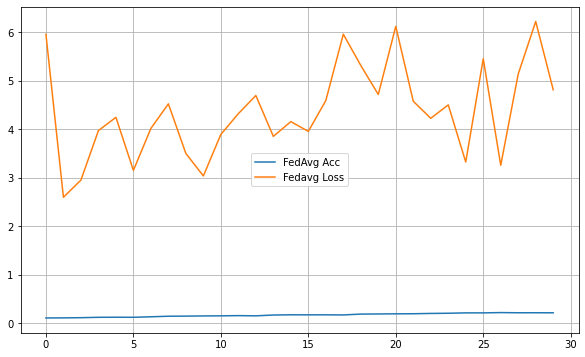

In [7]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

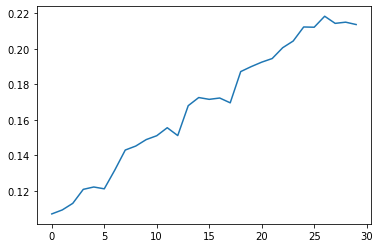

In [8]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [9]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.10707333369387521, 0.10931666708654826, 0.11302555633915795, 0.12089444523056347, 0.12221888908081585, 0.12118888902995321, 0.1317088885439767, 0.1430055556197961, 0.145252222319444, 0.1488977782428265, 0.15106111077798737, 0.15556222250064214, 0.15114888954493735, 0.16796666607260705, 0.17254222267203864, 0.17152666673064232, 0.17227444508009485, 0.16956555553608468, 0.18714333375295, 0.18993777823117042, 0.19244444419940313, 0.19448666696747144, 0.20056888932983083, 0.20433555593093233, 0.21223888960149553, 0.21209555558032459, 0.21827666701542006, 0.21426888795362578, 0.214943333549632, 0.21360555531250106] 

[5.952207581202189, 2.5951815525690716, 2.9493410295910305, 3.9690143558714124, 4.242965001530117, 3.14888801044888, 4.01372763050927, 4.520096445083618, 3.49743320412106, 3.034485128190782, 3.890949765841166, 4.318008250660366, 4.692478617032369, 3.85008254316118, 4.154106497764587, 3.9533411158455736, 4.58798037370046, 5.956539248095619, 5.3110880851745605, 4.7133887198236

# Our algorithm

In [10]:
acc0 = [[], [0.14959999918937683, 0.10019999742507935, 0.15600000321865082, 0.10260000079870224, 0.10029999911785126, 0.15690000355243683, 0.09860000014305115, 0.16619999706745148, 0.10339999943971634, 0.10090000182390213, 0.1371999979019165, 0.1362999975681305, 0.10000000149011612, 0.1851000040769577, 0.19609999656677246, 0.10459999740123749, 0.164900004863739, 0.1525000035762787, 0.10499999672174454, 0.1152999997138977, 0.12600000202655792, 0.15850000083446503, 0.15850000083446503, 0.20190000534057617, 0.15449999272823334, 0.13770000636577606, 0.10329999774694443, 0.10000000149011612, 0.10090000182390213, 0.1680999994277954], [0.1354999989271164, 0.1695999950170517, 0.1023000031709671, 0.18960000574588776, 0.11400000005960464, 0.11180000007152557, 0.14059999585151672, 0.1054999977350235, 0.19089999794960022, 0.16590000689029694, 0.15150000154972076, 0.1266999989748001, 0.2190999984741211, 0.22370000183582306, 0.10090000182390213, 0.14640000462532043, 0.17030000686645508, 0.1745000034570694, 0.10400000214576721, 0.11089999973773956, 0.13899999856948853, 0.16439999639987946, 0.1306000053882599, 0.1096000000834465, 0.1712999939918518, 0.13609999418258667, 0.10899999737739563, 0.17839999496936798, 0.18799999356269836, 0.14229999482631683], [0.16089999675750732, 0.18940000236034393, 0.19760000705718994, 0.19979999959468842, 0.17139999568462372, 0.19550000131130219, 0.13940000534057617, 0.14489999413490295, 0.14059999585151672, 0.14249999821186066, 0.1679999977350235, 0.10010000318288803, 0.1542000025510788, 0.1906999945640564, 0.15870000422000885, 0.10029999911785126, 0.156700000166893, 0.13600000739097595, 0.17010000348091125, 0.1736000031232834, 0.15479999780654907, 0.20739999413490295, 0.15870000422000885, 0.2240000069141388, 0.18209999799728394, 0.13819999992847443, 0.13529999554157257, 0.15850000083446503, 0.11060000211000443, 0.17260000109672546], [0.11460000276565552, 0.18019999563694, 0.23579999804496765, 0.2289000004529953, 0.17630000412464142, 0.18649999797344208, 0.24410000443458557, 0.21709999442100525, 0.17599999904632568, 0.19339999556541443, 0.2563999891281128, 0.17219999432563782, 0.14419999718666077, 0.2554999887943268, 0.19370000064373016, 0.22439999878406525, 0.16869999468326569, 0.17640000581741333, 0.1932000070810318, 0.24050000309944153, 0.20909999310970306, 0.20890000462532043, 0.2328999936580658, 0.18850000202655792, 0.1834000051021576, 0.18129999935626984, 0.1834000051021576, 0.1941000074148178, 0.14270000159740448, 0.20829999446868896], [0.21979999542236328, 0.25940001010894775, 0.22269999980926514, 0.13050000369548798, 0.24050000309944153, 0.1615000069141388, 0.1931000053882599, 0.1800999939441681, 0.21480000019073486, 0.22290000319480896, 0.2011999934911728, 0.24320000410079956, 0.17649999260902405, 0.2087000012397766, 0.21230000257492065, 0.21649999916553497, 0.19609999656677246, 0.16920000314712524, 0.23759999871253967, 0.1842000037431717, 0.20569999516010284, 0.1720000058412552, 0.22930000722408295, 0.16910000145435333, 0.2304999977350235, 0.24889999628067017, 0.21899999678134918, 0.1818999946117401, 0.20739999413490295, 0.23720000684261322], [0.2556999921798706, 0.14090000092983246, 0.2597000002861023, 0.22709999978542328, 0.2290000021457672, 0.17149999737739563, 0.266400009393692, 0.25859999656677246, 0.16609999537467957, 0.188400000333786, 0.14839999377727509, 0.1949000060558319, 0.2393999993801117, 0.2702000141143799, 0.259799987077713, 0.3116999864578247, 0.26260000467300415, 0.314300000667572, 0.19750000536441803, 0.23240000009536743, 0.2597000002861023, 0.28679999709129333, 0.22990000247955322, 0.25440001487731934, 0.2370000034570694, 0.2321999967098236, 0.23569999635219574, 0.2782000005245209, 0.2678999900817871, 0.2079000025987625], [0.22439999878406525, 0.24279999732971191, 0.24799999594688416, 0.18330000340938568, 0.28119999170303345, 0.2273000031709671, 0.1746000051498413, 0.2248000055551529, 0.2578999996185303, 0.2354000061750412, 0.2694999873638153, 0.17399999499320984, 0.2775999903678894, 0.3228999972343445, 0.2619999945163727, 0.2605000138282776, 0.25540000200271606, 0.25380000472068787, 0.2418999969959259, 0.2614000141620636, 0.23749999701976776, 0.2750000059604645, 0.24699999392032623, 0.2736000120639801, 0.2151000052690506, 0.2037000060081482, 0.2433999925851822, 0.23389999568462372, 0.23119999468326569, 0.24310000240802765], [0.28360000252723694, 0.19900000095367432, 0.15870000422000885, 0.2858999967575073, 0.28049999475479126, 0.2395000010728836, 0.26499998569488525, 0.28630000352859497, 0.249099999666214, 0.2549000084400177, 0.2337000072002411, 0.23960000276565552, 0.23810000717639923, 0.25609999895095825, 0.218299999833107, 0.273499995470047, 0.24580000340938568, 0.23989999294281006, 0.2775000035762787, 0.28130000829696655, 0.21439999341964722, 0.18529999256134033, 0.26260000467300415, 0.2540000081062317, 0.21160000562667847, 0.2565999925136566, 0.2484000027179718, 0.23260000348091125, 0.24330000579357147, 0.2353000044822693], [0.2996000051498413, 0.23109999299049377, 0.23160000145435333, 0.2718000113964081, 0.257099986076355, 0.2743000090122223, 0.25040000677108765, 0.28999999165534973, 0.262800008058548, 0.288100004196167, 0.28139999508857727, 0.24269999563694, 0.3091999888420105, 0.2944999933242798, 0.25920000672340393, 0.2475000023841858, 0.3174000084400177, 0.19930000603199005, 0.2752000093460083, 0.22419999539852142, 0.24070000648498535, 0.20810000598430634, 0.29190000891685486, 0.20280000567436218, 0.20800000429153442, 0.2913999855518341, 0.2493000030517578, 0.2493000030517578, 0.21289999783039093, 0.275299996137619], [0.28529998660087585, 0.18930000066757202, 0.29750001430511475, 0.3066999912261963, 0.2667999863624573, 0.2897999882698059, 0.28349998593330383, 0.25929999351501465, 0.24819999933242798, 0.25609999895095825, 0.24799999594688416, 0.19220000505447388, 0.26989999413490295, 0.25589999556541443, 0.3003000020980835, 0.2980000078678131, 0.225600004196167, 0.1941000074148178, 0.2612999975681305, 0.3059999942779541, 0.20800000429153442, 0.2639999985694885, 0.2223999947309494, 0.22290000319480896, 0.26969999074935913, 0.26080000400543213, 0.28940001130104065, 0.2883000075817108, 0.27900001406669617, 0.32190001010894775], [0.29260000586509705, 0.30079999566078186, 0.2761000096797943, 0.2996000051498413, 0.21369999647140503, 0.2833999991416931, 0.2732999920845032, 0.22210000455379486, 0.30160000920295715, 0.2858999967575073, 0.28439998626708984, 0.2824000120162964, 0.2393999993801117, 0.20360000431537628, 0.2888000011444092, 0.29100000858306885, 0.272599995136261, 0.25130000710487366, 0.27390000224113464, 0.28200000524520874, 0.30649998784065247, 0.2224999964237213, 0.27649998664855957, 0.29490000009536743, 0.29089999198913574, 0.2467000037431717, 0.2808000147342682, 0.24549999833106995, 0.2619999945163727, 0.20600000023841858], [0.26170000433921814, 0.23499999940395355, 0.259799987077713, 0.3111000061035156, 0.30309998989105225, 0.24789999425411224, 0.29030001163482666, 0.23659999668598175, 0.2506999969482422, 0.2928999960422516, 0.23770000040531158, 0.2732999920845032, 0.22300000488758087, 0.24079999327659607, 0.2881999909877777, 0.2451000064611435, 0.28690001368522644, 0.2578999996185303, 0.24770000576972961, 0.3280999958515167, 0.2705000042915344, 0.27239999175071716, 0.3179999887943268, 0.21490000188350677, 0.267300009727478, 0.24889999628067017, 0.3109000027179718, 0.31189998984336853, 0.18649999797344208, 0.2806999981403351], [0.2863999903202057, 0.262800008058548, 0.23680000007152557, 0.27000001072883606, 0.3151000142097473, 0.3165999948978424, 0.3109999895095825, 0.2587999999523163, 0.3086000084877014, 0.3172999918460846, 0.31360000371932983, 0.28940001130104065, 0.3133000135421753, 0.266400009393692, 0.28999999165534973, 0.2687000036239624, 0.3034000098705292, 0.2944999933242798, 0.25999999046325684, 0.2777999937534332, 0.3052999973297119, 0.32899999618530273, 0.27070000767707825, 0.28529998660087585, 0.31299999356269836, 0.3111000061035156, 0.2809999883174896, 0.25029999017715454, 0.2694000005722046, 0.22110000252723694], [0.27730000019073486, 0.20649999380111694, 0.25119999051094055, 0.28189998865127563, 0.2847999930381775, 0.2849999964237213, 0.311599999666214, 0.24889999628067017, 0.24789999425411224, 0.23929999768733978, 0.2619999945163727, 0.2840999960899353, 0.2939000129699707, 0.26339998841285706, 0.2563999891281128, 0.30320000648498535, 0.30799999833106995, 0.31349998712539673, 0.31709998846054077, 0.30070000886917114, 0.288100004196167, 0.3384000062942505, 0.2872999906539917, 0.29809999465942383, 0.3237999975681305, 0.2939999997615814, 0.3068000078201294, 0.29829999804496765, 0.3034999966621399, 0.33000001311302185], [0.31349998712539673, 0.25220000743865967, 0.2685000002384186, 0.26330000162124634, 0.30809998512268066, 0.27059999108314514, 0.32679998874664307, 0.30820000171661377, 0.2915000021457672, 0.2994000017642975, 0.25040000677108765, 0.30570000410079956, 0.33379998803138733, 0.358599990606308, 0.3407999873161316, 0.29679998755455017, 0.3296000063419342, 0.27070000767707825, 0.28949999809265137, 0.3181999921798706, 0.2515000104904175, 0.29670000076293945, 0.30640000104904175, 0.26190000772476196, 0.2831000089645386, 0.30309998989105225, 0.3061000108718872, 0.2549999952316284, 0.27090001106262207, 0.3138999938964844], [0.24819999933242798, 0.32350000739097595, 0.28189998865127563, 0.27090001106262207, 0.3271999955177307, 0.3409000039100647, 0.31520000100135803, 0.298799991607666, 0.3181999921798706, 0.3089999854564667, 0.26350000500679016, 0.28700000047683716, 0.33160001039505005, 0.28790000081062317, 0.30250000953674316, 0.302700012922287, 0.30559998750686646, 0.3084999918937683, 0.2757999897003174, 0.24940000474452972, 0.30889999866485596, 0.2978000044822693, 0.20839999616146088, 0.2985000014305115, 0.2565999925136566, 0.28540000319480896, 0.29899999499320984, 0.2766000032424927, 0.2964000105857849, 0.29350000619888306], [0.3100999891757965, 0.2565999925136566, 0.33489999175071716, 0.2824999988079071, 0.29010000824928284, 0.3230000138282776, 0.2948000133037567, 0.26489999890327454, 0.30660000443458557, 0.32690000534057617, 0.30239999294281006, 0.30410000681877136, 0.28679999709129333, 0.2971999943256378, 0.2827000021934509, 0.24660000205039978, 0.32820001244544983, 0.2639000117778778, 0.28850001096725464, 0.29030001163482666, 0.2676999866962433, 0.2808000147342682, 0.2939000129699707, 0.30660000443458557, 0.3109000027179718, 0.3043000102043152, 0.30979999899864197, 0.33570000529289246, 0.3352000117301941, 0.31299999356269836], [0.28839999437332153, 0.3034999966621399, 0.33869999647140503, 0.2815000116825104, 0.3257000148296356, 0.32409998774528503, 0.3052000105381012, 0.3034000098705292, 0.3001999855041504, 0.24250000715255737, 0.3068999946117401, 0.304500013589859, 0.33160001039505005, 0.3125999867916107, 0.31839999556541443, 0.31929999589920044, 0.2705000042915344, 0.2565999925136566, 0.3050999939441681, 0.2935999929904938, 0.2777000069618225, 0.3158999979496002, 0.34459999203681946, 0.27379998564720154, 0.3264999985694885, 0.28700000047683716, 0.27810001373291016, 0.3222000002861023, 0.3294999897480011, 0.2669999897480011], [0.3199999928474426, 0.2996000051498413, 0.321399986743927, 0.2937999963760376, 0.31130000948905945, 0.22100000083446503, 0.32519999146461487, 0.3319000005722046, 0.33000001311302185, 0.3391999900341034, 0.3334999978542328, 0.24230000376701355, 0.2842999994754791, 0.31310001015663147, 0.34060001373291016, 0.29409998655319214, 0.2240999937057495, 0.3273000121116638, 0.27160000801086426, 0.2930999994277954, 0.28369998931884766, 0.2881999909877777, 0.32120001316070557, 0.28459998965263367, 0.34459999203681946, 0.3334999978542328, 0.3370000123977661, 0.322299987077713, 0.2590000033378601, 0.2833000123500824], [0.2815000116825104, 0.34299999475479126, 0.3361999988555908, 0.3357999920845032, 0.3296999931335449, 0.3224000036716461, 0.23420000076293945, 0.36399999260902405, 0.26820001006126404, 0.349700003862381, 0.2597000002861023, 0.28769999742507935, 0.2741999924182892, 0.2921000123023987, 0.2513999938964844, 0.2825999855995178, 0.34709998965263367, 0.3208000063896179, 0.3472999930381775, 0.26660001277923584, 0.321399986743927, 0.350600004196167, 0.31139999628067017, 0.32659998536109924, 0.34150001406669617, 0.34869998693466187, 0.2888999879360199, 0.3409000039100647, 0.27390000224113464, 0.34790000319480896], [0.31779998540878296, 0.33149999380111694, 0.2791999876499176, 0.3124000132083893, 0.28220000863075256, 0.2964000105857849, 0.30059999227523804, 0.271699994802475, 0.32109999656677246, 0.257999986410141, 0.2953000068664551, 0.34459999203681946, 0.2606000006198883, 0.3037000000476837, 0.2989000082015991, 0.3018999993801117, 0.35600000619888306, 0.31290000677108765, 0.3098999857902527, 0.25130000710487366, 0.29319998621940613, 0.3334999978542328, 0.27459999918937683, 0.2703000009059906, 0.2944999933242798, 0.3370000123977661, 0.28290000557899475, 0.33889999985694885, 0.3334999978542328, 0.299699991941452], [0.3546000123023987, 0.3156000077724457, 0.30709999799728394, 0.3400999903678894, 0.31679999828338623, 0.26350000500679016, 0.2890999913215637, 0.3596000075340271, 0.3580000102519989, 0.3005000054836273, 0.303600013256073, 0.2678999900817871, 0.23980000615119934, 0.29319998621940613, 0.2955999970436096, 0.3165999948978424, 0.34209999442100525, 0.2921000123023987, 0.3061000108718872, 0.3222000002861023, 0.29120001196861267, 0.3003999888896942, 0.34130001068115234, 0.32749998569488525, 0.325300008058548, 0.2468000054359436, 0.36579999327659607, 0.3634999990463257, 0.30320000648498535, 0.3131999969482422], [0.3513999879360199, 0.31929999589920044, 0.3531999886035919, 0.27549999952316284, 0.33959999680519104, 0.3292999863624573, 0.2547999918460846, 0.3154999911785126, 0.3244999945163727, 0.349700003862381, 0.27709999680519104, 0.3043999969959259, 0.3400000035762787, 0.3172999918460846, 0.30959999561309814, 0.27489998936653137, 0.31279999017715454, 0.30480000376701355, 0.3066999912261963, 0.34850001335144043, 0.30309998989105225, 0.3224000036716461, 0.3458999991416931, 0.3142000138759613, 0.3422999978065491, 0.3594000041484833, 0.25279998779296875, 0.27570000290870667, 0.30059999227523804, 0.34869998693466187], [0.3025999963283539, 0.30730000138282776, 0.3089999854564667, 0.303600013256073, 0.3158999979496002, 0.305400013923645, 0.31279999017715454, 0.3765999972820282, 0.3723999857902527, 0.29089999198913574, 0.33709999918937683, 0.2784999907016754, 0.30059999227523804, 0.3165000081062317, 0.320499986410141, 0.3149000108242035, 0.33570000529289246, 0.3391000032424927, 0.3359000086784363, 0.34389999508857727, 0.3138999938964844, 0.34869998693466187, 0.3262999951839447, 0.3172999918460846, 0.2451000064611435, 0.3109999895095825, 0.33629998564720154, 0.3188999891281128, 0.33730000257492065, 0.34060001373291016], [0.350600004196167, 0.22669999301433563, 0.36890000104904175, 0.35899999737739563, 0.3197000026702881, 0.328900009393692, 0.25459998846054077, 0.335999995470047, 0.287200003862381, 0.3531999886035919, 0.33570000529289246, 0.33340001106262207, 0.3303000032901764, 0.31029999256134033, 0.30300000309944153, 0.40779998898506165, 0.33489999175071716, 0.3625999987125397, 0.28299999237060547, 0.28139999508857727, 0.33649998903274536, 0.3009999990463257, 0.3052999973297119, 0.30970001220703125, 0.33309999108314514, 0.33550000190734863, 0.3425000011920929, 0.2825999855995178, 0.311599999666214, 0.3691999912261963], [0.328900009393692, 0.3262999951839447, 0.35179999470710754, 0.32199999690055847, 0.3903999924659729, 0.32519999146461487, 0.2944999933242798, 0.3619000017642975, 0.32280001044273376, 0.28630000352859497, 0.2946000099182129, 0.2800000011920929, 0.2937999963760376, 0.30219998955726624, 0.3702000081539154, 0.325300008058548, 0.35109999775886536, 0.26109999418258667, 0.3431999981403351, 0.32739999890327454, 0.33000001311302185, 0.26579999923706055, 0.3601999878883362, 0.32919999957084656, 0.322299987077713, 0.2596000134944916, 0.33730000257492065, 0.26330000162124634, 0.3264000117778778, 0.328000009059906], [0.34139999747276306, 0.35679998993873596, 0.3529999852180481, 0.2827000021934509, 0.27880001068115234, 0.30880001187324524, 0.2937999963760376, 0.31690001487731934, 0.3319999873638153, 0.35199999809265137, 0.267300009727478, 0.357699990272522, 0.29899999499320984, 0.335099995136261, 0.3325999975204468, 0.26339998841285706, 0.35510000586509705, 0.3504999876022339, 0.323199987411499, 0.3149999976158142, 0.3537999987602234, 0.3131999969482422, 0.35089999437332153, 0.31869998574256897, 0.3091000020503998, 0.29120001196861267, 0.35089999437332153, 0.34950000047683716, 0.376800000667572, 0.3343000113964081], [0.36570000648498535, 0.32899999618530273, 0.36550000309944153, 0.2924000024795532, 0.2775000035762787, 0.33959999680519104, 0.3000999987125397, 0.3280999958515167, 0.3192000091075897, 0.28949999809265137, 0.33559998869895935, 0.3499000072479248, 0.25589999556541443, 0.32820001244544983, 0.33570000529289246, 0.37529999017715454, 0.3239000141620636, 0.34619998931884766, 0.35190001130104065, 0.260699987411499, 0.35510000586509705, 0.3305000066757202, 0.3544999957084656, 0.33739998936653137, 0.35749998688697815, 0.3709000051021576, 0.3431999981403351, 0.35440000891685486, 0.3416999876499176, 0.35359999537467957], [0.2971000075340271, 0.30469998717308044, 0.3260999917984009, 0.3147999942302704, 0.3172000050544739, 0.33309999108314514, 0.336899995803833, 0.35100001096725464, 0.32839998602867126, 0.29510000348091125, 0.37630000710487366, 0.34139999747276306, 0.353300005197525, 0.2888000011444092, 0.336899995803833, 0.3409999907016754, 0.37700000405311584, 0.27810001373291016, 0.32420000433921814, 0.2637999951839447, 0.3434999883174896, 0.30640000104904175, 0.30959999561309814, 0.31369999051094055, 0.34119999408721924, 0.335999995470047, 0.296099990606308, 0.3483999967575073, 0.3741999864578247, 0.35679998993873596], [0.32850000262260437, 0.2621000111103058, 0.25699999928474426, 0.2782000005245209, 0.3359000086784363, 0.3783999979496002, 0.3571999967098236, 0.3467000126838684, 0.3472999930381775, 0.30379998683929443, 0.35199999809265137, 0.3416000008583069, 0.364300012588501, 0.36500000953674316, 0.38510000705718994, 0.3531999886035919, 0.3443000018596649, 0.33410000801086426, 0.365200012922287, 0.3188000023365021, 0.3400999903678894, 0.21449999511241913, 0.37310001254081726, 0.31679999828338623, 0.3206000030040741, 0.3395000100135803, 0.3483999967575073, 0.3208000063896179, 0.329800009727478, 0.30979999899864197]]
loss0 = [[], [2.2549333572387695, 3.0397543907165527, 2.3638954162597656, 2.3621397018432617, 2.3498194217681885, 2.466825485229492, 3.532133102416992, 2.3795485496520996, 2.615743398666382, 2.408540725708008, 2.3254876136779785, 2.2226643562316895, 2.5683250427246094, 2.2685205936431885, 2.2332794666290283, 2.5256619453430176, 2.3636136054992676, 2.300973892211914, 2.3330342769622803, 2.420529365539551, 2.4835193157196045, 2.6574835777282715, 2.2580647468566895, 2.235708475112915, 2.549426555633545, 2.388061761856079, 2.380464553833008, 2.603651285171509, 2.3429934978485107, 2.8494937419891357], [2.345066785812378, 2.6672098636627197, 2.8529388904571533, 2.232276678085327, 2.531602382659912, 2.283900260925293, 2.4464852809906006, 3.4426815509796143, 2.4273791313171387, 2.3644964694976807, 2.774510145187378, 3.560750722885132, 2.2773022651672363, 2.2327680587768555, 2.262986421585083, 2.544151782989502, 2.305708646774292, 2.3830931186676025, 3.0512728691101074, 2.399811267852783, 2.3452467918395996, 2.369370460510254, 2.360018730163574, 4.372837066650391, 2.575965404510498, 2.3843653202056885, 3.6704084873199463, 2.5362257957458496, 2.4476561546325684, 2.368988275527954], [3.249133586883545, 2.6558594703674316, 2.1830008029937744, 2.2986903190612793, 2.6842050552368164, 2.249685049057007, 2.7869491577148438, 2.3284995555877686, 2.382516384124756, 2.5299649238586426, 2.241485834121704, 2.552170991897583, 2.340562582015991, 2.268350839614868, 2.535755157470703, 2.599072217941284, 2.361690044403076, 2.9264752864837646, 2.249490737915039, 2.3415260314941406, 2.2532989978790283, 2.4973649978637695, 2.538784980773926, 2.358095407485962, 2.4165725708007812, 2.266385316848755, 2.5272223949432373, 2.6883556842803955, 2.352152109146118, 2.2894582748413086], [2.4843082427978516, 2.4060420989990234, 2.3729519844055176, 2.5585217475891113, 2.4322385787963867, 2.4222192764282227, 2.210071086883545, 2.244680404663086, 3.043471574783325, 2.421644687652588, 2.4873199462890625, 2.6993541717529297, 2.7695846557617188, 2.2620575428009033, 2.6938531398773193, 2.4202160835266113, 2.266192674636841, 2.970487356185913, 2.5353846549987793, 2.271028518676758, 2.6535818576812744, 2.8925654888153076, 2.3582327365875244, 2.4983911514282227, 2.890038013458252, 2.489612102508545, 2.57535719871521, 2.3043930530548096, 2.7549009323120117, 2.38348388671875], [2.235384464263916, 2.0923941135406494, 2.1451680660247803, 2.414445638656616, 2.2219181060791016, 2.24290132522583, 2.3458943367004395, 2.3000385761260986, 2.6879050731658936, 2.450946092605591, 2.4182510375976562, 2.1863391399383545, 2.855191707611084, 2.1414971351623535, 2.540903091430664, 2.1614131927490234, 2.1956098079681396, 2.5172815322875977, 2.072326898574829, 2.8864247798919678, 2.4368174076080322, 2.342695713043213, 2.286470651626587, 2.6683084964752197, 2.1339828968048096, 3.000230073928833, 2.139266014099121, 2.784956216812134, 2.7072036266326904, 2.1501264572143555], [2.736741304397583, 3.1651055812835693, 2.389089345932007, 2.4720511436462402, 2.719815969467163, 2.8477509021759033, 2.209135055541992, 2.325089693069458, 2.5478787422180176, 2.5973100662231445, 2.7739672660827637, 2.8603358268737793, 2.613288640975952, 2.8820102214813232, 2.4596707820892334, 2.2580225467681885, 2.6261813640594482, 2.076580047607422, 3.4237210750579834, 3.0311896800994873, 2.538095712661743, 2.5639119148254395, 2.47644305229187, 2.7248172760009766, 2.4321131706237793, 2.874183416366577, 2.2567949295043945, 2.321038007736206, 2.2937748432159424, 2.644909143447876], [2.291398048400879, 2.263824462890625, 2.3499913215637207, 2.305176019668579, 2.3810842037200928, 2.577714443206787, 2.6453769207000732, 2.5380923748016357, 2.1855342388153076, 2.1315670013427734, 2.1747100353240967, 2.1605985164642334, 2.2798855304718018, 2.0512657165527344, 2.450721025466919, 2.072854995727539, 2.280255079269409, 2.1131279468536377, 2.1276895999908447, 2.4267547130584717, 2.303821086883545, 2.451491594314575, 2.794102430343628, 2.1808414459228516, 2.486164093017578, 2.702253580093384, 2.629789113998413, 2.1268575191497803, 2.418178081512451, 2.485316276550293], [2.3311221599578857, 2.4055428504943848, 3.735443353652954, 2.4867770671844482, 2.2528233528137207, 2.340926170349121, 2.5084950923919678, 2.387376308441162, 4.067225456237793, 2.34135103225708, 2.3305625915527344, 3.2516629695892334, 2.5290706157684326, 2.631953716278076, 2.6506881713867188, 2.354621171951294, 2.826385259628296, 2.4227137565612793, 2.390347957611084, 2.495604991912842, 3.50681209564209, 3.144421100616455, 3.0020639896392822, 2.6783835887908936, 3.3096683025360107, 2.8972227573394775, 2.9644389152526855, 3.0931005477905273, 2.5068938732147217, 2.8307063579559326], [2.4090592861175537, 2.680682420730591, 2.5626585483551025, 2.1567490100860596, 2.5012269020080566, 2.4118340015411377, 2.3962948322296143, 2.171213150024414, 2.6112253665924072, 2.5869593620300293, 3.131615161895752, 2.9216976165771484, 2.641597270965576, 2.1920626163482666, 2.1199631690979004, 2.2203710079193115, 2.092407464981079, 2.9063518047332764, 2.282489538192749, 2.548288583755493, 2.542144536972046, 2.678251028060913, 2.0385947227478027, 3.164302349090576, 2.789186954498291, 2.1164088249206543, 2.3478035926818848, 2.6085381507873535, 2.405729055404663, 2.249164342880249], [2.769779920578003, 3.245702028274536, 2.8191213607788086, 2.89534592628479, 3.754962205886841, 2.6346359252929688, 2.284317970275879, 2.364274501800537, 3.116974115371704, 2.585712194442749, 3.6412110328674316, 4.548323154449463, 2.2448086738586426, 2.8787953853607178, 2.6568105220794678, 2.4216010570526123, 2.5613951683044434, 3.4718449115753174, 2.416252613067627, 2.7144618034362793, 3.604382038116455, 2.4475085735321045, 3.069155693054199, 3.453291416168213, 2.3808908462524414, 2.9654505252838135, 2.8129727840423584, 2.7826170921325684, 2.891991138458252, 2.4034688472747803], [2.4767491817474365, 2.477771043777466, 2.2389514446258545, 2.7073442935943604, 2.586153507232666, 2.247509717941284, 2.9085381031036377, 3.024463176727295, 2.6646339893341064, 2.8214871883392334, 2.799589157104492, 2.1532528400421143, 3.2978785037994385, 2.4653337001800537, 2.409733295440674, 2.1821813583374023, 2.6472389698028564, 3.22778058052063, 2.5364415645599365, 2.4867660999298096, 2.5166852474212646, 2.451021194458008, 2.6941418647766113, 2.256504774093628, 2.3008995056152344, 2.48425555229187, 2.935713291168213, 2.996499538421631, 2.2356173992156982, 2.605574131011963], [2.8280391693115234, 3.5566887855529785, 3.4104089736938477, 2.846698522567749, 2.5625953674316406, 2.4757118225097656, 2.4615492820739746, 3.2084779739379883, 2.551406145095825, 2.2005631923675537, 3.049880027770996, 2.518333673477173, 3.610961675643921, 2.634002923965454, 2.89612078666687, 2.8542323112487793, 2.5260655879974365, 3.1050782203674316, 2.8989663124084473, 2.4414281845092773, 2.2704737186431885, 2.8760204315185547, 2.194810390472412, 2.6067986488342285, 2.2001829147338867, 2.288386821746826, 2.574651002883911, 2.6329782009124756, 3.220893144607544, 3.208770990371704], [2.511312961578369, 2.75179386138916, 3.127861261367798, 2.7361960411071777, 2.208820343017578, 2.4648303985595703, 3.4374585151672363, 3.5935683250427246, 2.765354871749878, 3.111398458480835, 2.8594913482666016, 2.3666892051696777, 4.1180291175842285, 3.4882633686065674, 2.4153385162353516, 2.7632312774658203, 3.134272336959839, 2.99843430519104, 3.6771769523620605, 2.778902053833008, 3.4411914348602295, 2.3067729473114014, 3.2421698570251465, 2.7295947074890137, 2.5286738872528076, 2.5807011127471924, 2.5394585132598877, 3.1119163036346436, 3.2245144844055176, 2.7284934520721436], [3.658460855484009, 3.977231979370117, 2.5901553630828857, 2.3612422943115234, 2.524721384048462, 2.986166477203369, 2.3750226497650146, 2.5003387928009033, 2.9913105964660645, 3.1048028469085693, 2.4844343662261963, 3.3765454292297363, 2.3089702129364014, 2.574788808822632, 2.4598608016967773, 2.3574633598327637, 2.539625883102417, 2.443619728088379, 2.5136022567749023, 2.9640212059020996, 2.738616943359375, 2.36734676361084, 2.8089139461517334, 2.5285844802856445, 2.8266055583953857, 2.444856882095337, 3.196660280227661, 3.578859806060791, 2.6101739406585693, 2.15281081199646], [2.9324698448181152, 3.2727391719818115, 3.2309067249298096, 3.3543894290924072, 2.7219667434692383, 2.622006416320801, 3.232877254486084, 2.8097569942474365, 2.7415220737457275, 3.2592616081237793, 3.1724860668182373, 3.724100351333618, 3.0443339347839355, 2.638507843017578, 2.449413537979126, 3.2908272743225098, 2.7003612518310547, 2.5648446083068848, 2.892496109008789, 2.2997474670410156, 3.8000028133392334, 2.567495346069336, 3.1892142295837402, 2.6579980850219727, 3.1844899654388428, 2.7088778018951416, 2.928561210632324, 2.8312833309173584, 3.366719961166382, 3.1011765003204346], [3.0401065349578857, 2.2782986164093018, 4.029074192047119, 2.452747106552124, 2.3570666313171387, 2.000655174255371, 2.556166648864746, 2.5694196224212646, 2.344576120376587, 3.115830898284912, 4.063981533050537, 2.7907629013061523, 3.097625494003296, 2.2515549659729004, 2.942162036895752, 3.654115676879883, 2.7282865047454834, 2.4476895332336426, 2.6601648330688477, 2.755155086517334, 2.307448148727417, 2.3252828121185303, 4.438605308532715, 3.253655195236206, 2.8892247676849365, 3.7402350902557373, 2.189194917678833, 2.4674036502838135, 2.48054575920105, 2.924741506576538], [2.7766361236572266, 2.7694408893585205, 3.2311060428619385, 2.942279100418091, 3.781562089920044, 2.9162840843200684, 2.7149853706359863, 3.0166096687316895, 2.8521881103515625, 3.011779546737671, 3.4730703830718994, 2.6290016174316406, 3.2935469150543213, 2.8610970973968506, 3.1770012378692627, 3.681417226791382, 2.1655428409576416, 2.524229049682617, 2.7060062885284424, 2.8963329792022705, 3.902592182159424, 2.6469533443450928, 3.0375053882598877, 2.5197176933288574, 3.2611188888549805, 2.590505361557007, 3.0760018825531006, 2.646739959716797, 2.9261081218719482, 2.963322639465332], [2.8570022583007812, 2.820220708847046, 2.51832914352417, 3.5293924808502197, 2.3980295658111572, 3.057602643966675, 2.5304317474365234, 2.9273734092712402, 2.3701140880584717, 5.006436824798584, 2.3485052585601807, 2.9003310203552246, 2.8312618732452393, 3.212534189224243, 2.6443684101104736, 2.636263608932495, 3.3058881759643555, 3.416541337966919, 2.929732084274292, 2.9772605895996094, 3.4289121627807617, 2.9268133640289307, 2.582914352416992, 3.3215067386627197, 2.5325639247894287, 2.974231004714966, 3.446432113647461, 2.346176862716675, 2.350316047668457, 2.457949161529541], [2.216336250305176, 2.6106278896331787, 2.6617841720581055, 2.634718418121338, 3.1699929237365723, 5.133208751678467, 2.475217342376709, 2.1886746883392334, 2.727659225463867, 2.8815810680389404, 2.3080098628997803, 3.671872615814209, 2.8479931354522705, 2.8082096576690674, 2.3840548992156982, 2.8532731533050537, 3.408426284790039, 3.344757318496704, 3.8171050548553467, 3.3881914615631104, 3.7310147285461426, 3.905564785003662, 3.8039183616638184, 2.7025351524353027, 2.9118411540985107, 2.783104658126831, 2.6858999729156494, 2.8910765647888184, 3.326882839202881, 3.104570150375366], [3.001903533935547, 2.5918049812316895, 2.4598052501678467, 2.2208614349365234, 2.626284122467041, 2.770756244659424, 3.907571792602539, 2.183363914489746, 2.970852851867676, 2.5264251232147217, 3.8643035888671875, 2.827623128890991, 2.992192268371582, 2.435892105102539, 3.6131012439727783, 3.064755439758301, 2.4211246967315674, 2.170576572418213, 3.1248013973236084, 3.7013370990753174, 3.0696094036102295, 2.6038947105407715, 2.997699499130249, 2.5867788791656494, 2.8441593647003174, 2.7146434783935547, 3.1529133319854736, 2.828944444656372, 3.329913377761841, 2.662754774093628], [3.039546012878418, 2.9972305297851562, 3.037519931793213, 2.595767021179199, 3.373311996459961, 2.5141799449920654, 3.4173080921173096, 2.339381694793701, 2.343122959136963, 4.067183017730713, 3.1546437740325928, 2.7771122455596924, 4.633976936340332, 3.69179105758667, 2.9954895973205566, 3.158297061920166, 2.360116958618164, 2.678776264190674, 2.7599270343780518, 4.630103588104248, 2.70546555519104, 2.2423648834228516, 3.019106864929199, 2.5585498809814453, 3.530947208404541, 2.461998224258423, 3.3218460083007812, 3.085721731185913, 2.4536750316619873, 2.497765302658081], [2.3447418212890625, 2.595937967300415, 3.1737680435180664, 2.4853217601776123, 2.757294178009033, 3.7782413959503174, 3.318690538406372, 2.6412205696105957, 2.8456385135650635, 2.7580783367156982, 3.862037181854248, 3.3015308380126953, 3.536808490753174, 2.7276771068573, 3.503829002380371, 2.7257699966430664, 2.524557113647461, 2.431223154067993, 2.983736038208008, 2.951568603515625, 3.0912842750549316, 2.920088768005371, 2.547001838684082, 3.2608957290649414, 2.922337770462036, 3.654308557510376, 2.50730037689209, 2.50402569770813, 3.4186148643493652, 2.532303810119629], [2.8132681846618652, 2.4494760036468506, 2.579108476638794, 3.6416780948638916, 2.539696216583252, 2.1456334590911865, 4.028293132781982, 2.4770963191986084, 2.824469804763794, 2.589364767074585, 2.8972830772399902, 3.7820699214935303, 2.242403268814087, 2.5925142765045166, 3.1806552410125732, 2.864485263824463, 2.6600329875946045, 3.0525426864624023, 3.319812059402466, 2.780688762664795, 2.4988744258880615, 2.8085744380950928, 2.684849977493286, 2.8370747566223145, 3.0141429901123047, 2.783815622329712, 3.1661369800567627, 3.302901268005371, 3.486680507659912, 2.780000686645508], [3.1430399417877197, 3.189195156097412, 3.4041059017181396, 2.437296152114868, 2.3000130653381348, 2.9400224685668945, 3.1770684719085693, 2.356825590133667, 2.642849922180176, 3.6594128608703613, 3.07966947555542, 2.872749090194702, 3.143934965133667, 3.568505048751831, 3.4483182430267334, 2.7689292430877686, 2.3207521438598633, 2.7045083045959473, 3.5832958221435547, 3.165916919708252, 2.451765775680542, 2.211460828781128, 3.895458698272705, 2.686655282974243, 3.2407212257385254, 2.556959867477417, 3.0579710006713867, 2.397580146789551, 2.187086820602417, 2.519270420074463], [2.716463327407837, 3.807450771331787, 2.6100258827209473, 2.2618985176086426, 3.1186585426330566, 3.1230530738830566, 3.782360553741455, 2.935675621032715, 3.0739123821258545, 2.643583297729492, 3.1386406421661377, 2.6745340824127197, 2.4844584465026855, 2.7363336086273193, 2.6926727294921875, 2.3451876640319824, 2.8692471981048584, 2.672112226486206, 3.4316327571868896, 4.204290390014648, 3.6709530353546143, 2.777784585952759, 3.33651065826416, 3.108503818511963, 2.863750696182251, 2.2849764823913574, 2.675365924835205, 3.9624452590942383, 2.579286813735962, 2.762249708175659], [2.4995839595794678, 2.84568452835083, 2.3508856296539307, 2.8318777084350586, 2.5638890266418457, 2.50976824760437, 4.342611789703369, 2.60795521736145, 2.5728776454925537, 2.9191155433654785, 3.391544818878174, 3.1520631313323975, 3.584535598754883, 4.257300853729248, 2.9452362060546875, 2.4417428970336914, 2.3662118911743164, 2.917498826980591, 2.865323543548584, 2.84432315826416, 2.872624397277832, 2.9434566497802734, 2.728550672531128, 3.169663906097412, 2.6418302059173584, 3.542389154434204, 2.8736610412597656, 4.240653038024902, 2.674508571624756, 2.7000174522399902], [5.364362716674805, 2.599342107772827, 2.7462995052337646, 2.9821043014526367, 3.6229913234710693, 3.1415956020355225, 3.120222568511963, 2.9543840885162354, 3.2617602348327637, 2.577294111251831, 3.465625047683716, 2.310344934463501, 2.6004772186279297, 3.238198757171631, 2.6957592964172363, 4.220736503601074, 3.543654680252075, 2.715900421142578, 3.150003433227539, 2.831066131591797, 2.649031639099121, 3.1231415271759033, 2.402289390563965, 3.478576898574829, 3.68035626411438, 4.606712341308594, 3.112699270248413, 2.6257221698760986, 2.8166275024414062, 3.065366744995117], [2.7412309646606445, 2.8790512084960938, 2.589747905731201, 3.1726009845733643, 3.015439987182617, 2.9036872386932373, 4.235703468322754, 2.747954845428467, 3.9587385654449463, 3.1175315380096436, 2.55615496635437, 2.7150213718414307, 3.148469924926758, 3.546849250793457, 3.284148931503296, 2.6140120029449463, 3.5925233364105225, 2.2866339683532715, 2.8369579315185547, 3.386082410812378, 2.9974231719970703, 3.203756093978882, 3.2805213928222656, 2.8990769386291504, 3.2188339233398438, 3.0228118896484375, 2.83369779586792, 2.629011392593384, 2.707158088684082, 2.769404888153076], [2.878185272216797, 3.2716379165649414, 2.574366569519043, 2.9843382835388184, 2.681135654449463, 3.0910730361938477, 3.1694788932800293, 2.9702234268188477, 2.855625629425049, 3.152855396270752, 2.4572482109069824, 3.084815502166748, 2.7628347873687744, 4.1384148597717285, 3.1534345149993896, 3.3209402561187744, 2.400548219680786, 3.001725435256958, 3.19523286819458, 3.276503324508667, 3.013291120529175, 3.0292606353759766, 4.186960697174072, 4.547245979309082, 2.3839590549468994, 3.0335443019866943, 3.767996072769165, 2.5747599601745605, 3.089628219604492, 2.052142858505249], [2.8849127292633057, 3.5413827896118164, 3.45451021194458, 4.061428546905518, 2.7459750175476074, 2.7782764434814453, 2.34047794342041, 3.488041877746582, 2.9323408603668213, 3.488396406173706, 3.5043413639068604, 3.1064507961273193, 2.611128807067871, 2.6835122108459473, 2.8370509147644043, 2.703925132751465, 3.1899094581604004, 3.5554182529449463, 2.840852737426758, 3.961575508117676, 2.6990277767181396, 5.779612064361572, 2.179729461669922, 3.2673704624176025, 3.2444987297058105, 2.9978466033935547, 3.221513032913208, 3.37418794631958, 2.669334888458252, 3.2009944915771484]] 

acc1 = [[], [0.18019999563694, 0.13650000095367432, 0.12020000070333481, 0.1324000060558319, 0.14079999923706055, 0.1088000014424324, 0.2029999941587448, 0.1128000020980835, 0.09549999982118607, 0.10220000147819519, 0.13009999692440033, 0.1696999967098236, 0.11379999667406082, 0.12430000305175781, 0.1177000030875206, 0.10540000349283218, 0.12300000339746475, 0.10019999742507935, 0.19259999692440033, 0.1088000014424324, 0.10010000318288803, 0.13779999315738678, 0.10559999942779541, 0.19599999487400055, 0.1168999969959259, 0.11100000143051147, 0.1477999985218048, 0.10019999742507935, 0.14409999549388885, 0.11559999734163284], [0.23389999568462372, 0.18369999527931213, 0.1598999947309494, 0.210999995470047, 0.1606999933719635, 0.1356000006198883, 0.1436000019311905, 0.18780000507831573, 0.16750000417232513, 0.13379999995231628, 0.1193000003695488, 0.20659999549388885, 0.13500000536441803, 0.15610000491142273, 0.12229999899864197, 0.13330000638961792, 0.18979999423027039, 0.20080000162124634, 0.15610000491142273, 0.16949999332427979, 0.2037999927997589, 0.2079000025987625, 0.1745000034570694, 0.17730000615119934, 0.16850000619888306, 0.19979999959468842, 0.2134000062942505, 0.20280000567436218, 0.11879999935626984, 0.21699999272823334], [0.1509999930858612, 0.2078000009059906, 0.17479999363422394, 0.1703999936580658, 0.16850000619888306, 0.19220000505447388, 0.2029000073671341, 0.16220000386238098, 0.19359999895095825, 0.16609999537467957, 0.12269999831914902, 0.16410000622272491, 0.2029000073671341, 0.1915999948978424, 0.16189999878406525, 0.17640000581741333, 0.2337999939918518, 0.13930000364780426, 0.15000000596046448, 0.13689999282360077, 0.10000000149011612, 0.1817999929189682, 0.19689999520778656, 0.2011999934911728, 0.15060000121593475, 0.1462000012397766, 0.18140000104904175, 0.19599999487400055, 0.1274999976158142, 0.195700004696846], [0.2232999950647354, 0.16869999468326569, 0.26759999990463257, 0.21359999477863312, 0.21279999613761902, 0.2142000049352646, 0.25200000405311584, 0.2711000144481659, 0.2556999921798706, 0.23800000548362732, 0.22550000250339508, 0.2418999969959259, 0.22599999606609344, 0.23389999568462372, 0.2515000104904175, 0.1761000007390976, 0.18979999423027039, 0.21050000190734863, 0.22419999539852142, 0.24690000712871552, 0.12229999899864197, 0.19550000131130219, 0.24979999661445618, 0.2337000072002411, 0.18379999697208405, 0.20319999754428864, 0.227400004863739, 0.26420000195503235, 0.24130000174045563, 0.265500009059906], [0.23420000076293945, 0.2199999988079071, 0.17679999768733978, 0.22689999639987946, 0.2289000004529953, 0.23109999299049377, 0.2004999965429306, 0.25060001015663147, 0.20200000703334808, 0.15960000455379486, 0.18469999730587006, 0.21150000393390656, 0.19179999828338623, 0.22910000383853912, 0.16979999840259552, 0.2143000066280365, 0.18479999899864197, 0.2328999936580658, 0.2224999964237213, 0.1753000020980835, 0.2506999969482422, 0.2522999942302704, 0.23960000276565552, 0.21690000593662262, 0.1890999972820282, 0.22290000319480896, 0.2363000065088272, 0.20970000326633453, 0.2506999969482422, 0.20679999887943268], [0.2863999903202057, 0.22589999437332153, 0.23759999871253967, 0.21140000224113464, 0.21320000290870667, 0.259799987077713, 0.296999990940094, 0.2727000117301941, 0.19349999725818634, 0.26010000705718994, 0.18150000274181366, 0.2840000092983246, 0.23240000009536743, 0.1876000016927719, 0.2752000093460083, 0.2484000027179718, 0.28529998660087585, 0.22540000081062317, 0.16760000586509705, 0.24330000579357147, 0.2921999990940094, 0.31220000982284546, 0.2680000066757202, 0.2572999894618988, 0.24950000643730164, 0.23479999601840973, 0.23999999463558197, 0.257099986076355, 0.2574999928474426, 0.2590999901294708], [0.29269999265670776, 0.28220000863075256, 0.2976999878883362, 0.25839999318122864, 0.22869999706745148, 0.25999999046325684, 0.29019999504089355, 0.22529999911785126, 0.23680000007152557, 0.27390000224113464, 0.20739999413490295, 0.259799987077713, 0.19979999959468842, 0.28780001401901245, 0.23319999873638153, 0.21690000593662262, 0.24860000610351562, 0.21709999442100525, 0.2752000093460083, 0.20960000157356262, 0.2711000144481659, 0.24809999763965607, 0.26460000872612, 0.22849999368190765, 0.1941000074148178, 0.16990000009536743, 0.14579999446868896, 0.2451000064611435, 0.25529998540878296, 0.22419999539852142], [0.23569999635219574, 0.29589998722076416, 0.24959999322891235, 0.22470000386238098, 0.2190999984741211, 0.21699999272823334, 0.2840000092983246, 0.2363000065088272, 0.29120001196861267, 0.22759999334812164, 0.26330000162124634, 0.22349999845027924, 0.26829999685287476, 0.22390000522136688, 0.2833000123500824, 0.2621999979019165, 0.26489999890327454, 0.2662000060081482, 0.30469998717308044, 0.32839998602867126, 0.28450000286102295, 0.28540000319480896, 0.2651999890804291, 0.2240000069141388, 0.2750000059604645, 0.2870999872684479, 0.26759999990463257, 0.24819999933242798, 0.22869999706745148, 0.22339999675750732], [0.2680000066757202, 0.2838999927043915, 0.23479999601840973, 0.25699999928474426, 0.21570000052452087, 0.2669000029563904, 0.2590000033378601, 0.2362000048160553, 0.25940001010894775, 0.25209999084472656, 0.24230000376701355, 0.23070000112056732, 0.26669999957084656, 0.29739999771118164, 0.2685999870300293, 0.2540000081062317, 0.301800012588501, 0.2669000029563904, 0.18400000035762787, 0.2847000062465668, 0.2858999967575073, 0.25220000743865967, 0.2515000104904175, 0.2651999890804291, 0.29089999198913574, 0.271699994802475, 0.2354000061750412, 0.26339998841285706, 0.21639999747276306, 0.27140000462532043], [0.29980000853538513, 0.22120000422000885, 0.1785999983549118, 0.250900000333786, 0.2689000070095062, 0.27639999985694885, 0.303600013256073, 0.27709999680519104, 0.28119999170303345, 0.3303999900817871, 0.3118000030517578, 0.2669999897480011, 0.31130000948905945, 0.2858000099658966, 0.2924000024795532, 0.22349999845027924, 0.24089999496936798, 0.29269999265670776, 0.27320000529289246, 0.2240999937057495, 0.26510000228881836, 0.251800000667572, 0.26269999146461487, 0.210999995470047, 0.27079999446868896, 0.2797999978065491, 0.27649998664855957, 0.32910001277923584, 0.31299999356269836, 0.2937999963760376], [0.2703999876976013, 0.21320000290870667, 0.25110000371932983, 0.21699999272823334, 0.27410000562667847, 0.2605000138282776, 0.2883000075817108, 0.313400000333786, 0.24310000240802765, 0.30959999561309814, 0.2842999994754791, 0.22679999470710754, 0.25189998745918274, 0.2597000002861023, 0.22939999401569366, 0.23729999363422394, 0.24400000274181366, 0.24400000274181366, 0.30329999327659607, 0.219200000166893, 0.24979999661445618, 0.22789999842643738, 0.3052999973297119, 0.2791999876499176, 0.2669000029563904, 0.26170000433921814, 0.22169999778270721, 0.2240000069141388, 0.2786000072956085, 0.26840001344680786], [0.25209999084472656, 0.29679998755455017, 0.2935999929904938, 0.2529999911785126, 0.2500999867916107, 0.314300000667572, 0.2728999853134155, 0.2272000014781952, 0.3089999854564667, 0.23190000653266907, 0.3057999908924103, 0.250900000333786, 0.26589998602867126, 0.2484000027179718, 0.28929999470710754, 0.3441999852657318, 0.26759999990463257, 0.25690001249313354, 0.30480000376701355, 0.2992999851703644, 0.2791000008583069, 0.2856999933719635, 0.30320000648498535, 0.2854999899864197, 0.23649999499320984, 0.2531999945640564, 0.2721000015735626, 0.3253999948501587, 0.2847999930381775, 0.2651999890804291], [0.2858999967575073, 0.27810001373291016, 0.2542000114917755, 0.2996000051498413, 0.25130000710487366, 0.3142000138759613, 0.30169999599456787, 0.2842999994754791, 0.27810001373291016, 0.30219998955726624, 0.3249000012874603, 0.3179999887943268, 0.2590000033378601, 0.24609999358654022, 0.28859999775886536, 0.2554999887943268, 0.320499986410141, 0.31929999589920044, 0.32170000672340393, 0.28769999742507935, 0.3061999976634979, 0.3174000084400177, 0.31040000915527344, 0.30239999294281006, 0.24300000071525574, 0.3206999897956848, 0.31839999556541443, 0.26489999890327454, 0.2971999943256378, 0.2935999929904938], [0.2736999988555908, 0.20469999313354492, 0.28940001130104065, 0.2969000041484833, 0.26109999418258667, 0.2736999988555908, 0.29829999804496765, 0.20550000667572021, 0.2973000109195709, 0.28760001063346863, 0.26759999990463257, 0.2718000113964081, 0.26840001344680786, 0.24330000579357147, 0.2619999945163727, 0.23639999330043793, 0.19269999861717224, 0.27730000019073486, 0.2542000114917755, 0.329800009727478, 0.3059999942779541, 0.2897000014781952, 0.29499998688697815, 0.24120000004768372, 0.3278999924659729, 0.29429998993873596, 0.25, 0.3253999948501587, 0.2680000066757202, 0.2712000012397766], [0.32839998602867126, 0.31290000677108765, 0.31040000915527344, 0.2888000011444092, 0.2937999963760376, 0.3138999938964844, 0.34130001068115234, 0.25839999318122864, 0.3407000005245209, 0.2734000086784363, 0.3174000084400177, 0.2903999984264374, 0.2621000111103058, 0.314300000667572, 0.263700008392334, 0.2632000148296356, 0.3262999951839447, 0.323199987411499, 0.350600004196167, 0.30649998784065247, 0.3109000027179718, 0.29409998655319214, 0.257999986410141, 0.2980000078678131, 0.28769999742507935, 0.3149000108242035, 0.27649998664855957, 0.34700000286102295, 0.2741999924182892, 0.2240999937057495], [0.2533000111579895, 0.2815000116825104, 0.2621999979019165, 0.2906000018119812, 0.31439998745918274, 0.2793999910354614, 0.21819999814033508, 0.28839999437332153, 0.27480000257492065, 0.30140000581741333, 0.32190001010894775, 0.3312000036239624, 0.3149999976158142, 0.32409998774528503, 0.33070001006126404, 0.28299999237060547, 0.23739999532699585, 0.28949999809265137, 0.31299999356269836, 0.27959999442100525, 0.28769999742507935, 0.32280001044273376, 0.3050000071525574, 0.303600013256073, 0.32670000195503235, 0.3172999918460846, 0.2840000092983246, 0.2660999894142151, 0.26910001039505005, 0.24369999766349792], [0.33000001311302185, 0.2870999872684479, 0.2574000060558319, 0.28780001401901245, 0.30239999294281006, 0.31470000743865967, 0.33320000767707825, 0.24040000140666962, 0.3059000074863434, 0.2922999858856201, 0.27059999108314514, 0.29249998927116394, 0.3199000060558319, 0.3089999854564667, 0.3253999948501587, 0.31529998779296875, 0.26159998774528503, 0.3292999863624573, 0.3003000020980835, 0.2678999900817871, 0.24449999630451202, 0.3156000077724457, 0.3255999982357025, 0.3107999861240387, 0.28110000491142273, 0.3319999873638153, 0.3052000105381012, 0.29989999532699585, 0.2535000145435333, 0.289000004529953], [0.329800009727478, 0.304500013589859, 0.2612999975681305, 0.32010000944137573, 0.3382999897003174, 0.2651999890804291, 0.3206000030040741, 0.3237000107765198, 0.2418999969959259, 0.2786000072956085, 0.3203999996185303, 0.3303000032901764, 0.3138999938964844, 0.32690000534057617, 0.2915000021457672, 0.23929999768733978, 0.2667999863624573, 0.3018999993801117, 0.30059999227523804, 0.30230000615119934, 0.3095000088214874, 0.2612999975681305, 0.2736000120639801, 0.30140000581741333, 0.26190000772476196, 0.28839999437332153, 0.29010000824928284, 0.301800012588501, 0.27320000529289246, 0.3043999969959259], [0.24079999327659607, 0.3138999938964844, 0.2639000117778778, 0.29330000281333923, 0.30160000920295715, 0.3221000134944916, 0.28630000352859497, 0.3066999912261963, 0.30300000309944153, 0.3314000070095062, 0.2754000127315521, 0.20600000023841858, 0.35109999775886536, 0.3361999988555908, 0.26660001277923584, 0.2980000078678131, 0.3465000092983246, 0.26919999718666077, 0.3301999866962433, 0.26190000772476196, 0.2976999878883362, 0.3294999897480011, 0.3280999958515167, 0.3068999946117401, 0.3508000075817108, 0.2957000136375427, 0.2761000096797943, 0.3294999897480011, 0.3050999939441681, 0.2484000027179718], [0.299699991941452, 0.265500009059906, 0.33869999647140503, 0.27379998564720154, 0.34599998593330383, 0.2808000147342682, 0.2705000042915344, 0.28999999165534973, 0.21639999747276306, 0.28119999170303345, 0.31200000643730164, 0.27889999747276306, 0.3093000054359436, 0.31520000100135803, 0.2854999899864197, 0.33079999685287476, 0.35339999198913574, 0.2718999981880188, 0.3084000051021576, 0.2770000100135803, 0.2912999987602234, 0.2551000118255615, 0.32420000433921814, 0.32839998602867126, 0.34549999237060547, 0.24089999496936798, 0.2874999940395355, 0.31850001215934753, 0.28679999709129333, 0.29330000281333923], [0.33160001039505005, 0.3077999949455261, 0.2847000062465668, 0.32989999651908875, 0.34220001101493835, 0.2599000036716461, 0.2996000051498413, 0.3179999887943268, 0.3244999945163727, 0.31869998574256897, 0.34630000591278076, 0.33889999985694885, 0.33169999718666077, 0.32919999957084656, 0.3531000018119812, 0.3400999903678894, 0.3124000132083893, 0.32030001282691956, 0.33739998936653137, 0.37070000171661377, 0.29600000381469727, 0.3262999951839447, 0.2994999885559082, 0.3228999972343445, 0.3352999985218048, 0.3353999853134155, 0.3138999938964844, 0.2799000144004822, 0.31369999051094055, 0.30959999561309814], [0.2833999991416931, 0.3447999954223633, 0.34470000863075256, 0.257099986076355, 0.2994999885559082, 0.3009999990463257, 0.2635999917984009, 0.33649998903274536, 0.26420000195503235, 0.30160000920295715, 0.2854999899864197, 0.3100999891757965, 0.30300000309944153, 0.3158999979496002, 0.33239999413490295, 0.3253999948501587, 0.33629998564720154, 0.31349998712539673, 0.3589000105857849, 0.26030001044273376, 0.3174000084400177, 0.27720001339912415, 0.2639999985694885, 0.2930999994277954, 0.3000999987125397, 0.27549999952316284, 0.31470000743865967, 0.3109999895095825, 0.3059000074863434, 0.33489999175071716], [0.3280999958515167, 0.2784000039100647, 0.3379000127315521, 0.296999990940094, 0.26269999146461487, 0.34200000762939453, 0.30799999833106995, 0.32989999651908875, 0.22460000216960907, 0.3345000147819519, 0.2799000144004822, 0.2800000011920929, 0.26269999146461487, 0.3596999943256378, 0.24779999256134033, 0.2831999957561493, 0.3034999966621399, 0.32510000467300415, 0.3384000062942505, 0.31220000982284546, 0.329800009727478, 0.3084000051021576, 0.3294999897480011, 0.2883000075817108, 0.36070001125335693, 0.3285999894142151, 0.311599999666214, 0.2754000127315521, 0.337799996137619, 0.31679999828338623], [0.3271999955177307, 0.3084000051021576, 0.27489998936653137, 0.2831000089645386, 0.25459998846054077, 0.3343000113964081, 0.3725999891757965, 0.3098999857902527, 0.3025999963283539, 0.225600004196167, 0.2775999903678894, 0.2924000024795532, 0.2971000075340271, 0.3093999922275543, 0.3375999927520752, 0.31610000133514404, 0.23350000381469727, 0.24940000474452972, 0.30090001225471497, 0.3452000021934509, 0.28769999742507935, 0.3628999888896942, 0.2906999886035919, 0.3111000061035156, 0.23749999701976776, 0.31470000743865967, 0.3328000009059906, 0.319599986076355, 0.3278000056743622, 0.3499000072479248], [0.26759999990463257, 0.3037000000476837, 0.3544999957084656, 0.3215000033378601, 0.2700999975204468, 0.35589998960494995, 0.37220001220703125, 0.274399995803833, 0.29750001430511475, 0.3424000144004822, 0.31040000915527344, 0.35569998621940613, 0.3140999972820282, 0.3212999999523163, 0.2766000032424927, 0.31310001015663147, 0.3634999990463257, 0.2865999937057495, 0.301800012588501, 0.3628999888896942, 0.3253999948501587, 0.3287999927997589, 0.3467999994754791, 0.33469998836517334, 0.3012999892234802, 0.3215000033378601, 0.290800005197525, 0.3555999994277954, 0.31940001249313354, 0.35089999437332153], [0.27720001339912415, 0.30570000410079956, 0.27810001373291016, 0.3756999969482422, 0.3409999907016754, 0.31380000710487366, 0.2831999957561493, 0.3506999909877777, 0.3605000078678131, 0.3255000114440918, 0.3483000099658966, 0.29260000586509705, 0.2840000092983246, 0.34869998693466187, 0.3531000018119812, 0.34209999442100525, 0.30059999227523804, 0.3147999942302704, 0.30219998955726624, 0.37130001187324524, 0.31130000948905945, 0.3531000018119812, 0.3424000144004822, 0.35199999809265137, 0.3571000099182129, 0.3287999927997589, 0.33390000462532043, 0.3671000003814697, 0.3343999981880188, 0.2680000066757202], [0.30640000104904175, 0.2924000024795532, 0.3391999900341034, 0.32749998569488525, 0.29589998722076416, 0.3294999897480011, 0.2703999876976013, 0.3878999948501587, 0.2605000138282776, 0.2800999879837036, 0.3630000054836273, 0.36910000443458557, 0.32120001316070557, 0.35440000891685486, 0.362199991941452, 0.3407000005245209, 0.3407000005245209, 0.33649998903274536, 0.3176000118255615, 0.2824000120162964, 0.32710000872612, 0.3668000102043152, 0.29989999532699585, 0.31850001215934753, 0.29159998893737793, 0.27070000767707825, 0.3215999901294708, 0.33489999175071716, 0.3538999855518341, 0.3662000000476837], [0.3361999988555908, 0.2897999882698059, 0.2976999878883362, 0.2924000024795532, 0.3264000117778778, 0.3158999979496002, 0.2240999937057495, 0.3698999881744385, 0.28349998593330383, 0.37439998984336853, 0.3465999960899353, 0.2994999885559082, 0.35510000586509705, 0.3140000104904175, 0.3522000014781952, 0.30720001459121704, 0.34119999408721924, 0.29840001463890076, 0.31630000472068787, 0.38260000944137573, 0.34459999203681946, 0.3343000113964081, 0.3005000054836273, 0.3352999985218048, 0.3463999927043915, 0.2685000002384186, 0.37040001153945923, 0.3596999943256378, 0.32030001282691956, 0.2797999978065491], [0.2531000077724457, 0.31380000710487366, 0.3343000113964081, 0.3686999976634979, 0.3361000120639801, 0.310699999332428, 0.30079999566078186, 0.2912999987602234, 0.2685999870300293, 0.3005000054836273, 0.3001999855041504, 0.288100004196167, 0.32820001244544983, 0.33320000767707825, 0.3564999997615814, 0.3147999942302704, 0.2840000092983246, 0.3483999967575073, 0.30399999022483826, 0.22169999778270721, 0.35690000653266907, 0.37529999017715454, 0.34130001068115234, 0.3788999915122986, 0.3831000030040741, 0.33379998803138733, 0.36579999327659607, 0.3061999976634979, 0.35899999737739563, 0.26809999346733093], [0.3783000111579895, 0.2782000005245209, 0.3682999908924103, 0.3091000020503998, 0.33149999380111694, 0.29829999804496765, 0.27959999442100525, 0.34150001406669617, 0.37929999828338623, 0.3440000116825104, 0.3239000141620636, 0.319599986076355, 0.32989999651908875, 0.33059999346733093, 0.3774999976158142, 0.37290000915527344, 0.3659000098705292, 0.3540000021457672, 0.33000001311302185, 0.3262999951839447, 0.30730000138282776, 0.36169999837875366, 0.304500013589859, 0.3416000008583069, 0.2678000032901764, 0.3154999911785126, 0.35179999470710754, 0.3790000081062317, 0.3255000114440918, 0.34529998898506165]]
loss1 = [[], [2.3893277645111084, 2.3380115032196045, 3.565803050994873, 2.425013303756714, 2.346475839614868, 3.2748043537139893, 2.7583017349243164, 2.847545623779297, 2.5654778480529785, 2.6227176189422607, 2.364593267440796, 2.3229832649230957, 2.5061826705932617, 2.782330274581909, 2.5486080646514893, 2.497962713241577, 2.358882427215576, 4.698951721191406, 2.463533878326416, 2.84093976020813, 2.3723983764648438, 2.336848497390747, 2.51557993888855, 2.330451011657715, 2.4052960872650146, 2.6069517135620117, 2.328331232070923, 2.504699945449829, 2.4705255031585693, 2.802288055419922], [2.2919859886169434, 2.310361623764038, 2.6037919521331787, 2.205092191696167, 2.7613179683685303, 2.3550662994384766, 2.3240411281585693, 2.239880323410034, 2.2799487113952637, 2.6734061241149902, 2.30246639251709, 2.350210428237915, 2.5909223556518555, 2.4428045749664307, 2.2993433475494385, 3.0144248008728027, 2.316655397415161, 2.224168062210083, 2.3421988487243652, 2.6913537979125977, 2.299976348876953, 2.6806693077087402, 2.4967269897460938, 2.298396587371826, 2.4209582805633545, 2.2435860633850098, 2.3395464420318604, 2.608231544494629, 2.380398988723755, 2.509214401245117], [2.3437540531158447, 2.7037031650543213, 2.2786505222320557, 2.9002957344055176, 2.2819955348968506, 2.248975992202759, 2.2266149520874023, 2.3438804149627686, 2.315797805786133, 2.2795345783233643, 2.4555506706237793, 2.340376853942871, 2.2275233268737793, 2.257023572921753, 2.2918407917022705, 2.3876655101776123, 2.2483880519866943, 3.3536195755004883, 2.6778523921966553, 3.272296905517578, 2.3596880435943604, 2.3585121631622314, 2.2255215644836426, 2.4550728797912598, 2.247682571411133, 2.7180445194244385, 2.400522470474243, 2.1768648624420166, 2.8624107837677, 2.193441152572632], [2.936481237411499, 2.38787841796875, 2.1366124153137207, 2.829178810119629, 3.1280057430267334, 2.1691527366638184, 2.151517868041992, 2.1028878688812256, 2.7340590953826904, 2.132089376449585, 2.491610050201416, 2.74147891998291, 2.564196825027466, 2.5102789402008057, 2.5518546104431152, 2.7353947162628174, 2.3380441665649414, 3.3099238872528076, 2.340769052505493, 2.141603469848633, 2.3970673084259033, 3.008718729019165, 2.805189847946167, 2.4269661903381348, 2.3762881755828857, 3.691840171813965, 2.532400131225586, 2.4680137634277344, 2.4487156867980957, 2.2954976558685303], [2.6225764751434326, 2.1212403774261475, 2.200913429260254, 2.2013304233551025, 2.6720292568206787, 2.5670506954193115, 2.5624701976776123, 2.3600592613220215, 2.2617993354797363, 4.832308292388916, 2.7242093086242676, 2.757589340209961, 2.5204055309295654, 2.120593309402466, 2.5995640754699707, 2.3651421070098877, 2.5195960998535156, 2.771531343460083, 2.4929466247558594, 2.265536308288574, 2.092106342315674, 2.3532958030700684, 2.9123973846435547, 2.392528772354126, 2.470071315765381, 2.280628204345703, 2.0941154956817627, 2.2132277488708496, 2.2077767848968506, 2.2019665241241455], [2.5594427585601807, 3.3245906829833984, 3.4480597972869873, 2.7331156730651855, 2.4510157108306885, 2.646374464035034, 2.571455717086792, 2.302032947540283, 3.3676018714904785, 2.636295795440674, 3.8317294120788574, 2.3619582653045654, 2.8195931911468506, 2.6420114040374756, 2.7041666507720947, 2.3449885845184326, 2.3720438480377197, 2.5285074710845947, 2.780517578125, 2.481328010559082, 2.4729557037353516, 2.134136438369751, 2.457502603530884, 2.549593925476074, 2.4337141513824463, 3.1114184856414795, 2.8397269248962402, 2.8573427200317383, 3.589082717895508, 2.9845170974731445], [2.4920763969421387, 2.2319111824035645, 2.310868263244629, 2.70544695854187, 2.7872276306152344, 3.6490070819854736, 1.9724475145339966, 2.451805353164673, 3.147512435913086, 2.594132661819458, 2.735788583755493, 2.888758659362793, 2.829021453857422, 2.336716413497925, 2.416996479034424, 2.581911325454712, 2.4936363697052, 2.8185806274414062, 2.265031337738037, 3.8243155479431152, 2.6515989303588867, 2.646552801132202, 2.038170337677002, 2.96258544921875, 2.610488176345825, 2.7044737339019775, 2.800947427749634, 2.7101492881774902, 2.59000825881958, 2.410540819168091], [3.036902666091919, 3.0239498615264893, 2.7736623287200928, 3.5918922424316406, 2.486876964569092, 4.088026523590088, 3.207533121109009, 2.4581704139709473, 2.780083656311035, 2.90312123298645, 3.1171393394470215, 3.722965717315674, 2.7213385105133057, 3.8421499729156494, 2.923065185546875, 2.8185253143310547, 3.350985527038574, 2.581061840057373, 3.3673722743988037, 2.8380026817321777, 3.1132187843322754, 3.2487592697143555, 2.836575746536255, 2.3103208541870117, 3.08078932762146, 2.90405535697937, 2.515742063522339, 2.494154453277588, 3.1650285720825195, 2.7494449615478516], [3.429569959640503, 2.274707078933716, 2.9241840839385986, 4.045112609863281, 3.048007011413574, 2.931150436401367, 3.1766433715820312, 3.6448428630828857, 2.4475903511047363, 2.916534662246704, 2.672713279724121, 2.5325868129730225, 3.0108025074005127, 2.332613945007324, 2.6926348209381104, 2.925776243209839, 3.1334409713745117, 2.6257989406585693, 2.63094425201416, 2.3194479942321777, 2.570080280303955, 2.6355080604553223, 2.743039608001709, 2.451141834259033, 2.4772167205810547, 2.340190887451172, 2.414867877960205, 3.5496866703033447, 3.253695011138916, 3.1056015491485596], [2.727781295776367, 5.295886516571045, 4.635231971740723, 3.279240131378174, 2.8566675186157227, 2.9241983890533447, 2.7211780548095703, 2.536710262298584, 2.859182119369507, 2.9033167362213135, 2.6335718631744385, 3.1799166202545166, 2.7065205574035645, 4.528770923614502, 2.4204533100128174, 3.2275216579437256, 2.828873872756958, 3.332390546798706, 2.98159122467041, 4.339373588562012, 3.060570240020752, 4.564048767089844, 2.7614426612854004, 4.081937313079834, 3.0596981048583984, 2.2287158966064453, 2.8846147060394287, 2.2909750938415527, 2.886946201324463, 2.2352237701416016], [3.7850730419158936, 3.0603652000427246, 2.7286627292633057, 3.004239320755005, 2.4712326526641846, 3.1309704780578613, 2.6131703853607178, 2.0971970558166504, 2.5956618785858154, 2.2707784175872803, 2.6899430751800537, 2.841043472290039, 3.702875852584839, 2.8825693130493164, 4.093286991119385, 2.7937960624694824, 2.5999019145965576, 2.3366875648498535, 2.9342470169067383, 3.391921043395996, 2.4486258029937744, 4.118261337280273, 2.668541193008423, 2.7433998584747314, 2.8098042011260986, 2.7425456047058105, 2.5043227672576904, 2.48632550239563, 2.3733973503112793, 2.9181859493255615], [3.6361277103424072, 2.60494327545166, 3.4542882442474365, 3.418025016784668, 3.1878039836883545, 2.8435556888580322, 4.000662803649902, 2.8116796016693115, 2.7867696285247803, 3.4229257106781006, 2.526197671890259, 2.9183056354522705, 3.011026382446289, 2.663686990737915, 3.0240182876586914, 2.614713430404663, 3.442627429962158, 3.849334478378296, 2.8914716243743896, 3.461660623550415, 3.6531729698181152, 2.963874101638794, 2.801405191421509, 2.761353015899658, 3.49055814743042, 4.145256042480469, 2.8179633617401123, 2.7836174964904785, 3.1479179859161377, 2.947148084640503], [2.5019257068634033, 2.597268581390381, 3.3983187675476074, 3.5635082721710205, 3.525695323944092, 2.7107534408569336, 3.203962802886963, 2.54756236076355, 3.3106300830841064, 2.3395843505859375, 2.5847692489624023, 3.886873722076416, 2.756334066390991, 2.695730686187744, 3.2945034503936768, 3.022282838821411, 2.5405027866363525, 3.3108155727386475, 2.3038480281829834, 2.5194971561431885, 2.845237970352173, 2.7642619609832764, 2.5748443603515625, 2.4038138389587402, 3.250333309173584, 2.7868781089782715, 2.5894322395324707, 3.533250093460083, 2.2435052394866943, 2.6988511085510254], [3.1060798168182373, 3.8586008548736572, 2.865049123764038, 3.1203489303588867, 3.295405387878418, 3.869807481765747, 2.529127836227417, 4.180515766143799, 3.4355757236480713, 4.051614284515381, 3.03912615776062, 3.202613353729248, 3.2767391204833984, 3.3097991943359375, 3.247897148132324, 2.7131123542785645, 4.696975231170654, 2.748638391494751, 3.603527307510376, 2.910111665725708, 2.772073745727539, 3.494553804397583, 2.5689496994018555, 4.087719440460205, 2.765946626663208, 2.392019748687744, 2.8864779472351074, 2.7240006923675537, 3.770094871520996, 3.797542095184326], [3.1062302589416504, 2.934105396270752, 3.446474313735962, 3.4234800338745117, 3.2927253246307373, 2.7990822792053223, 3.168430805206299, 3.1026270389556885, 2.7928504943847656, 3.4287526607513428, 2.820136308670044, 3.1175827980041504, 3.004896402359009, 2.3838870525360107, 2.726473331451416, 2.8069655895233154, 2.4073803424835205, 3.070918083190918, 2.4921765327453613, 3.4877331256866455, 3.0681817531585693, 2.745065689086914, 3.316622734069824, 2.9668352603912354, 2.9286773204803467, 3.005876064300537, 2.9057669639587402, 2.612380266189575, 2.630962610244751, 2.971393585205078], [3.78043794631958, 2.7698545455932617, 3.1843883991241455, 2.7508277893066406, 2.81768536567688, 2.56732439994812, 3.5711684226989746, 3.574585199356079, 3.9757394790649414, 2.6698505878448486, 2.9293951988220215, 2.852262496948242, 2.7375967502593994, 2.509854555130005, 3.1690313816070557, 3.9747753143310547, 3.178049325942993, 3.4343769550323486, 2.772804021835327, 3.013343572616577, 5.0812249183654785, 3.115709066390991, 3.2545650005340576, 3.197852611541748, 2.6957836151123047, 2.989104986190796, 3.7360336780548096, 2.973241090774536, 2.324526071548462, 4.619157791137695], [2.690906286239624, 4.237343788146973, 4.805831432342529, 3.1423110961914062, 3.41284441947937, 2.4954397678375244, 2.6933205127716064, 3.200385570526123, 2.6789743900299072, 3.3228213787078857, 3.208153009414673, 3.4274394512176514, 2.4918198585510254, 3.105835437774658, 3.0747601985931396, 2.974855422973633, 2.6528282165527344, 2.770400285720825, 3.197382688522339, 3.834437847137451, 3.291459083557129, 2.0605525970458984, 2.568342447280884, 2.4320714473724365, 2.3830528259277344, 2.790872812271118, 2.665351152420044, 3.318504571914673, 4.10961389541626, 4.405791282653809], [2.6492607593536377, 3.281048059463501, 3.4377546310424805, 2.4459002017974854, 3.5508596897125244, 3.969285249710083, 2.9641995429992676, 2.765817880630493, 3.220674514770508, 3.354673147201538, 3.486358880996704, 2.666480779647827, 3.1379828453063965, 2.9747331142425537, 3.4289488792419434, 3.7214226722717285, 3.3267643451690674, 3.876993417739868, 3.5402255058288574, 3.5302422046661377, 2.833120584487915, 3.305196523666382, 4.069032669067383, 3.4824979305267334, 3.930161237716675, 2.9634194374084473, 3.1491808891296387, 3.576127290725708, 4.247203350067139, 2.8333160877227783], [5.022674083709717, 2.486551284790039, 2.98935866355896, 2.770624876022339, 3.1415867805480957, 2.5362918376922607, 2.722299098968506, 2.5144524574279785, 2.54667592048645, 2.5397422313690186, 2.782731533050537, 3.727020025253296, 2.2956414222717285, 2.4838340282440186, 3.36721134185791, 2.658398151397705, 2.756334066390991, 3.3878262042999268, 2.587495803833008, 3.0602827072143555, 2.5280568599700928, 2.701481580734253, 2.644912004470825, 2.3388752937316895, 2.032076120376587, 2.919229745864868, 3.081002712249756, 3.1089770793914795, 2.7287518978118896, 2.8123486042022705], [2.945103883743286, 4.295272350311279, 2.6729366779327393, 4.054209232330322, 2.6080586910247803, 4.1852545738220215, 3.9530043601989746, 2.807361364364624, 3.924466848373413, 2.4253993034362793, 3.1999051570892334, 3.3616020679473877, 4.470137596130371, 3.6041159629821777, 3.617914915084839, 2.7914953231811523, 3.3871214389801025, 2.8058526515960693, 3.244720458984375, 3.8880887031555176, 2.9973690509796143, 3.672799587249756, 3.7515952587127686, 3.05924654006958, 2.8852591514587402, 5.130884170532227, 2.6958813667297363, 2.2718324661254883, 4.064496040344238, 2.5855531692504883], [4.31570291519165, 2.890355348587036, 3.8487961292266846, 3.3327410221099854, 2.7176759243011475, 4.068880558013916, 3.7801663875579834, 2.793410062789917, 3.0460519790649414, 3.5499680042266846, 3.230397939682007, 2.5591163635253906, 2.3648600578308105, 3.052325487136841, 2.431126594543457, 2.2773547172546387, 3.7437846660614014, 2.610507011413574, 2.8460774421691895, 3.3151838779449463, 3.700876474380493, 2.4078104496002197, 3.150136709213257, 3.063857316970825, 2.5123772621154785, 2.782285690307617, 3.246074914932251, 3.135354995727539, 2.866359233856201, 2.5509510040283203], [4.170061111450195, 2.327465534210205, 2.44734263420105, 3.420281171798706, 2.3988213539123535, 3.613401174545288, 3.9182722568511963, 2.500464677810669, 3.995070219039917, 3.8794448375701904, 3.5054476261138916, 2.956406354904175, 3.1412553787231445, 3.830885171890259, 3.2670915126800537, 2.7347917556762695, 2.599940776824951, 3.2793054580688477, 2.7356693744659424, 2.557893991470337, 3.092700719833374, 2.91218638420105, 3.065823554992676, 3.128891944885254, 3.1998982429504395, 2.9201831817626953, 3.418386697769165, 3.081766128540039, 2.9483752250671387, 2.8607513904571533], [2.9555504322052, 3.0752036571502686, 2.7447762489318848, 3.778343439102173, 4.040269374847412, 3.9581284523010254, 3.3292202949523926, 3.735417604446411, 4.033768177032471, 3.32938551902771, 3.487048387527466, 3.6440281867980957, 3.8865907192230225, 2.631103515625, 4.0104522705078125, 3.2836074829101562, 3.2032151222229004, 3.0457041263580322, 2.58337140083313, 3.694851875305176, 2.7573494911193848, 3.960312604904175, 3.188265323638916, 4.753936767578125, 2.7038791179656982, 3.142298936843872, 2.4391047954559326, 3.533263683319092, 3.131998062133789, 3.0521249771118164], [3.754784345626831, 4.550832271575928, 2.8660545349121094, 3.4426145553588867, 3.975522756576538, 2.9654428958892822, 2.3619637489318848, 4.267510890960693, 2.6968469619750977, 4.524343967437744, 2.768902540206909, 3.967914342880249, 5.2912092208862305, 3.0933401584625244, 2.4977195262908936, 2.7595367431640625, 4.36198616027832, 6.262566566467285, 2.942659854888916, 3.184385061264038, 5.084948539733887, 2.8930776119232178, 3.304572582244873, 2.34678053855896, 4.2032012939453125, 2.5750322341918945, 3.273021936416626, 3.311739444732666, 3.584535837173462, 2.5026333332061768], [3.355482816696167, 3.156827211380005, 2.972346305847168, 3.1906015872955322, 3.7457690238952637, 2.9315571784973145, 3.0376241207122803, 3.0838897228240967, 3.8887598514556885, 3.278543710708618, 3.199575185775757, 3.3300862312316895, 3.0308709144592285, 2.6533446311950684, 4.028537273406982, 3.3428571224212646, 2.705345630645752, 3.509455442428589, 3.4014601707458496, 3.3156578540802, 2.7958295345306396, 3.0200276374816895, 2.4706308841705322, 2.7211692333221436, 3.063685894012451, 2.777047872543335, 3.303865671157837, 2.6610941886901855, 3.554598093032837, 3.8526852130889893], [4.087292194366455, 2.937483549118042, 3.3699464797973633, 2.6301064491271973, 3.2456376552581787, 3.2601211071014404, 3.02109432220459, 3.140064001083374, 3.887938976287842, 3.9605023860931396, 2.8451101779937744, 3.197291135787964, 3.5642354488372803, 2.6930928230285645, 3.3494155406951904, 3.678607702255249, 2.772218704223633, 3.656423330307007, 2.879511833190918, 2.642704963684082, 3.359100103378296, 2.8973517417907715, 3.282635450363159, 2.6832432746887207, 3.0311543941497803, 2.8890466690063477, 3.0167455673217773, 2.5665478706359863, 2.69972825050354, 3.926574945449829], [3.1929194927215576, 3.3089139461517334, 2.868884325027466, 2.415759325027466, 4.209011554718018, 2.946394443511963, 4.879287242889404, 2.8150408267974854, 3.3228445053100586, 3.2809135913848877, 2.630032539367676, 2.5542914867401123, 3.208817481994629, 3.326997756958008, 2.6782212257385254, 2.63057279586792, 3.0538198947906494, 3.6819965839385986, 3.08362078666687, 3.9232351779937744, 3.0933051109313965, 2.3677477836608887, 3.397223472595215, 3.3184332847595215, 5.31763219833374, 3.819762945175171, 3.2683944702148438, 2.952418327331543, 3.323695421218872, 2.496995449066162], [2.819302797317505, 4.7472381591796875, 3.092905044555664, 4.215667724609375, 2.65390944480896, 3.6778905391693115, 5.140204429626465, 2.482869863510132, 3.8969855308532715, 2.9278411865234375, 2.6540253162384033, 4.1851372718811035, 2.8739967346191406, 2.9373579025268555, 2.5404880046844482, 3.3510208129882812, 2.671140670776367, 2.978688955307007, 3.3875620365142822, 2.525974988937378, 3.1657347679138184, 2.917001485824585, 3.5842578411102295, 2.37556791305542, 3.5599241256713867, 3.4366238117218018, 2.5725760459899902, 3.0129830837249756, 2.6950128078460693, 3.293036699295044], [4.615987777709961, 3.632967233657837, 3.8008792400360107, 3.510934352874756, 3.1208739280700684, 3.4028284549713135, 3.6123926639556885, 2.904552459716797, 3.5337135791778564, 3.5631043910980225, 3.758122205734253, 2.855177879333496, 3.231579303741455, 3.596142292022705, 2.9606010913848877, 3.809893846511841, 3.436124324798584, 2.390198230743408, 3.245205879211426, 4.2445268630981445, 3.3871946334838867, 3.0048716068267822, 3.7298989295959473, 2.3865716457366943, 2.6102075576782227, 3.889355421066284, 3.1400094032287598, 3.354451894760132, 2.806389570236206, 4.604113578796387], [2.369999408721924, 5.450820446014404, 2.307786226272583, 3.8285019397735596, 3.5502684116363525, 3.607494592666626, 4.718745231628418, 3.215364933013916, 2.891855001449585, 3.6763062477111816, 3.7237117290496826, 3.2002058029174805, 3.1351301670074463, 4.0634050369262695, 2.739158868789673, 3.0725467205047607, 3.0392870903015137, 3.0644819736480713, 3.590524673461914, 3.3918874263763428, 3.061007261276245, 3.250361442565918, 3.1880717277526855, 3.1481926441192627, 4.466093063354492, 3.2173402309417725, 3.1187376976013184, 3.092158794403076, 3.024181604385376, 4.986720561981201]] 

acc2 = [[], [0.15700000524520874, 0.11379999667406082, 0.17550000548362732, 0.1891999989748001, 0.10000000149011612, 0.13040000200271606, 0.1031000018119812, 0.10050000250339508, 0.17800000309944153, 0.10130000114440918, 0.11339999735355377, 0.10949999839067459, 0.10019999742507935, 0.131400004029274, 0.11569999903440475, 0.11980000138282776, 0.10040000081062317, 0.10000000149011612, 0.10159999877214432, 0.10000000149011612, 0.15629999339580536, 0.19099999964237213, 0.11919999867677689, 0.12460000067949295, 0.11190000176429749, 0.11590000241994858, 0.17499999701976776, 0.10000000149011612, 0.13950000703334808, 0.1451999992132187], [0.1736000031232834, 0.13670000433921814, 0.15919999778270721, 0.10559999942779541, 0.15620000660419464, 0.18330000340938568, 0.21369999647140503, 0.10289999842643738, 0.10239999741315842, 0.15850000083446503, 0.10000000149011612, 0.12690000236034393, 0.20399999618530273, 0.1590999960899353, 0.1906999945640564, 0.2295999974012375, 0.1469999998807907, 0.15440000593662262, 0.15139999985694885, 0.17000000178813934, 0.1923999935388565, 0.2101999968290329, 0.2215999960899353, 0.17880000174045563, 0.18799999356269836, 0.15039999783039093, 0.1898999959230423, 0.14010000228881836, 0.20260000228881836, 0.17260000109672546], [0.19220000505447388, 0.1460999995470047, 0.1445000022649765, 0.22679999470710754, 0.18160000443458557, 0.2085999995470047, 0.17669999599456787, 0.13040000200271606, 0.1598999947309494, 0.1965000033378601, 0.24300000071525574, 0.11169999837875366, 0.2847999930381775, 0.28519999980926514, 0.10159999877214432, 0.17730000615119934, 0.20960000157356262, 0.24300000071525574, 0.15289999544620514, 0.10689999908208847, 0.19339999556541443, 0.19760000705718994, 0.21639999747276306, 0.21709999442100525, 0.09809999912977219, 0.1881999969482422, 0.17030000686645508, 0.20759999752044678, 0.17180000245571136, 0.18950000405311584], [0.15360000729560852, 0.22349999845027924, 0.20270000398159027, 0.16279999911785126, 0.22920000553131104, 0.23489999771118164, 0.21580000221729279, 0.2542000114917755, 0.16750000417232513, 0.24609999358654022, 0.19120000302791595, 0.25940001010894775, 0.1996999979019165, 0.17470000684261322, 0.13379999995231628, 0.18539999425411224, 0.1972000002861023, 0.24660000205039978, 0.21379999816417694, 0.23729999363422394, 0.15919999778270721, 0.21070000529289246, 0.22499999403953552, 0.20160000026226044, 0.2021999955177307, 0.18359999358654022, 0.2694999873638153, 0.12309999763965607, 0.17479999363422394, 0.1266999989748001], [0.24979999661445618, 0.25270000100135803, 0.2515999972820282, 0.1785999983549118, 0.29739999771118164, 0.24150000512599945, 0.2572999894618988, 0.28220000863075256, 0.1745000034570694, 0.23549999296665192, 0.2296999990940094, 0.25, 0.26589998602867126, 0.2004999965429306, 0.22519999742507935, 0.17749999463558197, 0.1949000060558319, 0.2160000056028366, 0.1940000057220459, 0.18299999833106995, 0.2362000048160553, 0.24869999289512634, 0.2500999867916107, 0.21930000185966492, 0.28999999165534973, 0.2635999917984009, 0.23420000076293945, 0.2590999901294708, 0.2370000034570694, 0.25839999318122864], [0.18369999527931213, 0.27129998803138733, 0.23070000112056732, 0.26100000739097595, 0.17839999496936798, 0.30160000920295715, 0.27480000257492065, 0.1867000013589859, 0.22139999270439148, 0.26840001344680786, 0.23090000450611115, 0.28029999136924744, 0.1535000056028366, 0.19009999930858612, 0.19449999928474426, 0.22030000388622284, 0.21150000393390656, 0.21719999611377716, 0.21330000460147858, 0.2766999900341034, 0.2508000135421753, 0.1673000007867813, 0.26980000734329224, 0.23340000212192535, 0.2583000063896179, 0.2565000057220459, 0.19660000503063202, 0.24060000479221344, 0.21050000190734863, 0.23839999735355377], [0.23720000684261322, 0.25609999895095825, 0.2549000084400177, 0.19419999420642853, 0.2727000117301941, 0.23559999465942383, 0.2856000065803528, 0.19869999587535858, 0.2840999960899353, 0.20270000398159027, 0.3043999969959259, 0.257999986410141, 0.23389999568462372, 0.288100004196167, 0.2540999948978424, 0.26499998569488525, 0.28459998965263367, 0.2362000048160553, 0.26669999957084656, 0.289900004863739, 0.23199999332427979, 0.2290000021457672, 0.2345000058412552, 0.28200000524520874, 0.21459999680519104, 0.28459998965263367, 0.23559999465942383, 0.2378000020980835, 0.2079000025987625, 0.2924000024795532], [0.24040000140666962, 0.21819999814033508, 0.21719999611377716, 0.2939000129699707, 0.23970000445842743, 0.23890000581741333, 0.22679999470710754, 0.2662999927997589, 0.27889999747276306, 0.28439998626708984, 0.2069000005722046, 0.2409999966621399, 0.22689999639987946, 0.2703000009059906, 0.27790001034736633, 0.27160000801086426, 0.2289000004529953, 0.19589999318122864, 0.272599995136261, 0.17159999907016754, 0.2508000135421753, 0.20970000326633453, 0.26910001039505005, 0.26759999990463257, 0.28760001063346863, 0.2867000102996826, 0.23989999294281006, 0.22849999368190765, 0.2475000023841858, 0.30799999833106995], [0.2410999983549118, 0.2732999920845032, 0.2881999909877777, 0.2639000117778778, 0.22439999878406525, 0.21770000457763672, 0.2685000002384186, 0.26669999957084656, 0.1932000070810318, 0.27469998598098755, 0.23849999904632568, 0.2556999921798706, 0.25679999589920044, 0.2542000114917755, 0.24860000610351562, 0.2922999858856201, 0.28630000352859497, 0.27140000462532043, 0.27459999918937683, 0.25200000405311584, 0.29089999198913574, 0.2199999988079071, 0.26919999718666077, 0.24950000643730164, 0.21559999883174896, 0.25369998812675476, 0.2290000021457672, 0.2531000077724457, 0.30390000343322754, 0.24320000410079956], [0.3172000050544739, 0.23989999294281006, 0.267300009727478, 0.29339998960494995, 0.2849999964237213, 0.29739999771118164, 0.20110000669956207, 0.2168000042438507, 0.249099999666214, 0.289000004529953, 0.2549000084400177, 0.24169999361038208, 0.2578999996185303, 0.24860000610351562, 0.27619999647140503, 0.28110000491142273, 0.2842000126838684, 0.24529999494552612, 0.2718999981880188, 0.26750001311302185, 0.2563999891281128, 0.28439998626708984, 0.24779999256134033, 0.2483000010251999, 0.28049999475479126, 0.26969999074935913, 0.22579999268054962, 0.21060000360012054, 0.29190000891685486, 0.30550000071525574], [0.2215999960899353, 0.26570001244544983, 0.2522999942302704, 0.2793000042438507, 0.23420000076293945, 0.27869999408721924, 0.24719999730587006, 0.24570000171661377, 0.2838999927043915, 0.2644999921321869, 0.25110000371932983, 0.28679999709129333, 0.2685000002384186, 0.21709999442100525, 0.25679999589920044, 0.219200000166893, 0.28459998965263367, 0.2493000030517578, 0.2953000068664551, 0.290800005197525, 0.27900001406669617, 0.2754000127315521, 0.28929999470710754, 0.320499986410141, 0.287200003862381, 0.28060001134872437, 0.24279999732971191, 0.2718999981880188, 0.21629999577999115, 0.2759000062942505], [0.16509999334812164, 0.20520000159740448, 0.2897000014781952, 0.2443999946117401, 0.2167000025510788, 0.28439998626708984, 0.211899995803833, 0.25200000405311584, 0.26649999618530273, 0.23440000414848328, 0.25279998779296875, 0.24789999425411224, 0.2214999943971634, 0.28700000047683716, 0.27160000801086426, 0.31189998984336853, 0.25060001015663147, 0.2565999925136566, 0.27230000495910645, 0.31450000405311584, 0.2069000005722046, 0.3091999888420105, 0.26409998536109924, 0.2946000099182129, 0.24539999663829803, 0.2110999971628189, 0.25859999656677246, 0.2596000134944916, 0.2621000111103058, 0.2888999879360199], [0.23839999735355377, 0.26100000739097595, 0.21289999783039093, 0.27639999985694885, 0.3027999997138977, 0.26409998536109924, 0.27160000801086426, 0.24889999628067017, 0.28760001063346863, 0.2888000011444092, 0.2750999927520752, 0.26460000872612, 0.2736999988555908, 0.2705000042915344, 0.27309998869895935, 0.2483000010251999, 0.30869999527931213, 0.3075999915599823, 0.3292999863624573, 0.24729999899864197, 0.2572000026702881, 0.289900004863739, 0.30079999566078186, 0.2816999852657318, 0.2361000031232834, 0.22210000455379486, 0.24740000069141388, 0.2872999906539917, 0.2718999981880188, 0.24160000681877136], [0.3163999915122986, 0.26660001277923584, 0.25529998540878296, 0.3066999912261963, 0.2858999967575073, 0.29789999127388, 0.27950000762939453, 0.32580000162124634, 0.2669999897480011, 0.28439998626708984, 0.2556999921798706, 0.29600000381469727, 0.31150001287460327, 0.28870001435279846, 0.2808000147342682, 0.2858000099658966, 0.27810001373291016, 0.21539999544620514, 0.3070000112056732, 0.2727999985218048, 0.3025999963283539, 0.28519999980926514, 0.27639999985694885, 0.19359999895095825, 0.2522999942302704, 0.2782999873161316, 0.2904999852180481, 0.2741999924182892, 0.2897000014781952, 0.3165999948978424], [0.2215999960899353, 0.301800012588501, 0.2635999917984009, 0.2542000114917755, 0.2680000066757202, 0.2930999994277954, 0.26570001244544983, 0.2768999934196472, 0.3280999958515167, 0.27230000495910645, 0.2612000107765198, 0.25360000133514404, 0.29750001430511475, 0.26919999718666077, 0.28130000829696655, 0.3138999938964844, 0.3003000020980835, 0.29159998893737793, 0.31119999289512634, 0.3215000033378601, 0.24549999833106995, 0.24819999933242798, 0.2937000095844269, 0.2531999945640564, 0.29100000858306885, 0.2667999863624573, 0.3073999881744385, 0.2531999945640564, 0.31349998712539673, 0.29010000824928284], [0.2962000072002411, 0.3142000138759613, 0.29190000891685486, 0.3221000134944916, 0.3125, 0.2928999960422516, 0.31709998846054077, 0.2937000095844269, 0.28049999475479126, 0.3239000141620636, 0.3215000033378601, 0.2451999932527542, 0.27250000834465027, 0.2443999946117401, 0.28439998626708984, 0.2563000023365021, 0.2321999967098236, 0.27000001072883606, 0.3197999894618988, 0.30550000071525574, 0.29490000009536743, 0.31439998745918274, 0.3190999925136566, 0.33880001306533813, 0.2728999853134155, 0.2248000055551529, 0.29100000858306885, 0.271699994802475, 0.29120001196861267, 0.3109999895095825], [0.24420000612735748, 0.26600000262260437, 0.2646999955177307, 0.2815999984741211, 0.25920000672340393, 0.2734000086784363, 0.2815000116825104, 0.30630001425743103, 0.2824999988079071, 0.3174000084400177, 0.30379998683929443, 0.30379998683929443, 0.20630000531673431, 0.29910001158714294, 0.23690000176429749, 0.2849000096321106, 0.32199999690055847, 0.3330000042915344, 0.33250001072883606, 0.25920000672340393, 0.2538999915122986, 0.26989999413490295, 0.2773999869823456, 0.31349998712539673, 0.29840001463890076, 0.3199000060558319, 0.2370000034570694, 0.2872999906539917, 0.2662000060081482, 0.2766000032424927], [0.3156999945640564, 0.29249998927116394, 0.27140000462532043, 0.29919999837875366, 0.3222000002861023, 0.2883000075817108, 0.30640000104904175, 0.2587999999523163, 0.2676999866962433, 0.31779998540878296, 0.29159998893737793, 0.2554999887943268, 0.26100000739097595, 0.3140000104904175, 0.2964000105857849, 0.27079999446868896, 0.22619999945163727, 0.30379998683929443, 0.23510000109672546, 0.29249998927116394, 0.2939000129699707, 0.35249999165534973, 0.3190999925136566, 0.314300000667572, 0.24879999458789825, 0.29490000009536743, 0.3019999861717224, 0.3019999861717224, 0.2685000002384186, 0.3197999894618988], [0.2590000033378601, 0.22540000081062317, 0.2535000145435333, 0.3621000051498413, 0.29580000042915344, 0.30660000443458557, 0.30140000581741333, 0.2915000021457672, 0.3239000141620636, 0.26910001039505005, 0.3221000134944916, 0.26759999990463257, 0.2540999948978424, 0.2761000096797943, 0.28369998931884766, 0.27709999680519104, 0.3066999912261963, 0.27730000019073486, 0.3257000148296356, 0.2824999988079071, 0.27970001101493835, 0.31279999017715454, 0.2777999937534332, 0.29159998893737793, 0.313400000333786, 0.3095000088214874, 0.2782999873161316, 0.2847000062465668, 0.30149999260902405, 0.2583000063896179], [0.30079999566078186, 0.28279998898506165, 0.3303999900817871, 0.3352999985218048, 0.26109999418258667, 0.313400000333786, 0.30160000920295715, 0.28459998965263367, 0.2897999882698059, 0.3091999888420105, 0.3100000023841858, 0.265500009059906, 0.26420000195503235, 0.26649999618530273, 0.35120001435279846, 0.30309998989105225, 0.2793000042438507, 0.2468000054359436, 0.2759000062942505, 0.32010000944137573, 0.31850001215934753, 0.3458999991416931, 0.29739999771118164, 0.2728999853134155, 0.27549999952316284, 0.3321000039577484, 0.296999990940094, 0.32850000262260437, 0.3312000036239624, 0.26759999990463257], [0.3375999927520752, 0.2897999882698059, 0.26100000739097595, 0.34610000252723694, 0.28850001096725464, 0.3407000005245209, 0.305400013923645, 0.31690001487731934, 0.3073999881744385, 0.3151000142097473, 0.2759999930858612, 0.3077999949455261, 0.33230000734329224, 0.3116999864578247, 0.2971999943256378, 0.2994999885559082, 0.3637999892234802, 0.2842000126838684, 0.3174999952316284, 0.29919999837875366, 0.22660000622272491, 0.2526000142097473, 0.3061000108718872, 0.3009999990463257, 0.2816999852657318, 0.27300000190734863, 0.26930001378059387, 0.3140000104904175, 0.267300009727478, 0.3440000116825104], [0.3127000033855438, 0.2928999960422516, 0.3386000096797943, 0.33079999685287476, 0.27720001339912415, 0.28600001335144043, 0.3386000096797943, 0.30410000681877136, 0.28610000014305115, 0.3325999975204468, 0.31529998779296875, 0.30489999055862427, 0.24729999899864197, 0.3165000081062317, 0.3109000027179718, 0.2955999970436096, 0.29260000586509705, 0.30489999055862427, 0.3077000081539154, 0.31949999928474426, 0.2913999855518341, 0.3027999997138977, 0.24740000069141388, 0.2142000049352646, 0.3057999908924103, 0.26899999380111694, 0.301800012588501, 0.27869999408721924, 0.2937999963760376, 0.3292999863624573], [0.26809999346733093, 0.2897000014781952, 0.27469998598098755, 0.32170000672340393, 0.2612000107765198, 0.3046000003814697, 0.2962999939918518, 0.2770000100135803, 0.24560000002384186, 0.2840000092983246, 0.2529999911785126, 0.30649998784065247, 0.3165999948978424, 0.3109999895095825, 0.3334999978542328, 0.31299999356269836, 0.30489999055862427, 0.3327000141143799, 0.2705000042915344, 0.2854999899864197, 0.31450000405311584, 0.33090001344680786, 0.3122999966144562, 0.30799999833106995, 0.32989999651908875, 0.3400000035762787, 0.3483999967575073, 0.3434000015258789, 0.3197000026702881, 0.2703000009059906], [0.33629998564720154, 0.2304999977350235, 0.2996000051498413, 0.32580000162124634, 0.29490000009536743, 0.2793999910354614, 0.2955999970436096, 0.2904999852180481, 0.2985000014305115, 0.29679998755455017, 0.3490000069141388, 0.3546999990940094, 0.3172000050544739, 0.2468000054359436, 0.2971999943256378, 0.3190999925136566, 0.34929999709129333, 0.29159998893737793, 0.36079999804496765, 0.32670000195503235, 0.2345000058412552, 0.3547999858856201, 0.3068999946117401, 0.2662999927997589, 0.2969000041484833, 0.2662999927997589, 0.3089999854564667, 0.2842000126838684, 0.3564000129699707, 0.26019999384880066], [0.314300000667572, 0.36329999566078186, 0.30160000920295715, 0.3174000084400177, 0.23440000414848328, 0.2881999909877777, 0.24079999327659607, 0.30869999527931213, 0.29030001163482666, 0.2980000078678131, 0.33169999718666077, 0.3294999897480011, 0.32190001010894775, 0.2492000013589859, 0.28780001401901245, 0.3131999969482422, 0.289000004529953, 0.32420000433921814, 0.3312000036239624, 0.335099995136261, 0.33880001306533813, 0.30959999561309814, 0.31360000371932983, 0.3517000079154968, 0.3172000050544739, 0.3206999897956848, 0.3253999948501587, 0.2572000026702881, 0.3116999864578247, 0.33980000019073486], [0.3357999920845032, 0.3068999946117401, 0.26579999923706055, 0.373199999332428, 0.3368000090122223, 0.26899999380111694, 0.28299999237060547, 0.3418000042438507, 0.3336000144481659, 0.3528999984264374, 0.32089999318122864, 0.29319998621940613, 0.3540000021457672, 0.3379000127315521, 0.25200000405311584, 0.33230000734329224, 0.2870999872684479, 0.2948000133037567, 0.34529998898506165, 0.3294999897480011, 0.3603000044822693, 0.28060001134872437, 0.323199987411499, 0.35199999809265137, 0.290800005197525, 0.3037000000476837, 0.31769999861717224, 0.3440000116825104, 0.3409000039100647, 0.24819999933242798], [0.3325999975204468, 0.33489999175071716, 0.2937000095844269, 0.3321000039577484, 0.33160001039505005, 0.3497999906539917, 0.3246999979019165, 0.2922999858856201, 0.2590999901294708, 0.33629998564720154, 0.3303000032901764, 0.3154999911785126, 0.2897999882698059, 0.31769999861717224, 0.3199000060558319, 0.30709999799728394, 0.31290000677108765, 0.34689998626708984, 0.3698999881744385, 0.335099995136261, 0.29420000314712524, 0.2386000007390976, 0.301800012588501, 0.30329999327659607, 0.3465999960899353, 0.2712000012397766, 0.3260999917984009, 0.3589000105857849, 0.3352000117301941, 0.30889999866485596], [0.3070000112056732, 0.3652999997138977, 0.3345000147819519, 0.3122999966144562, 0.36730000376701355, 0.3361000120639801, 0.36820000410079956, 0.3100999891757965, 0.3028999865055084, 0.3492000102996826, 0.30399999022483826, 0.23469999432563782, 0.27970001101493835, 0.3310000002384186, 0.32030001282691956, 0.3352999985218048, 0.3197000026702881, 0.3384999930858612, 0.28049999475479126, 0.3084999918937683, 0.34549999237060547, 0.20909999310970306, 0.32679998874664307, 0.33469998836517334, 0.32280001044273376, 0.38260000944137573, 0.2849000096321106, 0.2689000070095062, 0.35510000586509705, 0.3280999958515167], [0.29280000925064087, 0.37209999561309814, 0.3336000144481659, 0.3253999948501587, 0.3734999895095825, 0.3483999967575073, 0.3610999882221222, 0.3314000070095062, 0.29580000042915344, 0.357699990272522, 0.2915000021457672, 0.366100013256073, 0.3075999915599823, 0.2955000102519989, 0.24799999594688416, 0.30079999566078186, 0.3646000027656555, 0.3303000032901764, 0.3091000020503998, 0.32499998807907104, 0.35030001401901245, 0.31220000982284546, 0.28439998626708984, 0.30300000309944153, 0.3183000087738037, 0.28780001401901245, 0.3068999946117401, 0.33559998869895935, 0.38659998774528503, 0.2743000090122223], [0.3278999924659729, 0.29109999537467957, 0.3479999899864197, 0.25540000200271606, 0.28220000863075256, 0.31839999556541443, 0.3222000002861023, 0.27950000762939453, 0.382099986076355, 0.3206000030040741, 0.29910001158714294, 0.3474999964237213, 0.3555999994277954, 0.3431999981403351, 0.32919999957084656, 0.32850000262260437, 0.335099995136261, 0.33469998836517334, 0.29829999804496765, 0.29820001125335693, 0.37540000677108765, 0.3285999894142151, 0.2563999891281128, 0.3440000116825104, 0.32760000228881836, 0.3434000015258789, 0.3028999865055084, 0.3215999901294708, 0.34369999170303345, 0.29840001463890076]]
loss2 = [[], [2.3154361248016357, 2.494807004928589, 2.303471803665161, 2.2948224544525146, 2.4022576808929443, 2.6598896980285645, 2.365938663482666, 2.3467376232147217, 2.3626325130462646, 2.44862961769104, 2.661236047744751, 2.879777193069458, 2.903618574142456, 2.3174285888671875, 2.4496679306030273, 2.4289591312408447, 2.355816125869751, 2.3596322536468506, 2.366175651550293, 2.4472572803497314, 2.7248694896698, 2.3926055431365967, 2.474257469177246, 2.443836212158203, 2.45037841796875, 2.5197460651397705, 2.5813791751861572, 2.452526092529297, 2.6346216201782227, 2.3982298374176025], [2.442467451095581, 2.6537668704986572, 2.59476637840271, 2.5506980419158936, 2.265315294265747, 2.907505512237549, 2.307631492614746, 2.871365785598755, 2.646528959274292, 2.4275877475738525, 2.5074830055236816, 2.4955599308013916, 2.2759809494018555, 2.591367721557617, 2.322540760040283, 2.227550506591797, 2.3372139930725098, 2.4270882606506348, 3.0404722690582275, 2.375913381576538, 2.2402987480163574, 2.171267032623291, 2.133427858352661, 2.333502769470215, 2.361640214920044, 2.37471604347229, 2.287412405014038, 2.310169219970703, 2.3211278915405273, 2.324608087539673], [2.3839690685272217, 2.432542324066162, 2.7648324966430664, 2.612433433532715, 2.2640717029571533, 2.184795618057251, 2.6277031898498535, 3.0324602127075195, 2.884749174118042, 2.7533504962921143, 2.5208399295806885, 2.5928103923797607, 2.3093533515930176, 2.2244391441345215, 3.218139410018921, 2.777594804763794, 3.204026222229004, 2.247786045074463, 2.6100656986236572, 2.473038673400879, 2.292489767074585, 3.0312840938568115, 2.3631420135498047, 2.4239754676818848, 2.846452474594116, 2.5059964656829834, 3.2905542850494385, 2.3761239051818848, 2.557232141494751, 2.5603771209716797], [2.545790433883667, 2.2303311824798584, 2.3127758502960205, 2.4917807579040527, 2.196546792984009, 2.5086820125579834, 2.9274728298187256, 2.4370274543762207, 2.5410919189453125, 2.2555739879608154, 2.5043907165527344, 2.2268149852752686, 2.233534812927246, 2.305957317352295, 2.8281164169311523, 2.348761796951294, 2.3295817375183105, 2.166231393814087, 2.341820001602173, 2.332589864730835, 2.573310375213623, 2.293910264968872, 2.118048906326294, 2.6434264183044434, 2.537829875946045, 2.166064977645874, 2.2161903381347656, 2.243260145187378, 3.556513786315918, 2.483293294906616], [2.9134178161621094, 3.173388719558716, 2.7325046062469482, 3.9053008556365967, 2.1744067668914795, 3.3662211894989014, 2.394871711730957, 2.3966188430786133, 3.4888360500335693, 2.6321260929107666, 2.3041672706604004, 2.3336286544799805, 2.328516960144043, 2.8607332706451416, 2.8453149795532227, 2.570195436477661, 2.7355542182922363, 2.944894313812256, 2.787625312805176, 3.2239246368408203, 2.646413564682007, 2.6274847984313965, 2.5362672805786133, 3.3968899250030518, 2.6023688316345215, 2.4765570163726807, 2.8881430625915527, 2.5739333629608154, 2.45455265045166, 2.5116777420043945], [2.5043704509735107, 2.1264469623565674, 2.7659802436828613, 2.259136199951172, 2.9268457889556885, 2.391228437423706, 2.0693562030792236, 2.4386744499206543, 2.5334949493408203, 2.4255197048187256, 3.541499614715576, 2.0405638217926025, 2.628427267074585, 3.33095383644104, 2.2508184909820557, 2.2618000507354736, 2.2684216499328613, 2.6058530807495117, 2.7111239433288574, 2.059800148010254, 2.7082393169403076, 2.697582721710205, 2.2254810333251953, 2.2041943073272705, 2.299959659576416, 2.79638409614563, 3.3334851264953613, 2.087085008621216, 2.5078606605529785, 2.3766684532165527], [2.4459786415100098, 2.989051103591919, 2.6382336616516113, 3.066180467605591, 2.3170886039733887, 3.4132180213928223, 2.3987386226654053, 2.456331729888916, 3.2283573150634766, 2.774902105331421, 2.445810556411743, 2.9747862815856934, 3.219458818435669, 2.236759662628174, 2.876697301864624, 2.8537328243255615, 2.2477614879608154, 2.8992202281951904, 2.071444272994995, 2.6928627490997314, 2.1904289722442627, 2.694373607635498, 2.46047043800354, 2.486809253692627, 2.535062551498413, 3.027620315551758, 2.6886630058288574, 3.1095733642578125, 3.2523279190063477, 2.945214033126831], [2.567396640777588, 3.206468343734741, 3.304293394088745, 2.6127374172210693, 2.834933280944824, 3.4005866050720215, 2.6582906246185303, 2.77003812789917, 2.125800132751465, 2.71498703956604, 2.798637866973877, 2.6652684211730957, 3.516331195831299, 3.4272043704986572, 3.26225209236145, 2.648338794708252, 2.1566619873046875, 3.031803607940674, 2.4349920749664307, 3.2487494945526123, 2.3180251121520996, 2.521967887878418, 2.392984390258789, 2.4631245136260986, 2.3226265907287598, 2.335923910140991, 3.405616044998169, 2.972893238067627, 2.4060776233673096, 2.117938280105591], [3.423678398132324, 2.4435393810272217, 2.468987464904785, 3.599886417388916, 3.2796192169189453, 4.386412620544434, 2.6417126655578613, 2.568081855773926, 4.083609580993652, 3.1363906860351562, 2.2788307666778564, 2.818526268005371, 2.8022067546844482, 2.9139859676361084, 2.9827475547790527, 3.3514671325683594, 2.458989143371582, 2.5428857803344727, 2.6513447761535645, 2.6996686458587646, 2.8836143016815186, 3.442173480987549, 2.4655492305755615, 2.822986364364624, 2.929042100906372, 3.634721040725708, 3.244079828262329, 2.624262571334839, 2.525529384613037, 3.4442803859710693], [2.9636199474334717, 3.039767265319824, 3.1907784938812256, 2.8798294067382812, 2.7826762199401855, 2.468993902206421, 3.840221405029297, 3.764618396759033, 3.0748331546783447, 2.9354562759399414, 2.53950834274292, 2.5672547817230225, 2.6048805713653564, 2.2299656867980957, 2.215338706970215, 2.223567485809326, 2.824742078781128, 3.232487440109253, 2.416654348373413, 2.7409889698028564, 2.758394718170166, 2.250897169113159, 3.66251802444458, 2.8653621673583984, 2.4224846363067627, 2.7244832515716553, 3.256216526031494, 4.790415287017822, 2.7531213760375977, 2.954162836074829], [3.876549243927002, 2.904954433441162, 3.1972482204437256, 2.907116651535034, 3.4251902103424072, 2.167607307434082, 3.4648711681365967, 3.202265739440918, 3.8759942054748535, 3.9278817176818848, 3.422569513320923, 3.321821928024292, 3.8140125274658203, 3.5294442176818848, 3.2617640495300293, 3.0079641342163086, 2.945464849472046, 3.2047886848449707, 2.5374364852905273, 3.0303916931152344, 3.2341408729553223, 2.8212215900421143, 3.3363070487976074, 2.634096384048462, 3.0403339862823486, 3.149895429611206, 3.166668176651001, 3.730837106704712, 3.904017686843872, 3.7151410579681396], [4.636361598968506, 3.3472182750701904, 3.418612480163574, 3.2747037410736084, 2.922666311264038, 2.7448506355285645, 4.0222649574279785, 4.16950798034668, 3.7288777828216553, 2.9206461906433105, 3.10131573677063, 3.3028523921966553, 3.095031261444092, 2.507051467895508, 2.41225266456604, 2.8034403324127197, 2.9795610904693604, 3.6114211082458496, 2.810950517654419, 2.517151117324829, 4.218864440917969, 2.8930985927581787, 3.427957773208618, 2.5779998302459717, 3.150961399078369, 3.591590166091919, 3.719331741333008, 2.9960384368896484, 3.821343421936035, 2.4404711723327637], [4.47876501083374, 4.769286155700684, 4.630946159362793, 2.969899892807007, 2.768305778503418, 4.131351947784424, 3.913492202758789, 3.1292724609375, 3.1170384883880615, 3.258331775665283, 3.1343212127685547, 2.997340440750122, 4.18105936050415, 3.029301643371582, 2.7841837406158447, 4.315731525421143, 3.2211647033691406, 3.221189022064209, 2.374086618423462, 3.075118064880371, 4.296893119812012, 2.8354036808013916, 3.0759472846984863, 2.9163293838500977, 4.7617974281311035, 3.6764206886291504, 4.303547382354736, 3.546581745147705, 3.6624555587768555, 3.1123268604278564], [2.8198893070220947, 2.4525651931762695, 2.954054832458496, 2.775447130203247, 2.7567954063415527, 2.9675045013427734, 3.08650541305542, 2.2760403156280518, 3.6494929790496826, 2.920212984085083, 4.323606014251709, 2.562140703201294, 2.3681347370147705, 2.9021811485290527, 3.6280152797698975, 2.828289747238159, 2.690182685852051, 4.029697418212891, 2.3490958213806152, 3.1221964359283447, 2.9505608081817627, 2.9405765533447266, 3.244572401046753, 4.176377296447754, 2.9003729820251465, 2.844712018966675, 3.2425901889801025, 3.275066375732422, 4.557905673980713, 2.3751657009124756], [3.062682867050171, 2.966298818588257, 3.0476973056793213, 3.152191162109375, 3.4959917068481445, 4.061689376831055, 3.1965391635894775, 3.215393304824829, 2.6490962505340576, 3.695932149887085, 3.3528289794921875, 3.8639023303985596, 3.4260094165802, 3.3087260723114014, 3.860549211502075, 3.2646923065185547, 3.253373146057129, 2.8828985691070557, 2.864487648010254, 2.84565806388855, 3.3052031993865967, 3.951294422149658, 3.2137489318847656, 3.7661235332489014, 2.559628963470459, 2.924497604370117, 2.737025499343872, 3.409013271331787, 2.4925639629364014, 3.696305513381958], [3.725534677505493, 2.733811616897583, 3.2198994159698486, 2.666292428970337, 2.4866812229156494, 2.9706366062164307, 2.5571823120117188, 3.3773367404937744, 3.2743349075317383, 2.7382824420928955, 2.879163980484009, 3.1866719722747803, 2.9275612831115723, 4.12607479095459, 2.9845542907714844, 3.7732343673706055, 5.529229164123535, 3.1914870738983154, 2.6143059730529785, 3.378143310546875, 2.5206096172332764, 2.7048447132110596, 2.754703998565674, 2.5384116172790527, 3.613208293914795, 5.736836910247803, 3.550311803817749, 2.791698932647705, 3.8891682624816895, 2.7551653385162354], [3.231217861175537, 3.3551065921783447, 2.669552803039551, 2.9346797466278076, 2.4944961071014404, 3.5415258407592773, 5.907822608947754, 3.1582460403442383, 3.064880132675171, 3.5263683795928955, 4.965153694152832, 2.746147632598877, 4.39584493637085, 3.028693675994873, 3.6664600372314453, 3.250983476638794, 3.1015584468841553, 2.5147643089294434, 3.048881769180298, 3.375445604324341, 3.8305938243865967, 3.4274141788482666, 4.20851469039917, 2.782775640487671, 3.5744011402130127, 2.470951795578003, 3.8591055870056152, 2.8649656772613525, 3.206453561782837, 2.986387252807617], [2.4641096591949463, 3.0152084827423096, 2.788649559020996, 3.384887933731079, 3.705434799194336, 2.8096096515655518, 2.7380566596984863, 3.5127968788146973, 3.5078723430633545, 3.7589378356933594, 2.4603230953216553, 3.2098259925842285, 3.4669125080108643, 2.9140920639038086, 2.8056983947753906, 2.947349786758423, 4.2958197593688965, 2.6391782760620117, 4.869320869445801, 3.3139665126800537, 3.2936456203460693, 2.905946969985962, 2.9268686771392822, 3.0184361934661865, 3.4948418140411377, 3.471146583557129, 3.9003922939300537, 4.075755596160889, 3.223296880722046, 2.9857218265533447], [3.6362407207489014, 4.215615272521973, 4.215628623962402, 2.657658338546753, 4.503000736236572, 3.74169659614563, 3.828197717666626, 2.799787998199463, 2.036891460418701, 3.1861231327056885, 3.6219444274902344, 3.7440171241760254, 3.7635016441345215, 2.8966801166534424, 3.1639668941497803, 4.070474624633789, 3.1092448234558105, 3.045297145843506, 3.1805014610290527, 3.930582046508789, 3.2196977138519287, 2.7266499996185303, 3.282527446746826, 3.323885917663574, 3.53906512260437, 4.650589942932129, 3.1326236724853516, 3.1606545448303223, 4.001216888427734, 3.3059444427490234], [2.993988275527954, 3.6116957664489746, 2.8313004970550537, 2.9134724140167236, 3.818183660507202, 2.813005208969116, 3.1421165466308594, 3.5714831352233887, 4.853105545043945, 2.7404866218566895, 2.690570116043091, 3.6478707790374756, 3.9671738147735596, 3.7361793518066406, 2.4889914989471436, 3.2939836978912354, 3.180063247680664, 4.0188188552856445, 3.33736252784729, 3.355320692062378, 4.041752815246582, 2.9747276306152344, 3.0917463302612305, 4.12349796295166, 5.481667995452881, 3.4903695583343506, 3.7961480617523193, 2.926007032394409, 3.189537286758423, 3.3057358264923096], [2.8987088203430176, 2.9780611991882324, 4.189202785491943, 2.707371473312378, 3.131220817565918, 3.0228779315948486, 4.2964677810668945, 3.415924549102783, 2.902146339416504, 4.015388011932373, 4.391202926635742, 3.311966896057129, 4.014384746551514, 2.767066717147827, 2.865523099899292, 3.9654715061187744, 2.2454190254211426, 3.515463352203369, 3.712191104888916, 3.490316867828369, 3.8628628253936768, 4.4087443351745605, 2.9682552814483643, 2.7991204261779785, 3.5487422943115234, 4.011343955993652, 3.656167507171631, 3.201280355453491, 3.22320556640625, 2.324869155883789], [3.0055789947509766, 3.1026079654693604, 3.368246078491211, 2.929678440093994, 3.8657190799713135, 3.3607192039489746, 2.8707528114318848, 2.8858041763305664, 3.343858242034912, 2.780829906463623, 3.509906530380249, 3.1646432876586914, 4.82558536529541, 3.120076894760132, 3.933504343032837, 3.453338623046875, 3.942734718322754, 3.5875113010406494, 3.2640204429626465, 3.451359272003174, 5.070892810821533, 3.8120369911193848, 3.9997003078460693, 3.970233678817749, 3.278254747390747, 3.825025796890259, 3.5300261974334717, 3.7742183208465576, 3.6116554737091064, 3.6318929195404053], [3.9717824459075928, 4.322886943817139, 3.68746018409729, 3.2645466327667236, 4.436474800109863, 2.9983768463134766, 4.030978679656982, 3.3849124908447266, 3.1282639503479004, 4.077053070068359, 4.003572463989258, 3.4773623943328857, 2.7601706981658936, 3.1952407360076904, 3.1573262214660645, 2.9711456298828125, 3.0619020462036133, 3.549010992050171, 4.276808738708496, 3.0090110301971436, 2.972968578338623, 3.398590326309204, 3.266951084136963, 3.042142152786255, 2.9787580966949463, 2.925797462463379, 2.3394713401794434, 3.119281053543091, 2.2934062480926514, 4.045199394226074], [2.949911117553711, 3.39285945892334, 3.2008492946624756, 3.8768882751464844, 6.67724609375, 3.065342426300049, 3.133615016937256, 4.269289970397949, 3.114576816558838, 3.3856680393218994, 3.3835344314575195, 3.9545741081237793, 4.434231758117676, 4.30689811706543, 3.6148715019226074, 3.052856922149658, 2.4306817054748535, 3.4943695068359375, 2.7097084522247314, 2.746978282928467, 3.7141363620758057, 3.1208760738372803, 4.6353840827941895, 4.074015140533447, 2.944206714630127, 2.8674333095550537, 3.357393264770508, 2.9601640701293945, 2.633817672729492, 3.7642085552215576], [2.5736165046691895, 2.732211112976074, 3.192934989929199, 3.6830761432647705, 5.306705474853516, 4.031585693359375, 4.8965935707092285, 3.8015246391296387, 2.7995948791503906, 3.4393250942230225, 2.6871225833892822, 3.3903703689575195, 3.132188558578491, 3.8152027130126953, 4.208961486816406, 2.8623080253601074, 5.602527141571045, 3.2086575031280518, 2.5655405521392822, 2.7738773822784424, 3.22406005859375, 3.9433722496032715, 2.91385555267334, 2.4961912631988525, 3.572831153869629, 3.4583351612091064, 2.829359292984009, 6.005832672119141, 3.4447011947631836, 2.752016305923462], [3.4252617359161377, 4.3877177238464355, 4.100332260131836, 2.8745648860931396, 3.0575122833251953, 4.8490705490112305, 3.7862679958343506, 2.8604848384857178, 2.9399921894073486, 2.676456928253174, 3.2834954261779785, 3.726473331451416, 3.223419666290283, 3.2306394577026367, 3.7409510612487793, 3.940829277038574, 5.034280776977539, 4.160408020019531, 2.8170974254608154, 3.048853874206543, 2.796978235244751, 3.3730335235595703, 3.3258867263793945, 2.779730796813965, 4.975841522216797, 2.8073205947875977, 3.4125590324401855, 2.6426315307617188, 3.1150243282318115, 4.794250011444092], [4.453675270080566, 3.500567674636841, 4.096642971038818, 2.8962008953094482, 4.066627025604248, 2.7754571437835693, 4.892258644104004, 4.4711995124816895, 4.145664691925049, 3.007561445236206, 3.281459093093872, 3.3045921325683594, 4.040727138519287, 3.627610445022583, 3.5487074851989746, 3.9660871028900146, 3.013228178024292, 3.229499101638794, 2.778316020965576, 2.9449143409729004, 3.4623496532440186, 4.802925109863281, 3.3811745643615723, 3.659184455871582, 2.9361891746520996, 4.314018249511719, 3.312913656234741, 3.051898717880249, 2.7761616706848145, 4.570047378540039], [4.3132853507995605, 2.889261484146118, 3.0848922729492188, 3.4808382987976074, 3.15932035446167, 2.874457836151123, 2.701862096786499, 4.350442409515381, 3.729574203491211, 2.9199025630950928, 3.247185468673706, 4.950704574584961, 4.577113628387451, 4.075063705444336, 3.0395543575286865, 3.7215871810913086, 3.754696846008301, 3.0976438522338867, 4.232710361480713, 3.3521387577056885, 2.9445414543151855, 4.386166572570801, 3.4757113456726074, 3.4283175468444824, 3.056509256362915, 3.7042179107666016, 7.205510139465332, 5.684022903442383, 2.5456178188323975, 2.7384018898010254], [3.5298311710357666, 3.003714084625244, 3.0568950176239014, 3.732738971710205, 2.9021425247192383, 3.4825992584228516, 3.0707666873931885, 4.291510105133057, 4.082668781280518, 2.0617432594299316, 3.3189682960510254, 2.7635557651519775, 3.0233917236328125, 3.308866500854492, 5.073863983154297, 3.465559720993042, 2.805082321166992, 3.7405452728271484, 3.609525680541992, 2.9904069900512695, 3.622713327407837, 3.7528421878814697, 3.8933160305023193, 3.66420578956604, 3.111096143722534, 3.1119086742401123, 3.7174999713897705, 2.9136407375335693, 2.3340446949005127, 3.5204412937164307], [2.889275074005127, 3.3699886798858643, 2.59598445892334, 4.202293395996094, 3.670058250427246, 3.2280056476593018, 3.457172155380249, 3.950831174850464, 2.8136813640594482, 3.5050852298736572, 3.605012893676758, 3.18287992477417, 3.2627649307250977, 2.825723886489868, 3.9652018547058105, 4.219632625579834, 2.871999502182007, 3.035365581512451, 3.18271803855896, 3.3799023628234863, 2.6145176887512207, 3.7421085834503174, 4.066298961639404, 3.703651189804077, 3.170126438140869, 3.0590691566467285, 3.7302589416503906, 3.5089192390441895, 3.281538963317871, 3.1101155281066895]] 


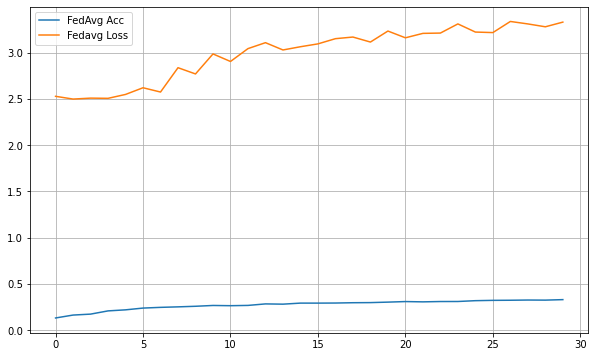

In [11]:
num = 3
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

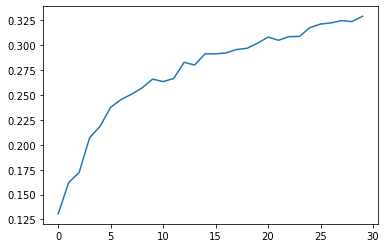

In [12]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [13]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.1305955556531747, 0.16204777757326763, 0.17231444443265598, 0.2071833332379659, 0.21853888846105998, 0.23765333361095853, 0.24536999960740405, 0.25081111143032714, 0.25712666710217796, 0.2658999996052848, 0.26340444452232786, 0.2664666641089652, 0.28276111053095926, 0.28002333260244794, 0.2913233329852422, 0.29124000039365555, 0.2921955567267206, 0.2955644437008434, 0.29683889001607894, 0.302007776664363, 0.3080766666266654, 0.3049199998378754, 0.30848888787958356, 0.3088611091176669, 0.31767444411913554, 0.3211722231573529, 0.32232555399338403, 0.324616666800446, 0.32362444351116815, 0.32899555646710926] 

[2.52791944609748, 2.498239943716261, 2.508361170026991, 2.5061402373843724, 2.548287041982015, 2.620612144470215, 2.57424780925115, 2.8374252160390214, 2.7698867903815376, 2.9864983134799536, 2.9047971063190037, 3.043974004851447, 3.1081619448131987, 3.029286739561293, 3.0641949680116447, 3.095196731885274, 3.151375314924452, 3.1689824554655286, 3.1148972617255315, 3.23388832410